**Context**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for th.
weking was canceled or not. content


**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.



**Data Dictionary**:

- **Booking_ID**: The unique identifier of each booking.
- **no_of_adults**: Number of adults.
- **no_of_children**: Number of children.
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- **no_of_week_nights**: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- **type_of_meal_plan**: Type of meal plan booked by the customer:
  - Not Selected: No meal plan selected.
  - Meal Plan 1: Breakfast.
  - Meal Plan 2: Half board (breakfast and one other meal).
  - Meal Plan 3: Full board (breakfast, lunch, and dinner).
- **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1 - Yes).
- **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group.
- **lead_time**: Number of days between the date of booking and the arrival date.
- **arrival_year**: Year of arrival date.
- **arrival_month**: Month of arrival date.
- **arrival_date**: Date of the month.
- **market_segment_type**: Market segment designation.
- **repeated_guest**: Is the customer a repeated guest? (0 - No, 1 - Yes).
- **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking.
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking.
- **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic (in euros).
- **no_of_special_requests**: Total number of special requests made by the customer (e.g., high floor, view from the room, etc.).
- **booking_status**: Flag indicating if the booking was canceled or not.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

#To build model for prediction
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For different metric scores
from sklearn.metrics import (f1_score,recall_score,precision_score,accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,make_scorer,confusion_matrix)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Python/Project-4-Machine-Learning-1/INNHotelsGroup.csv'

# Load the file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


Mounted at /content/drive


Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.shape

(36275, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [ ]:
data.describe(include='object').T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

In [ ]:
num_cols = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in data.columns if data[col].dtype in ['object', 'category']]
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [ ]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [ ]:
for feature in data.columns:
    print(data[feature].value_counts(2)*100)

Booking_ID
INN00001    0.002757
INN24187    0.002757
INN24181    0.002757
INN24182    0.002757
INN24183    0.002757
              ...   
INN12086    0.002757
INN12085    0.002757
INN12084    0.002757
INN12083    0.002757
INN36275    0.002757
Name: proportion, Length: 36275, dtype: float64
no_of_adults
2    71.972433
1    21.212957
3     6.387319
0     0.383184
4     0.044108
Name: proportion, dtype: float64
no_of_children
0     92.562371
1      4.460372
2      2.916609
3      0.052378
9      0.005513
10     0.002757
Name: proportion, dtype: float64
no_of_weekend_nights
0    46.511371
1    27.553411
2    25.006203
3     0.421778
4     0.355617
5     0.093728
6     0.055134
7     0.002757
Name: proportion, dtype: float64
no_of_week_nights
2     31.547898
1     26.155755
3     21.609924
4      8.242591
0      6.580289
5      4.449345
6      0.521020
7      0.311509
10     0.170917
8      0.170917
9      0.093728
11     0.046864
15     0.027567
12     0.024810
14     0.019297
13     0.0137

# 2 **Exploratory Data Analysis**

## 2.1 **Univariate Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="yellow", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 7, 17))
    else:
        plt.figure(figsize=(n + 7, 17))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


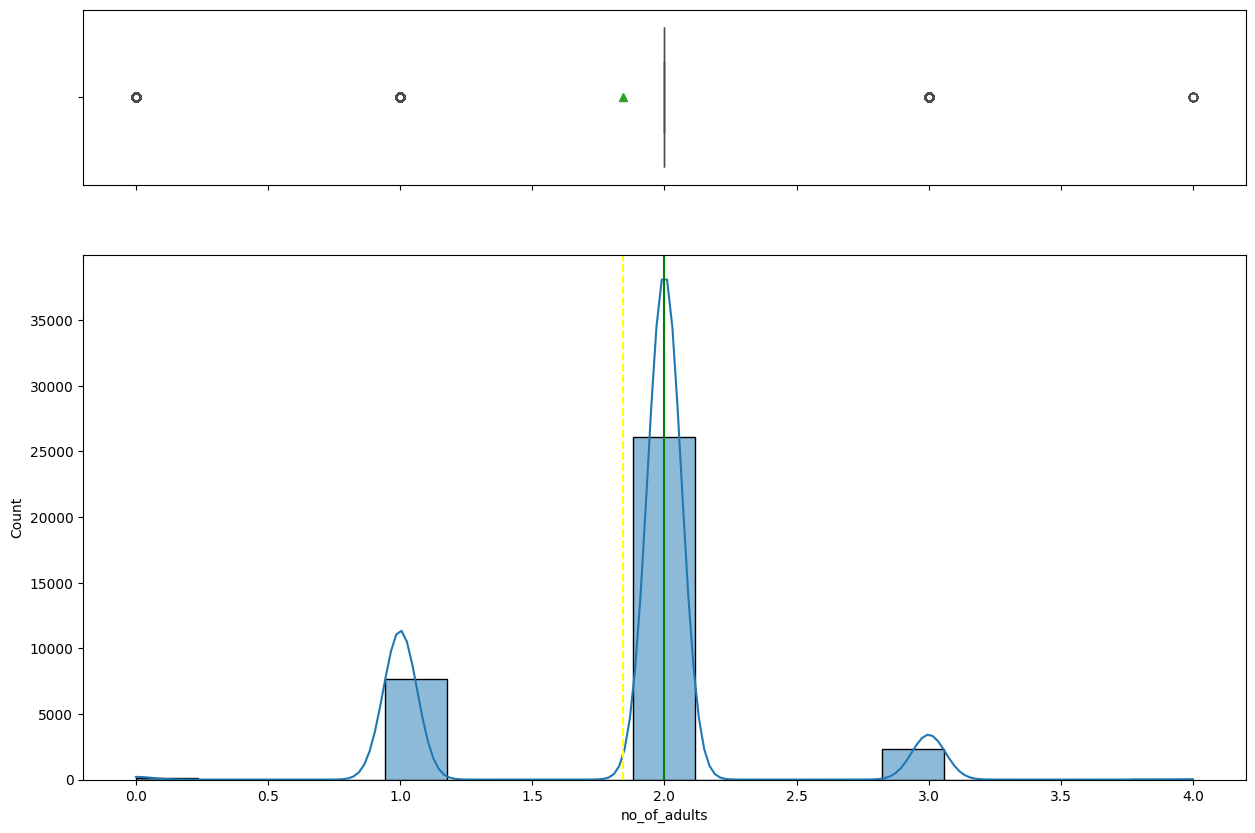

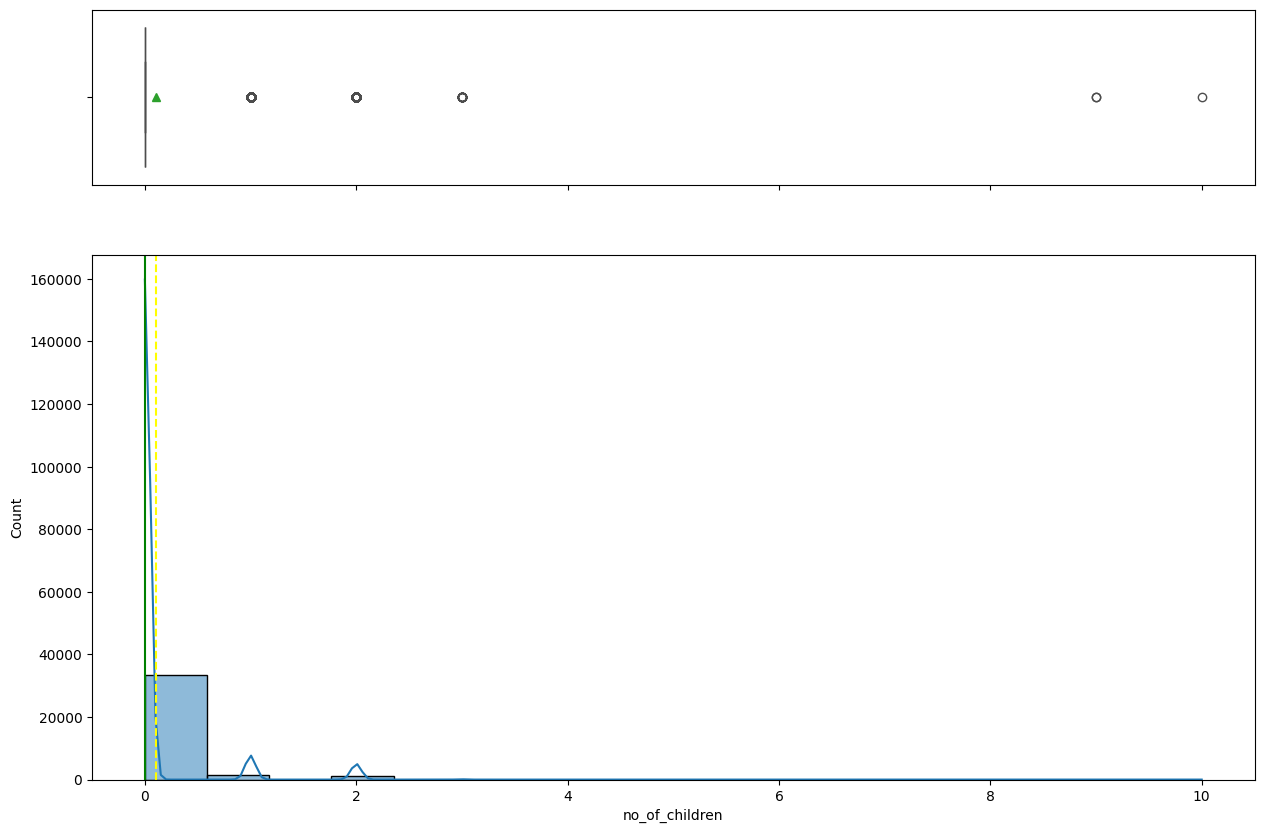

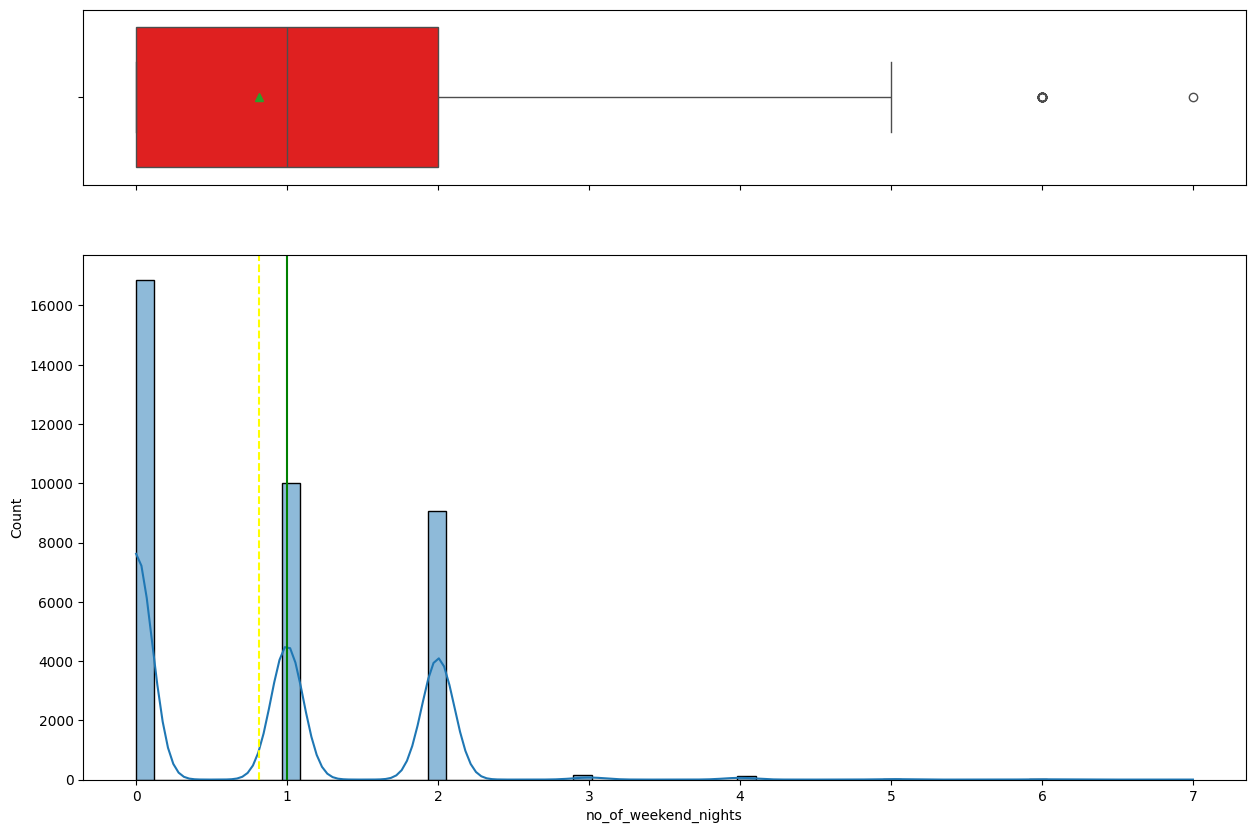

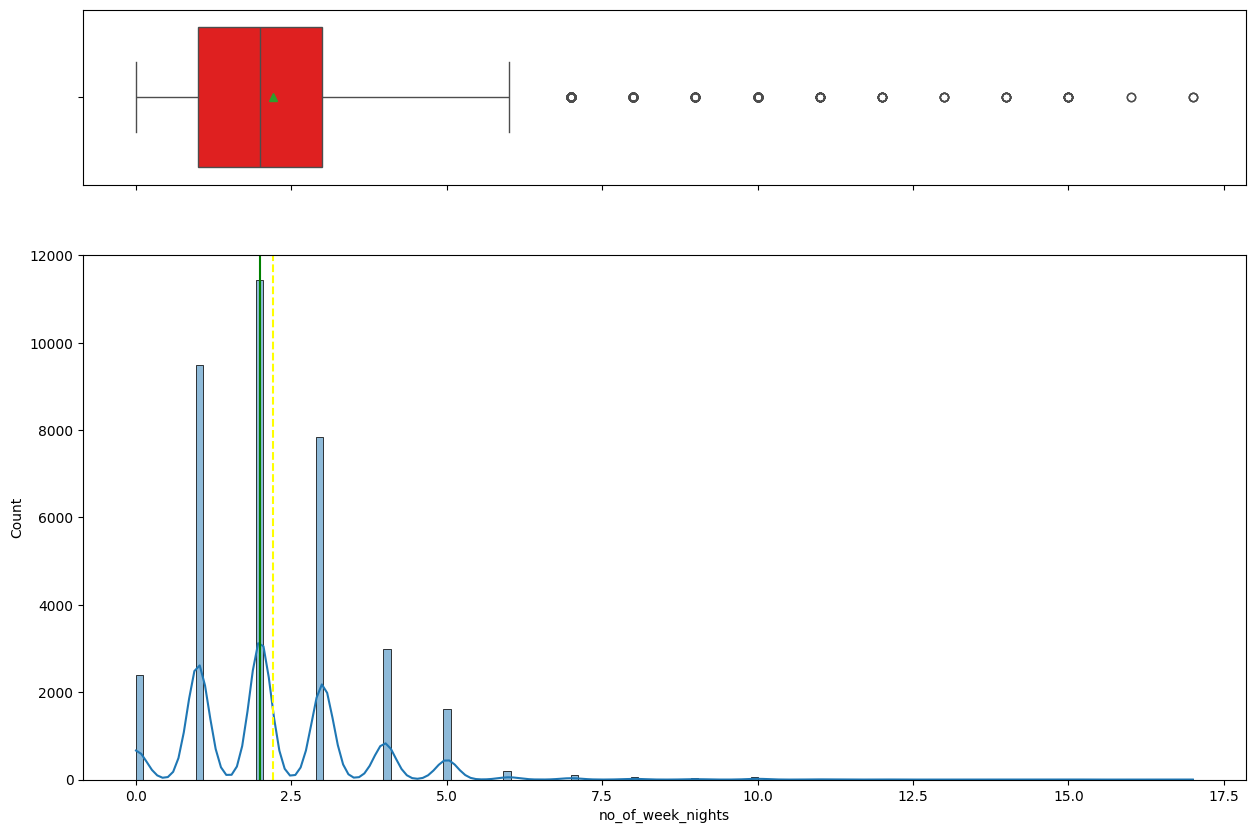

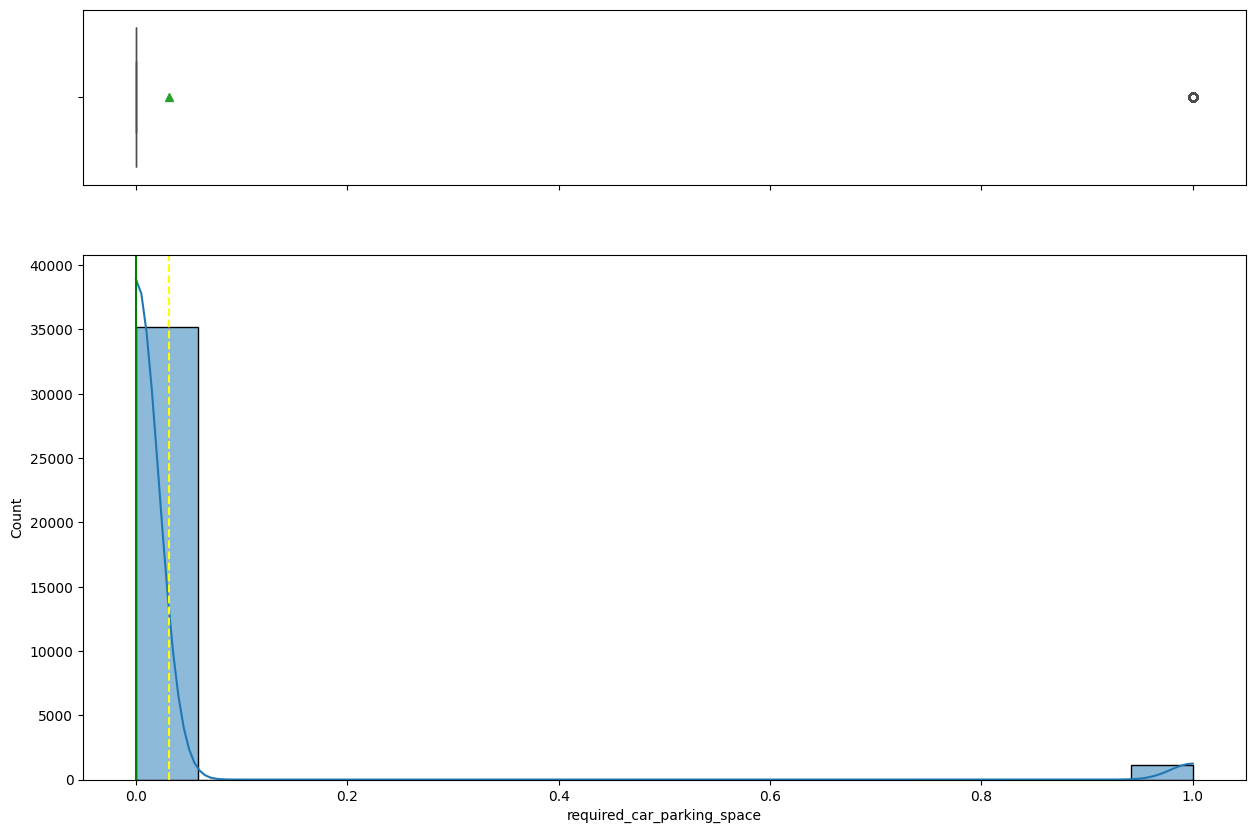

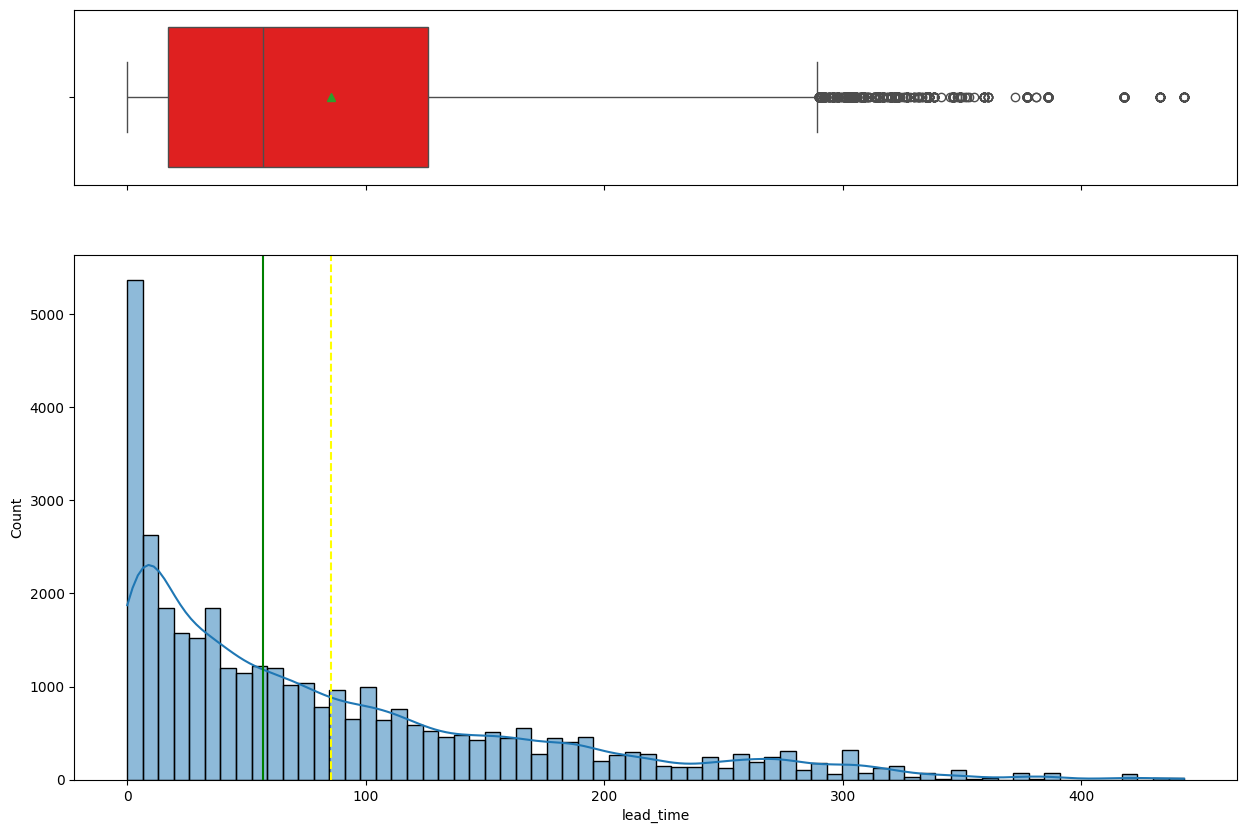

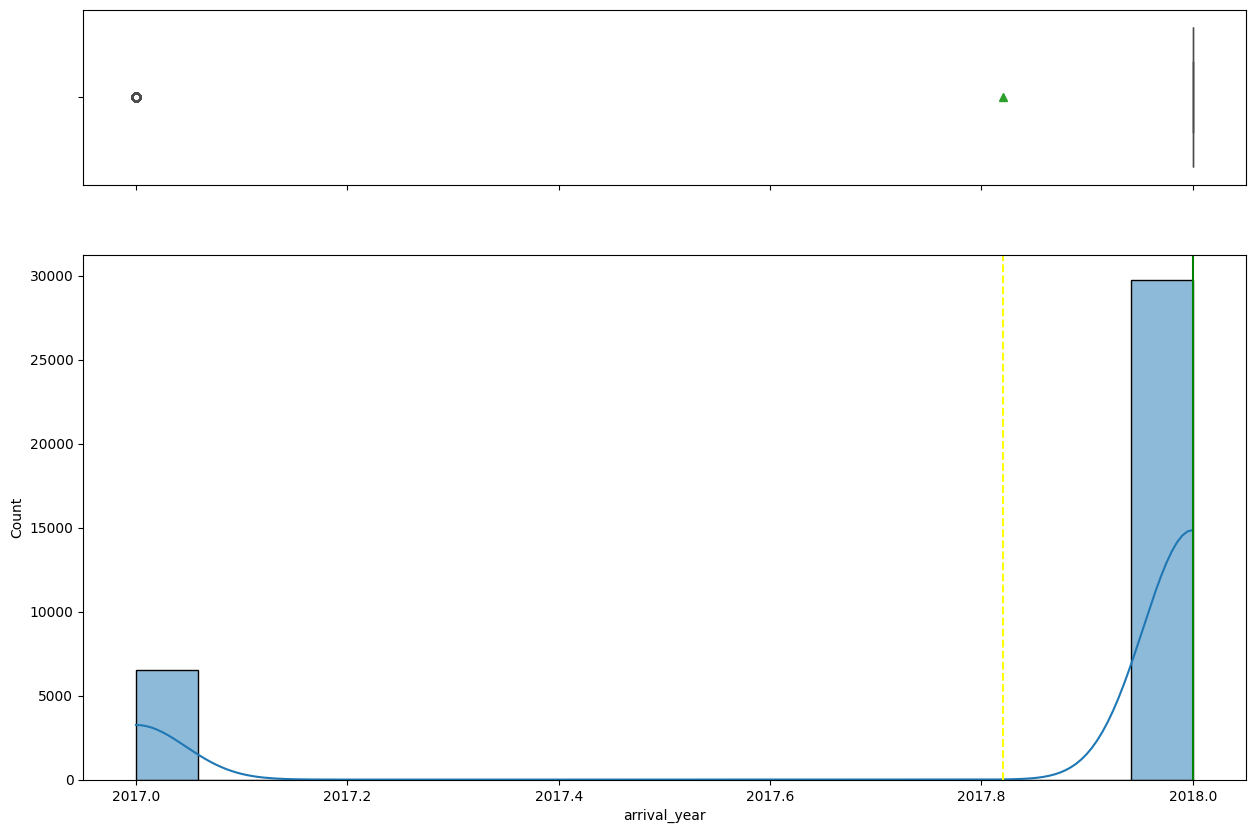

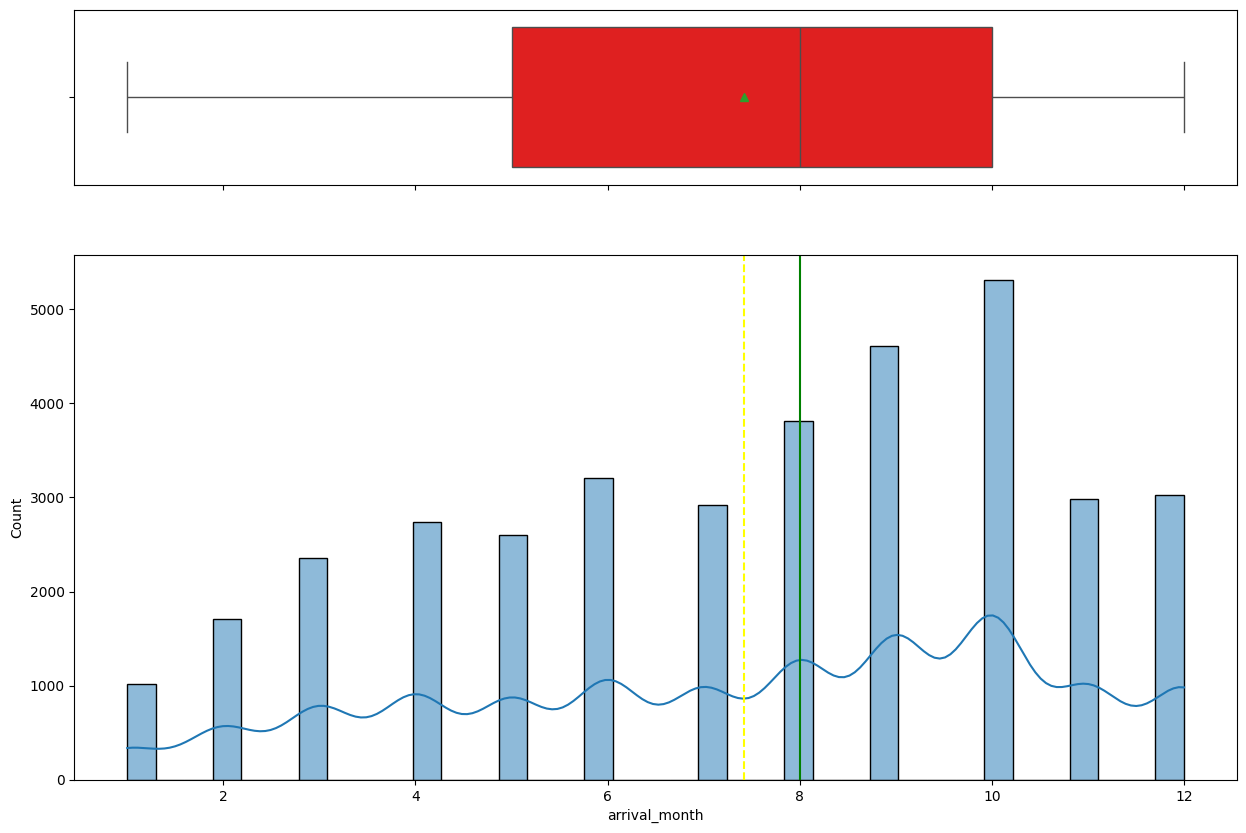

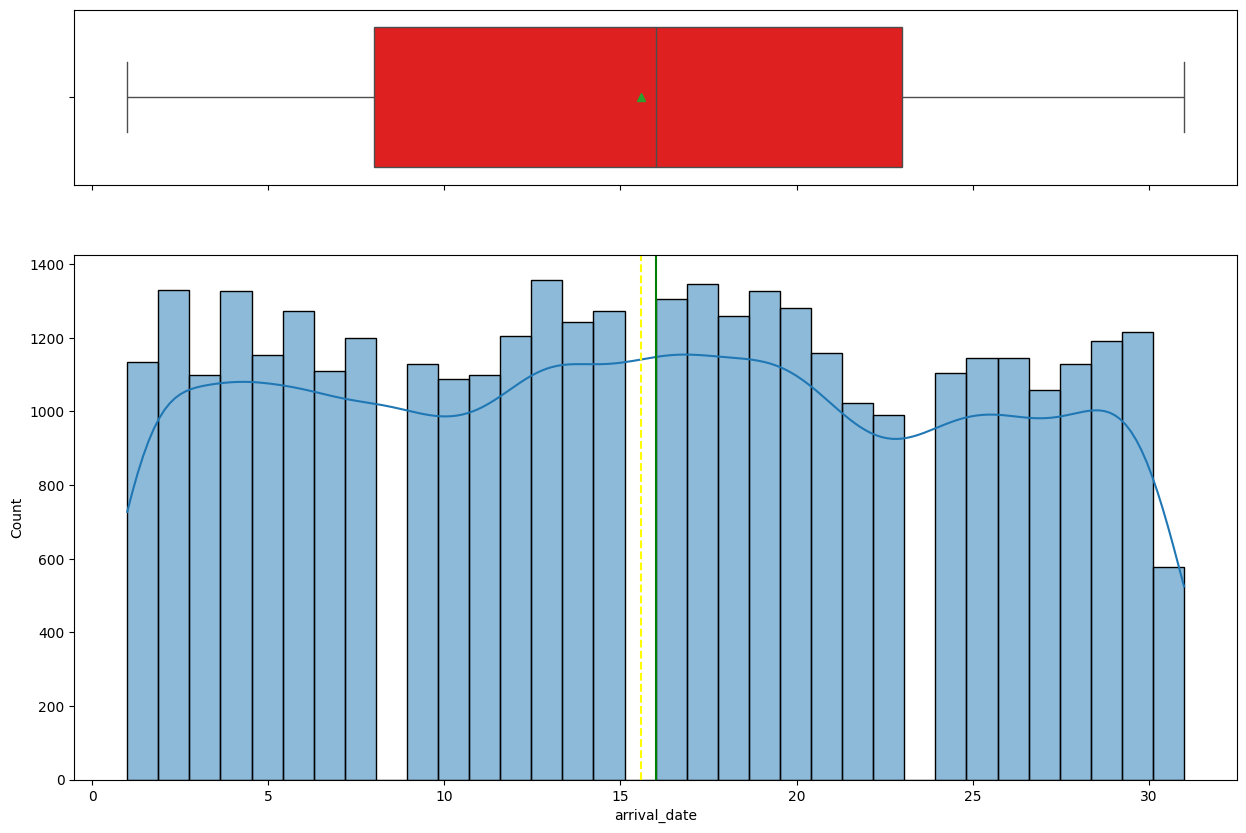

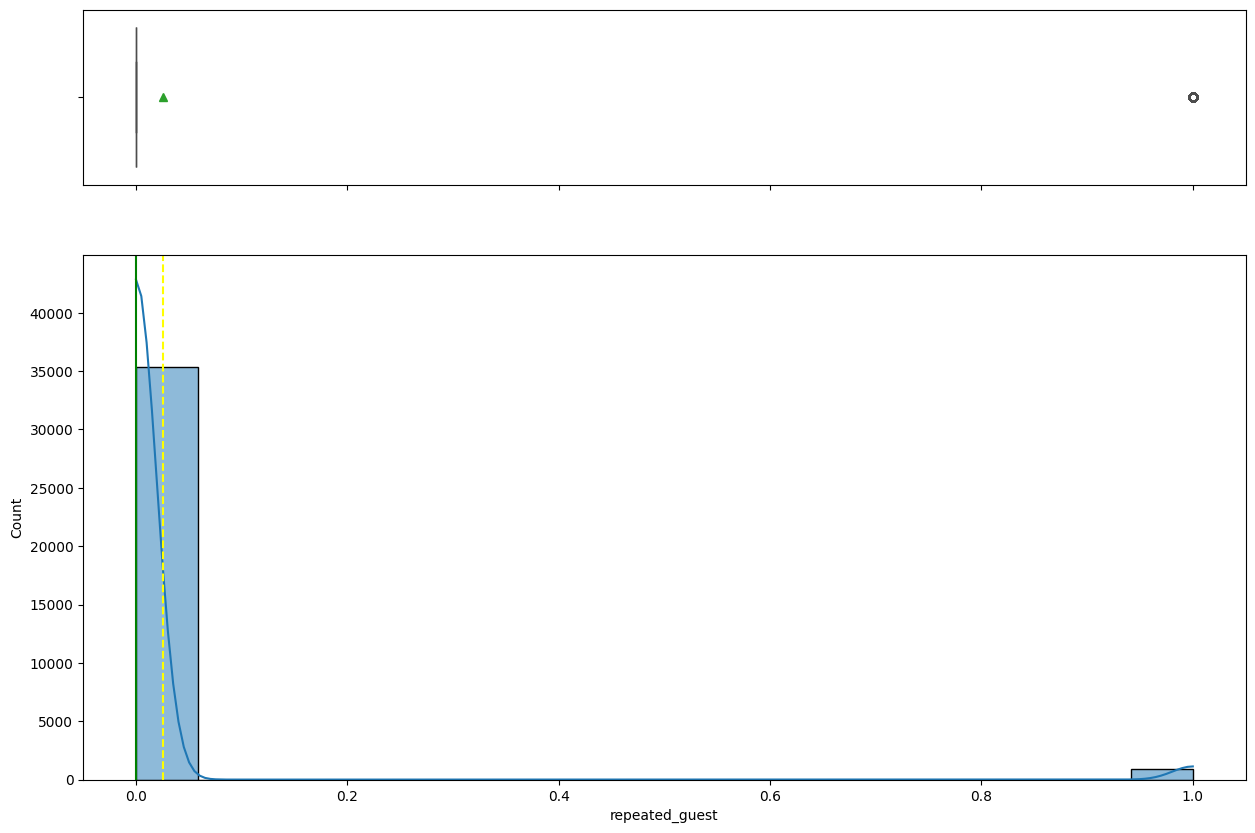

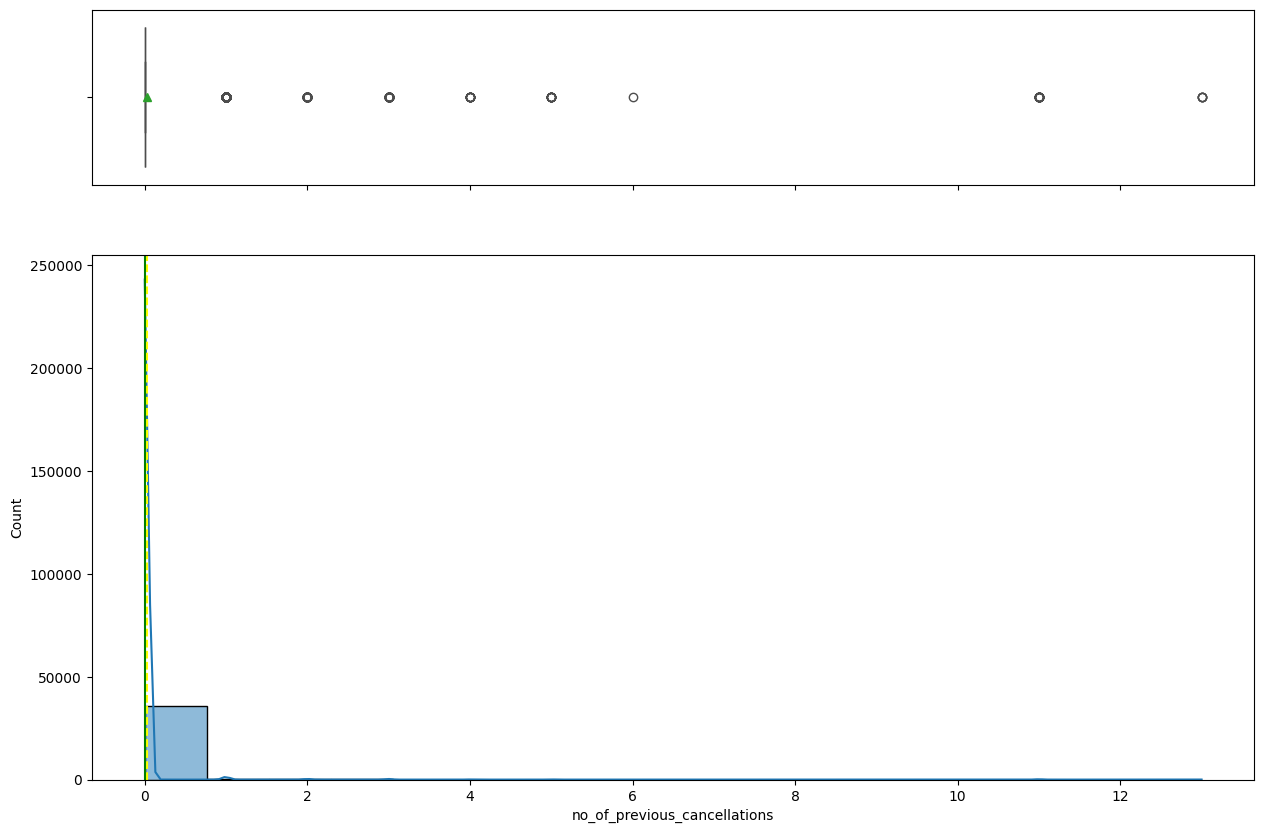

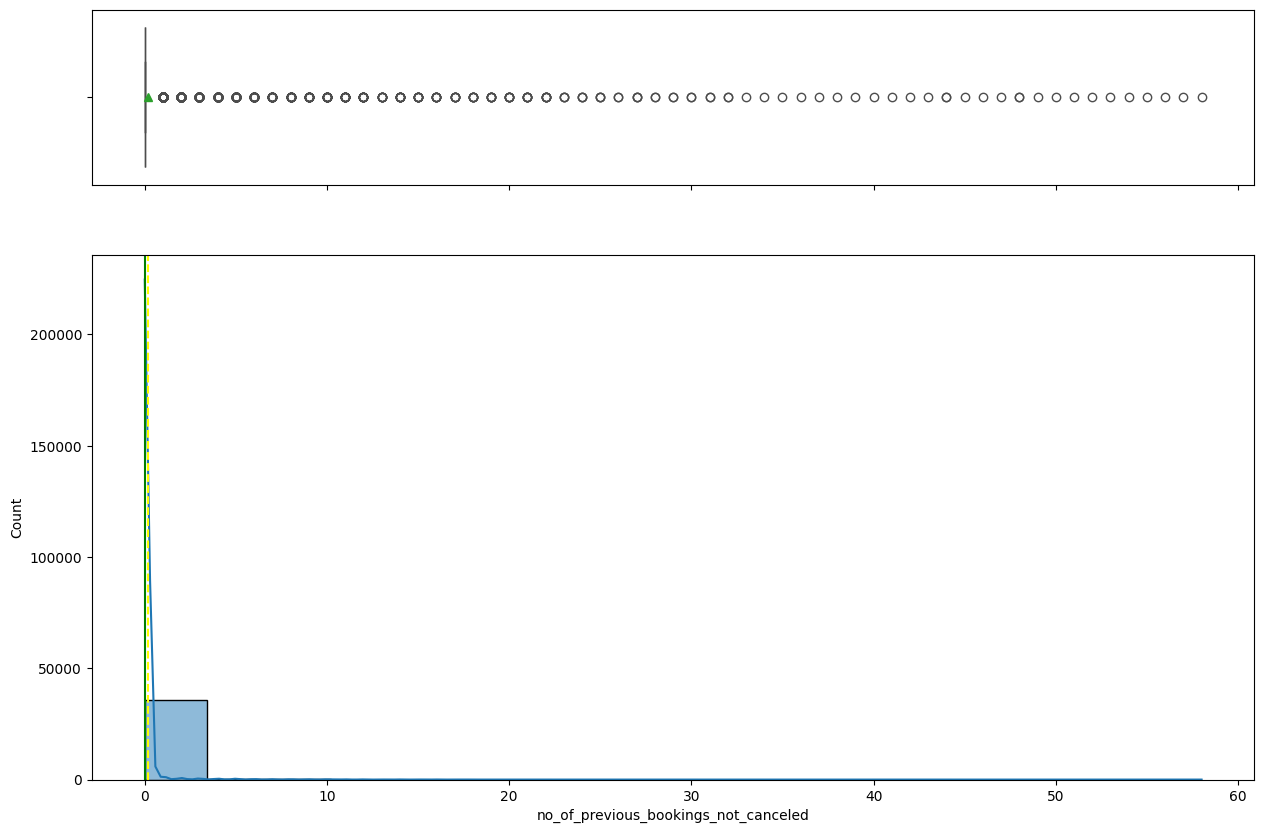

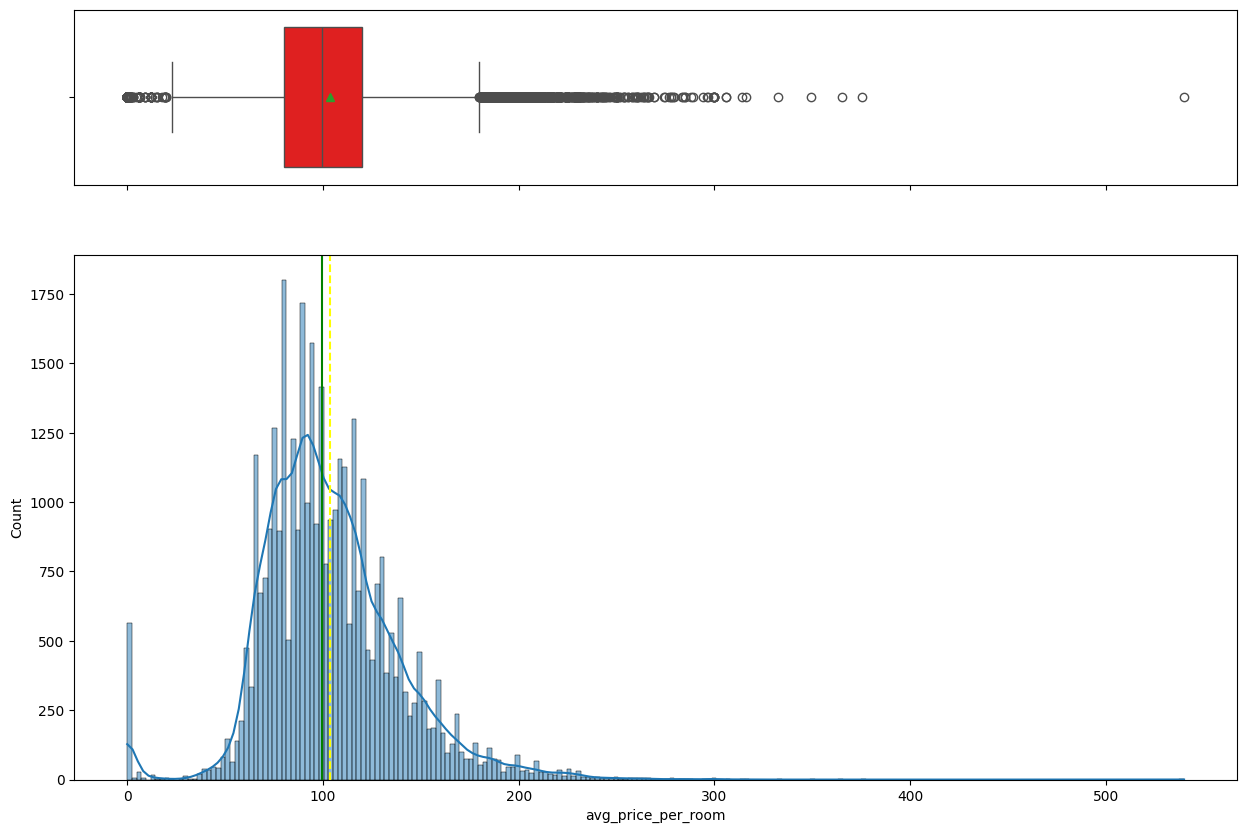

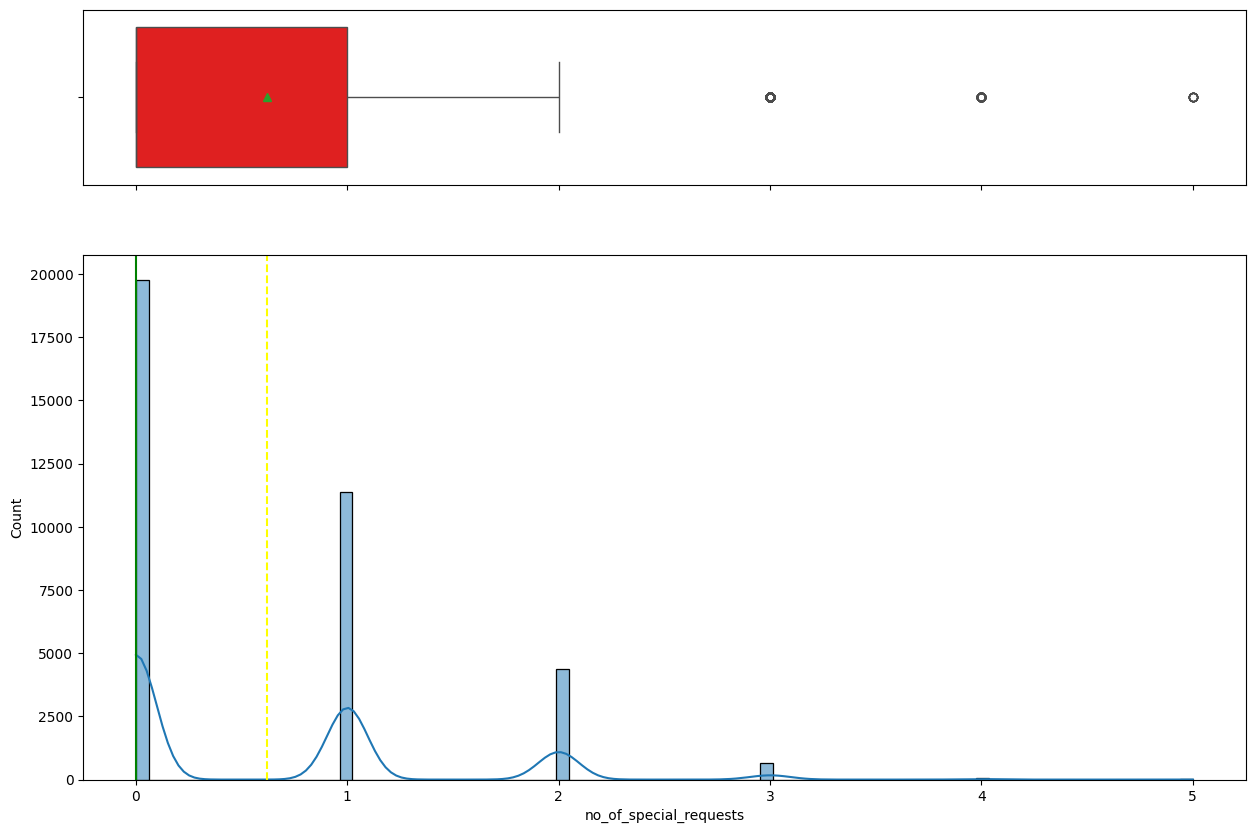

In [ ]:
for col in num_cols:
    histogram_boxplot(data, col, kde=True)  # Pass column data and column name
    plt.savefig(f'/content/drive/My Drive/Python/Project-4-Machine-Learning-1/1{col}.jpg')          # Use f-string for dynamic filename


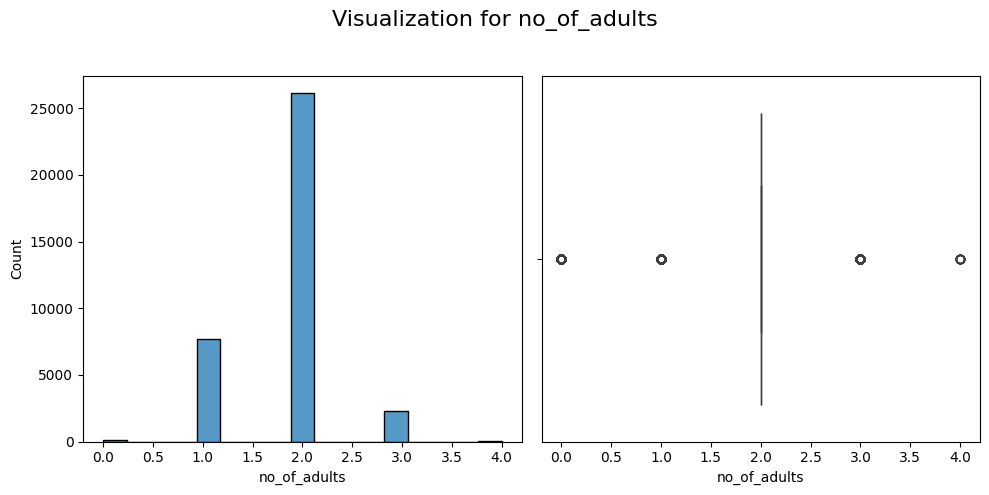

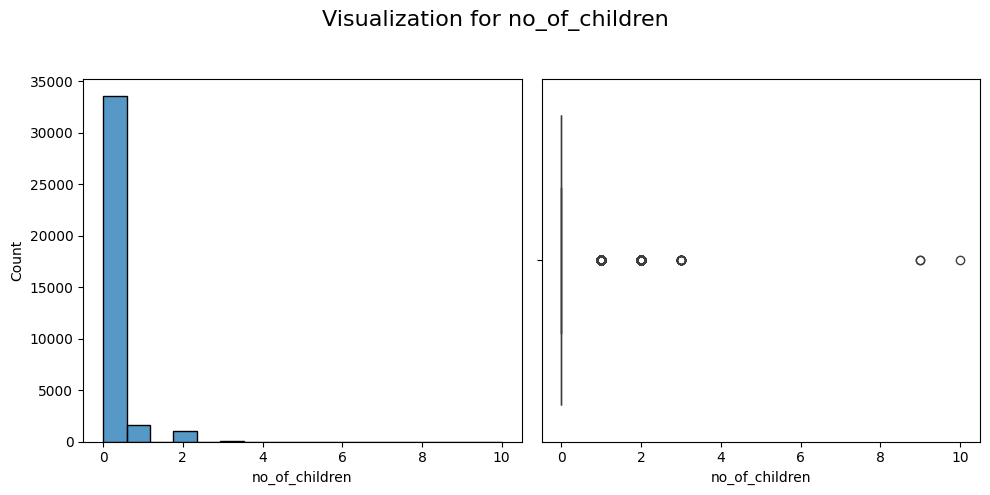

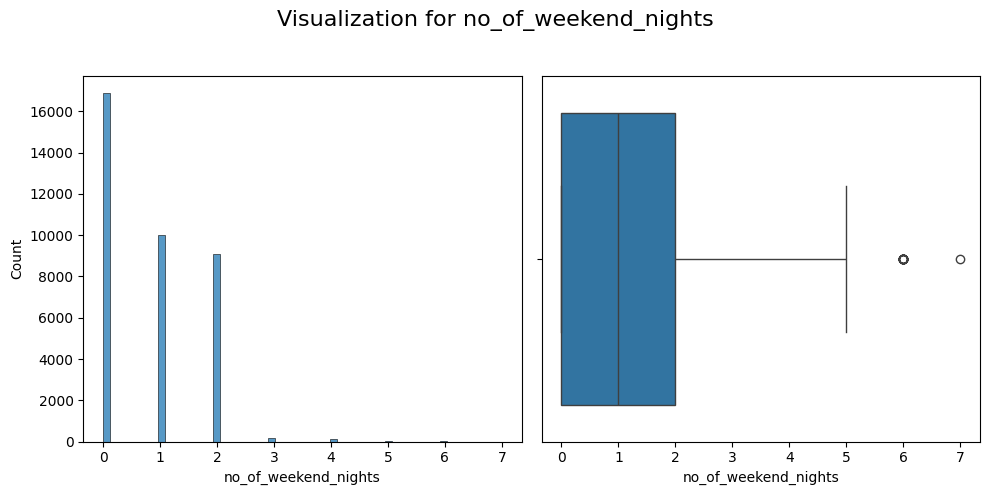

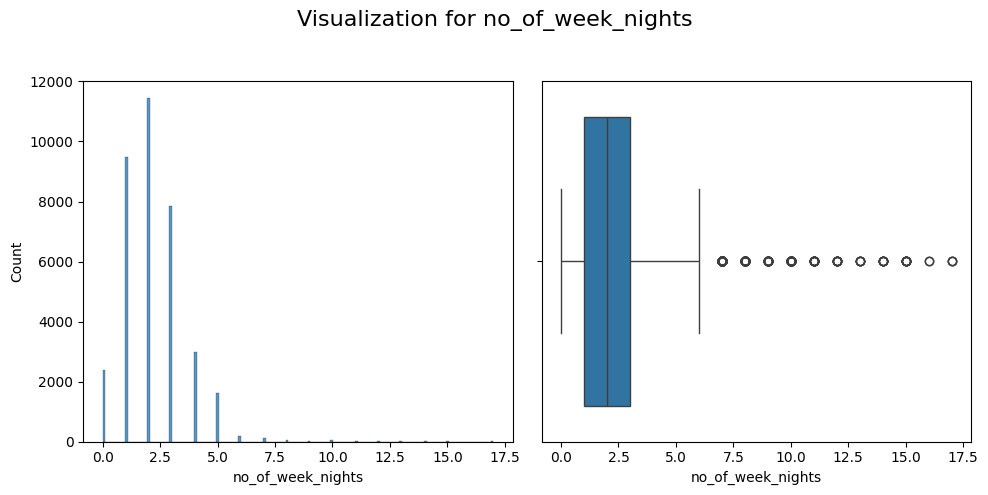

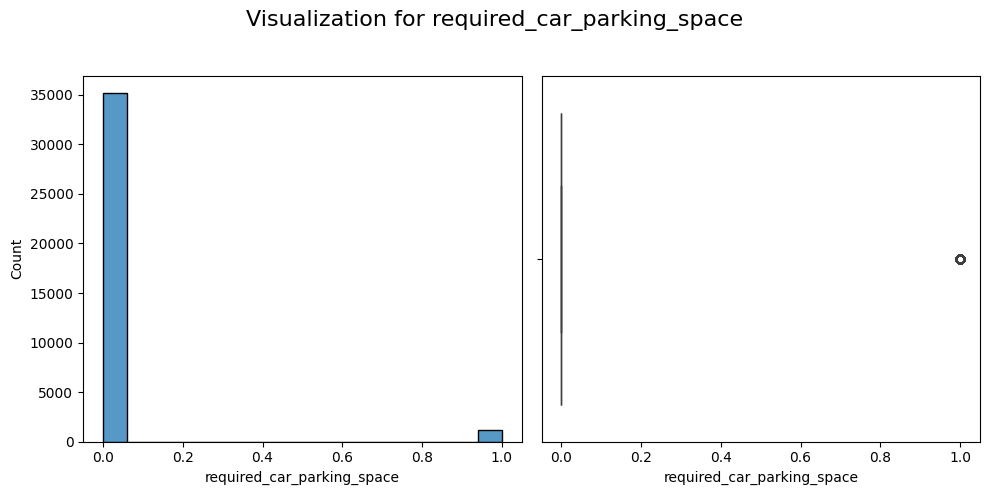

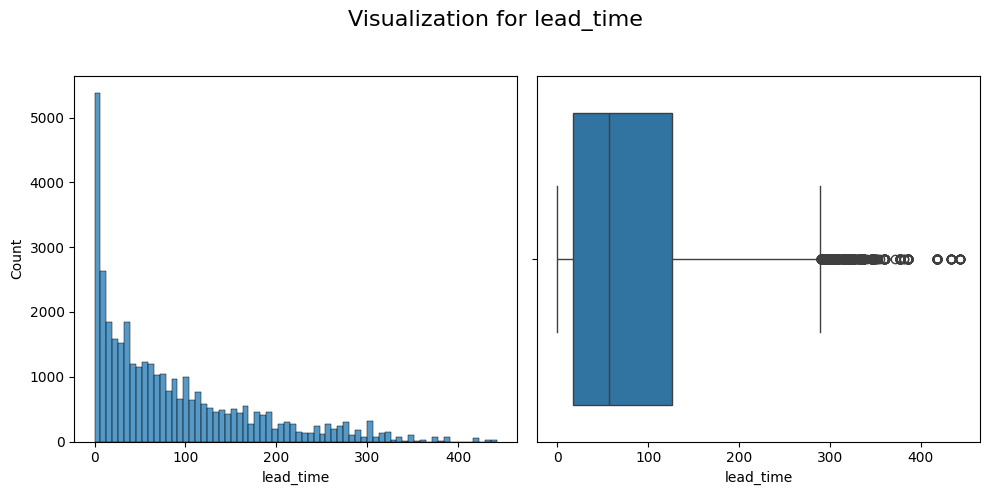

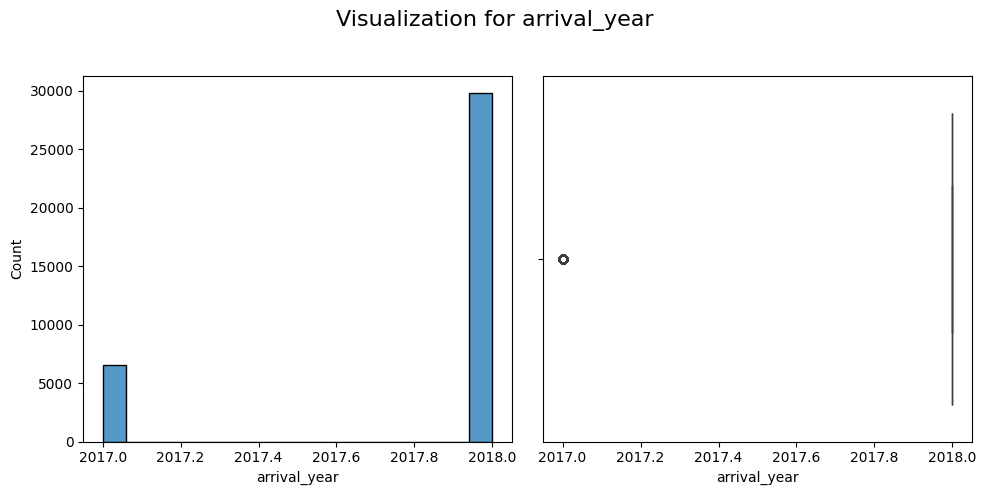

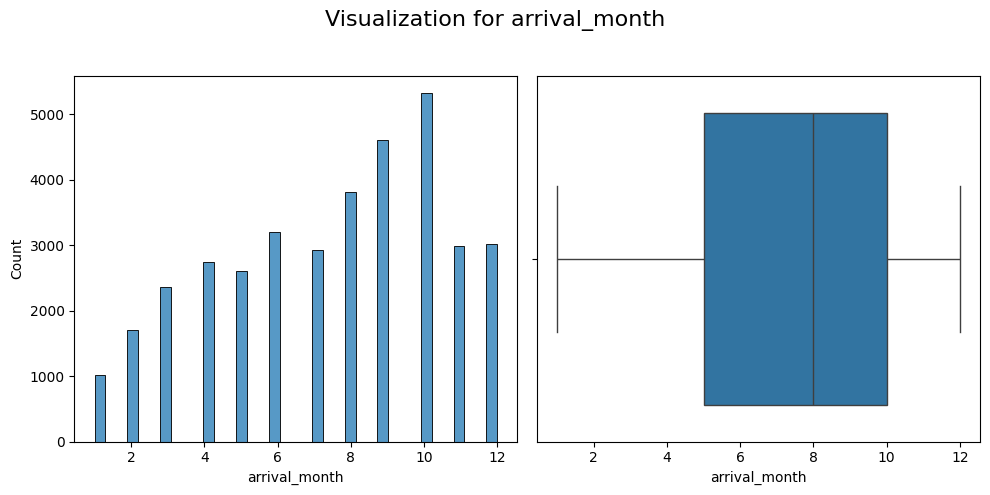

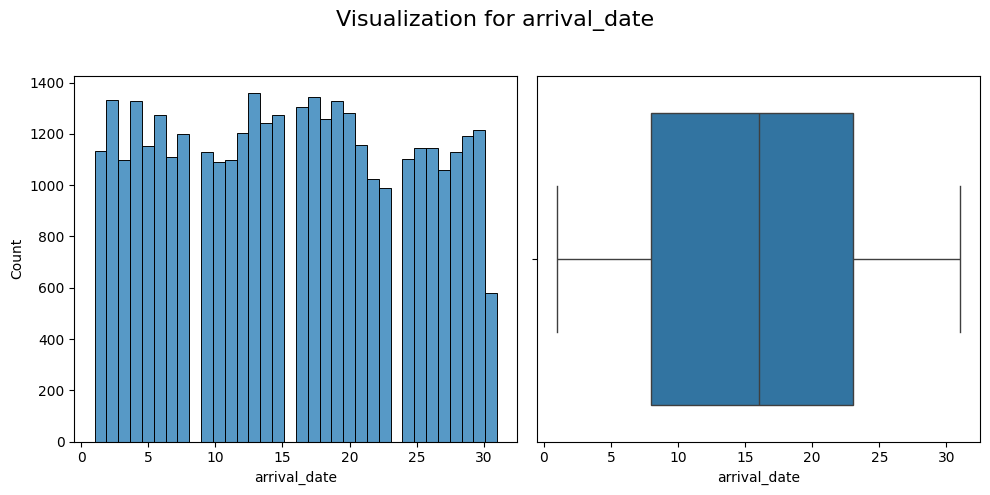

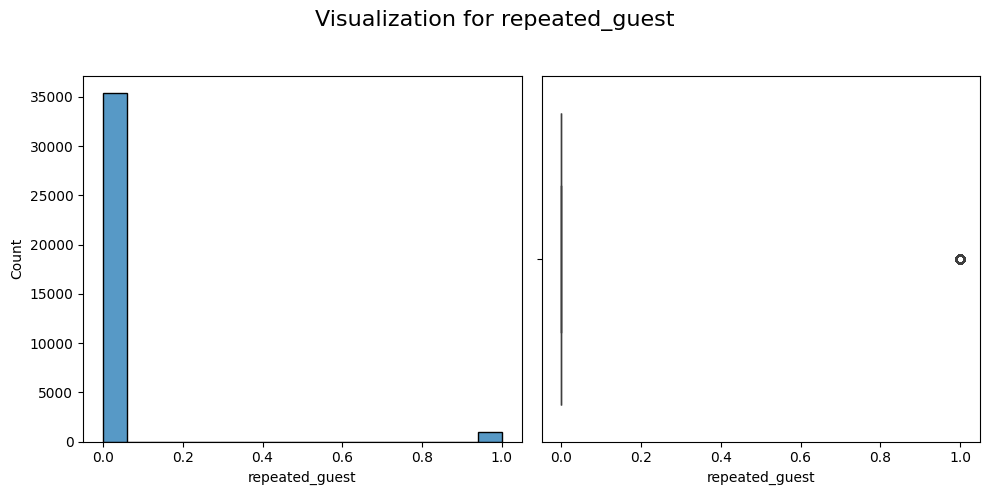

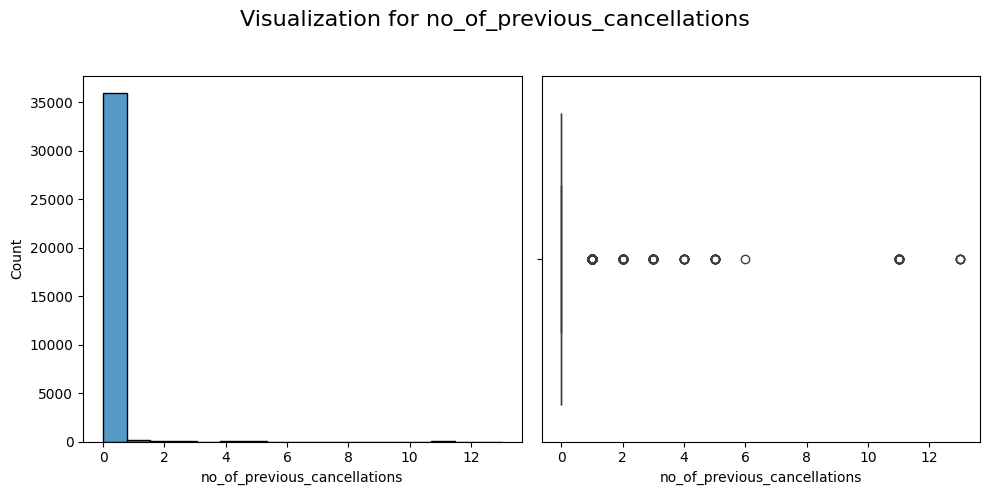

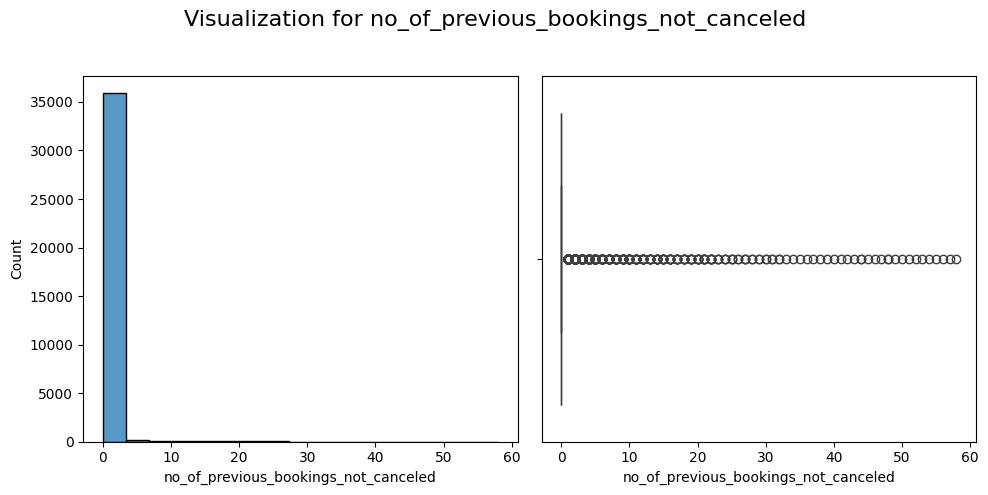

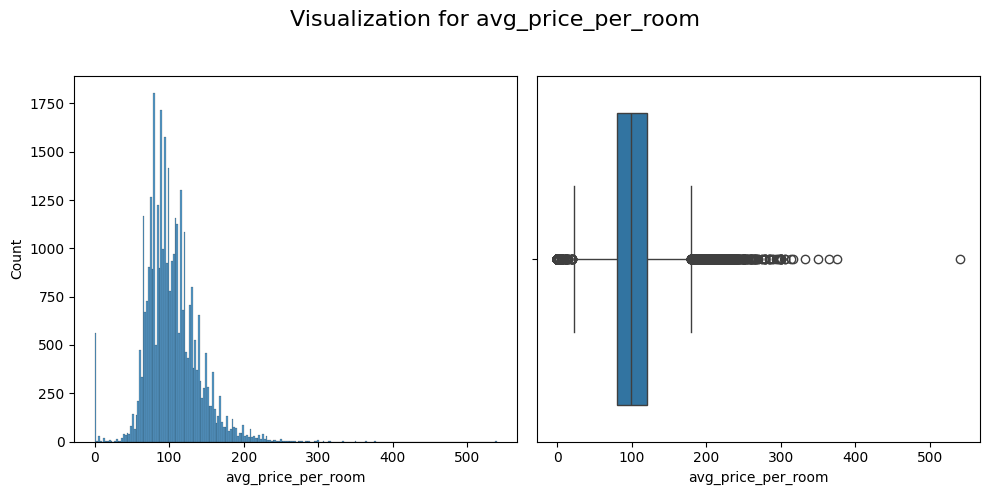

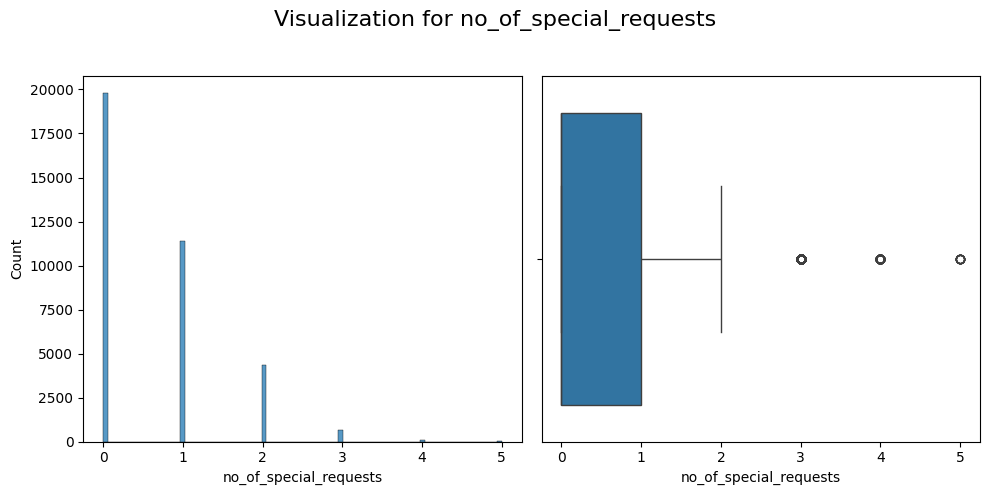

In [ ]:
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Visualization for {col}", fontsize=16)  # Add a super title
    sns.histplot(data, x=col, ax=ax[0])
    sns.boxplot(data, x=col, ax=ax[1])
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the title

    plt.savefig(f'/content/drive/My Drive/Python/Project-4-Machine-Learning-1/2{col}.jpg')

ValueError: Image size of 393700x1700 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7adfb535e4d0> (for post_execute):


ValueError: Image size of 393700x1700 pixels is too large. It must be less than 2^16 in each direction.

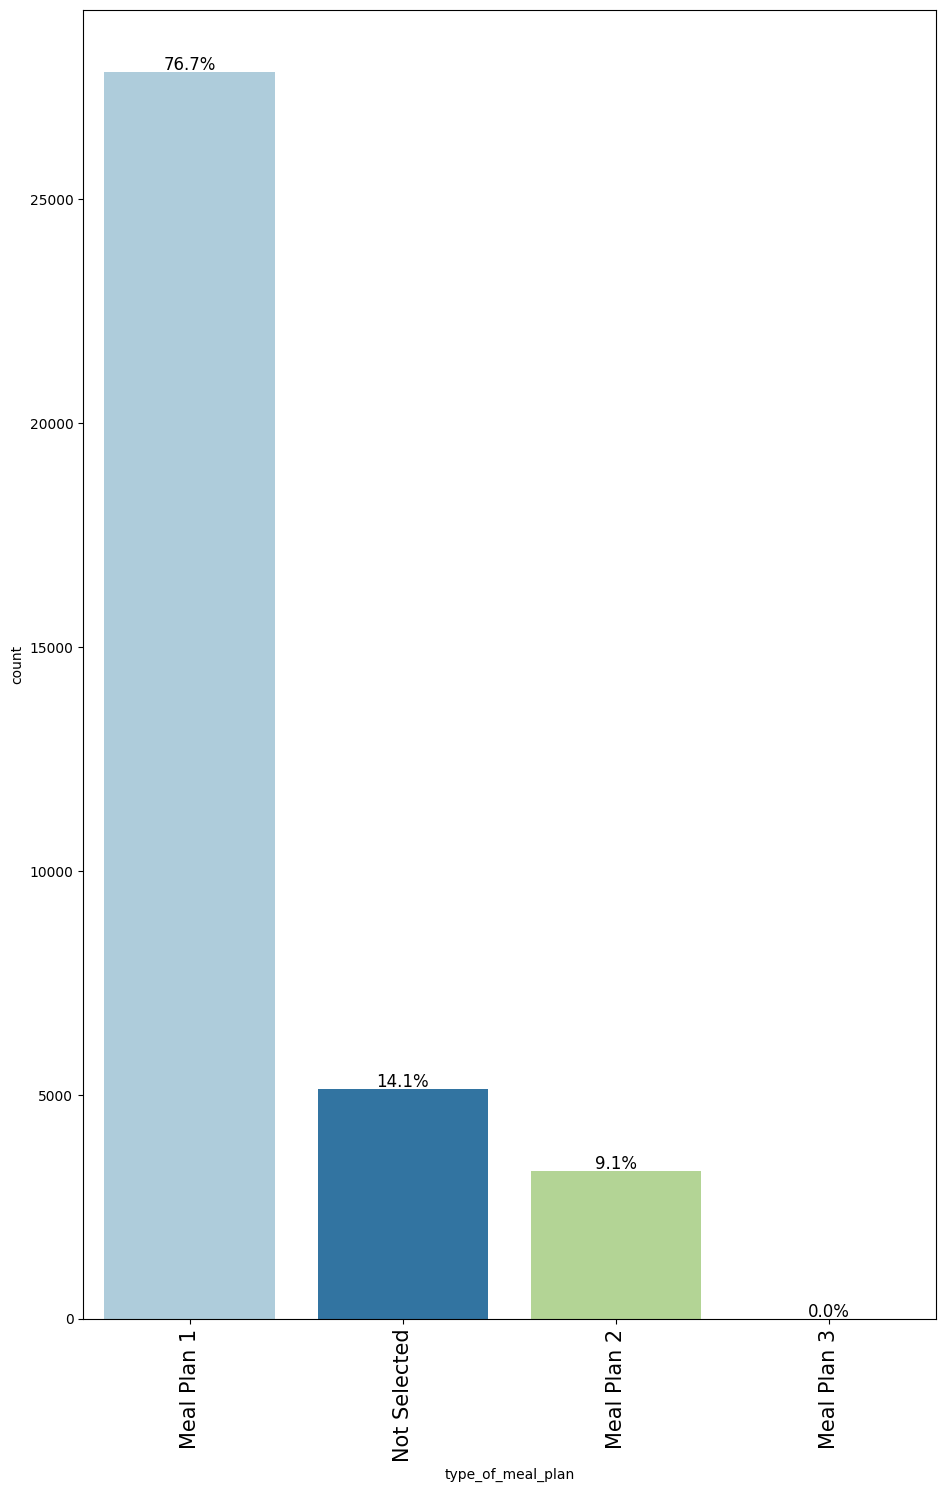

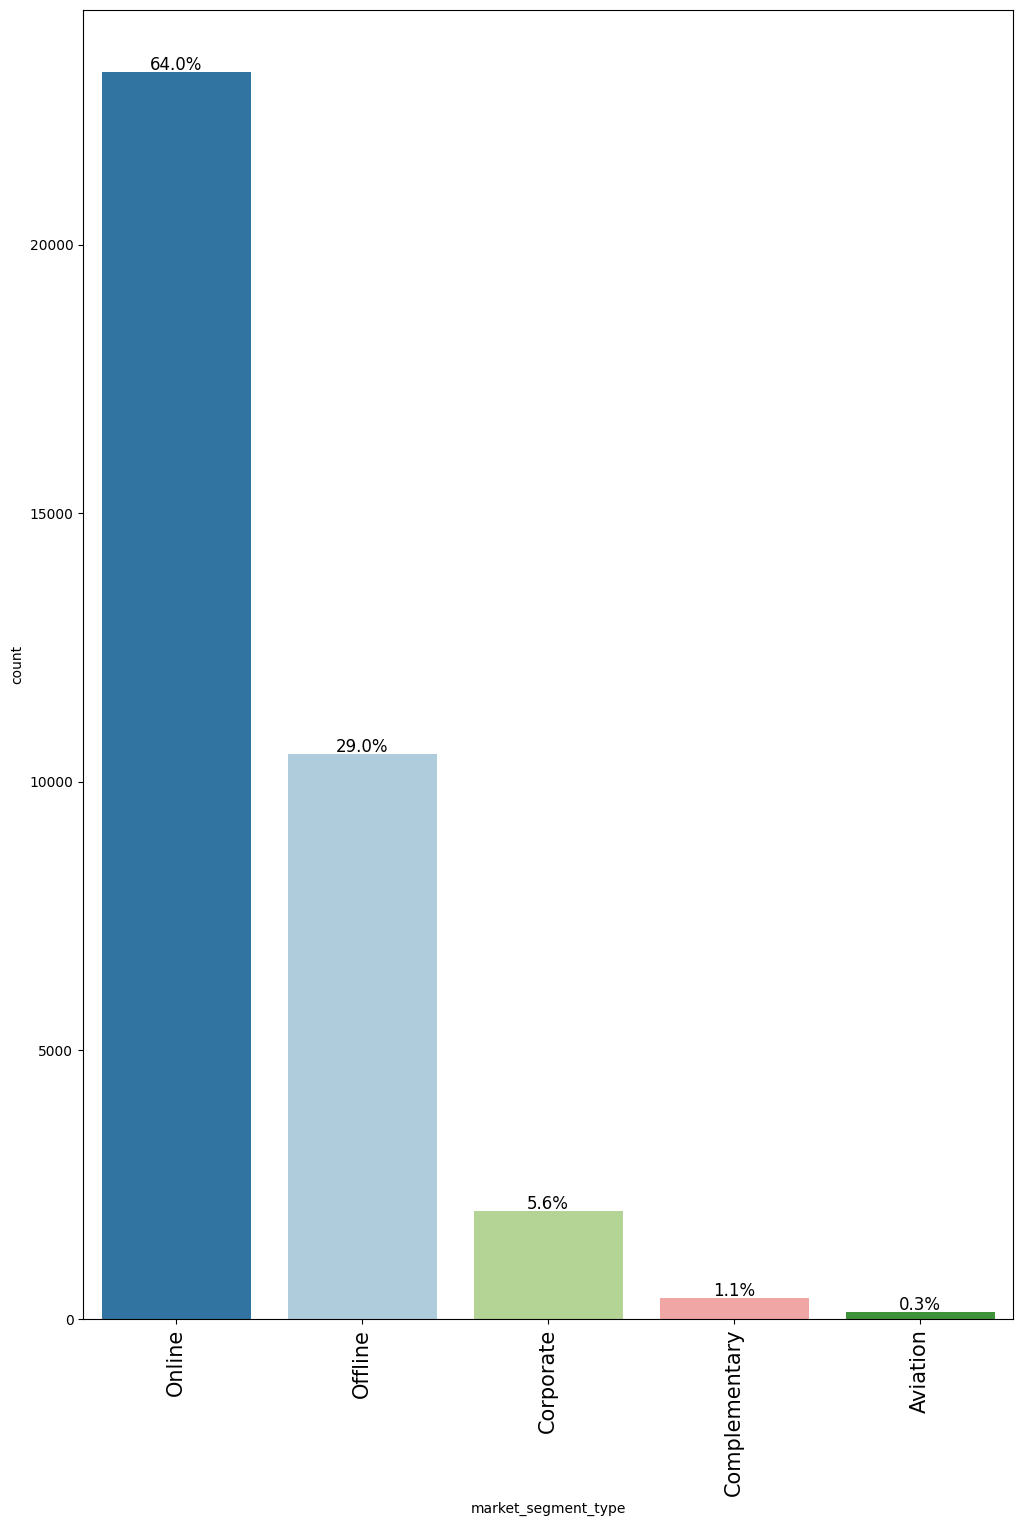

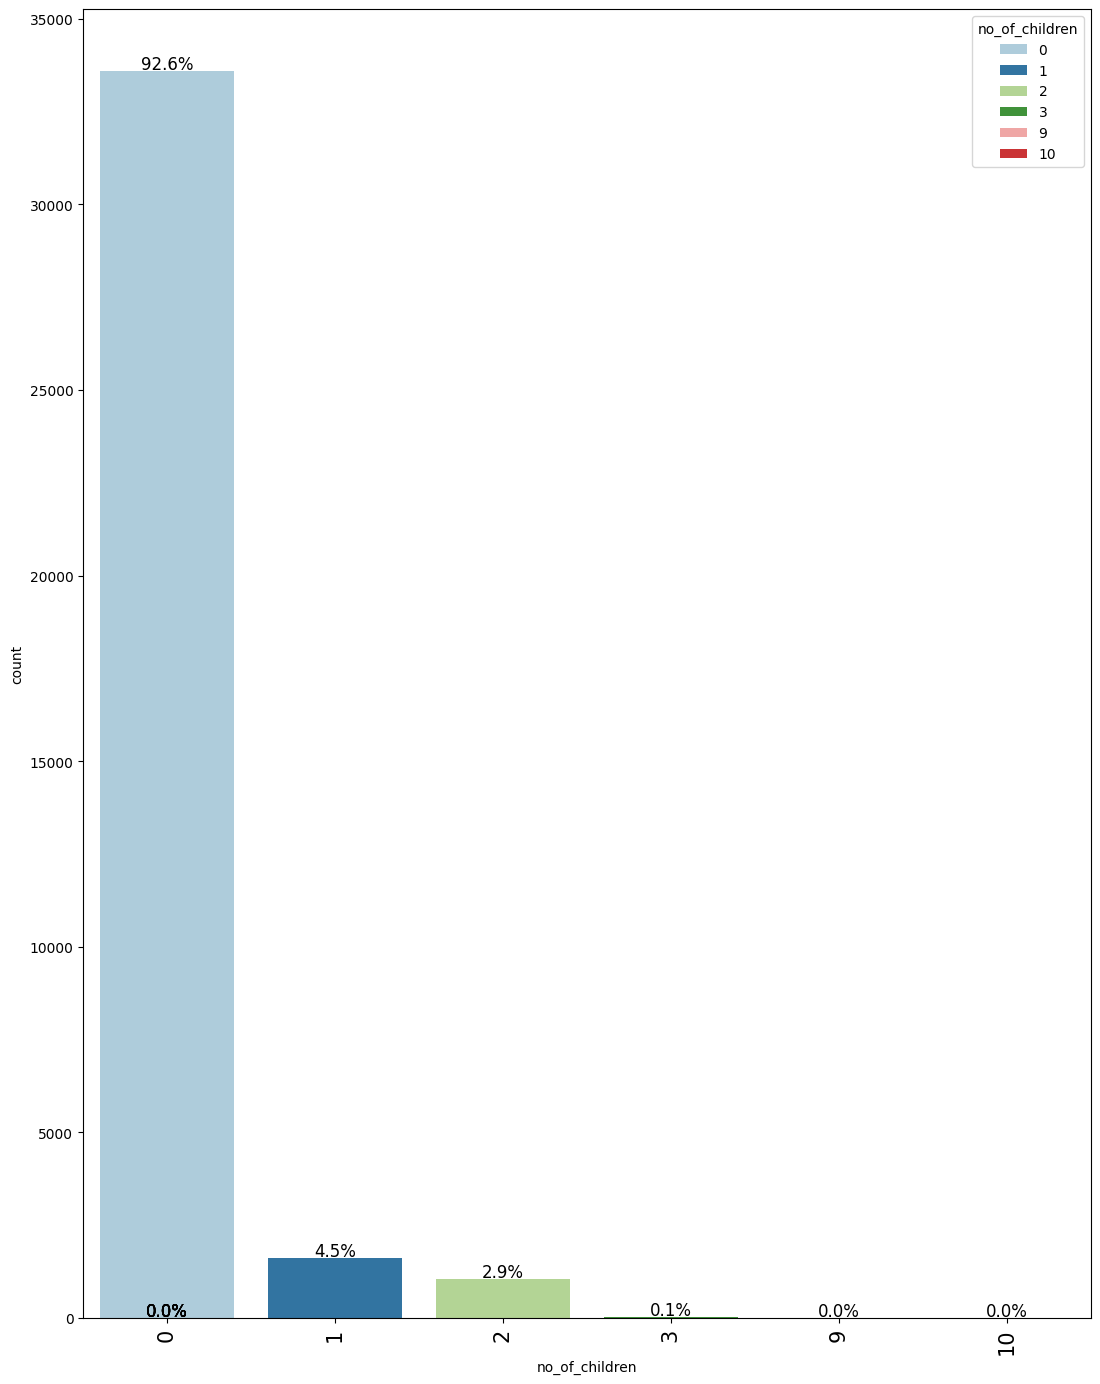

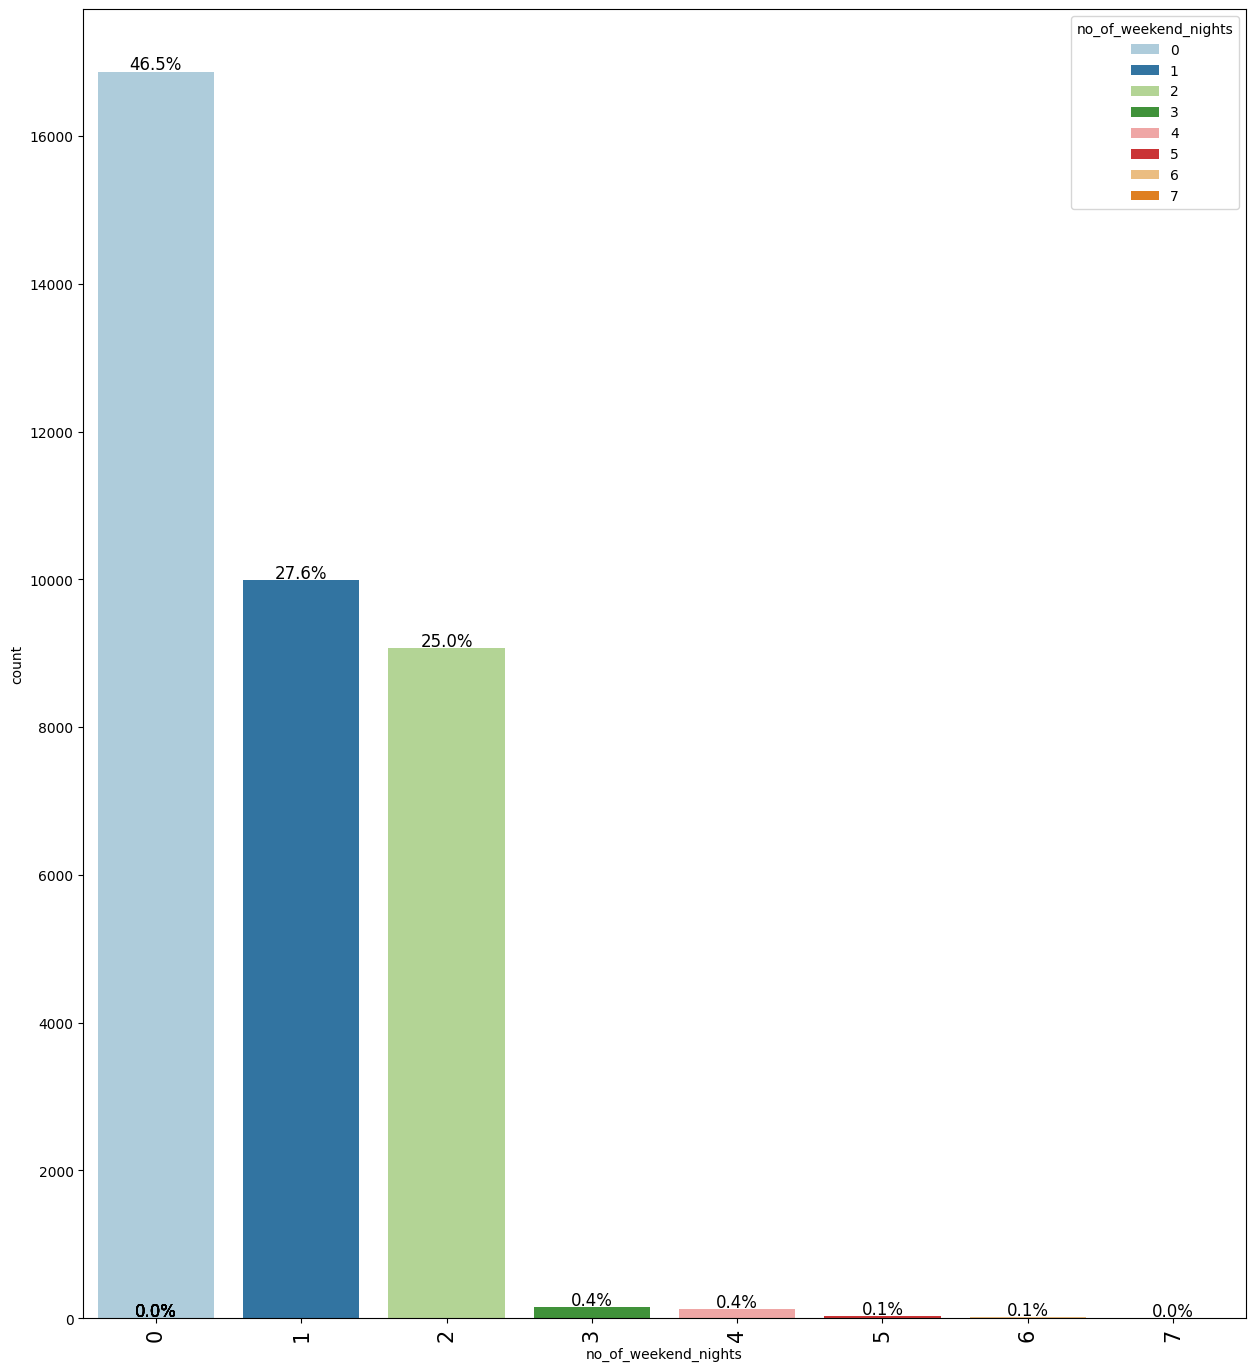

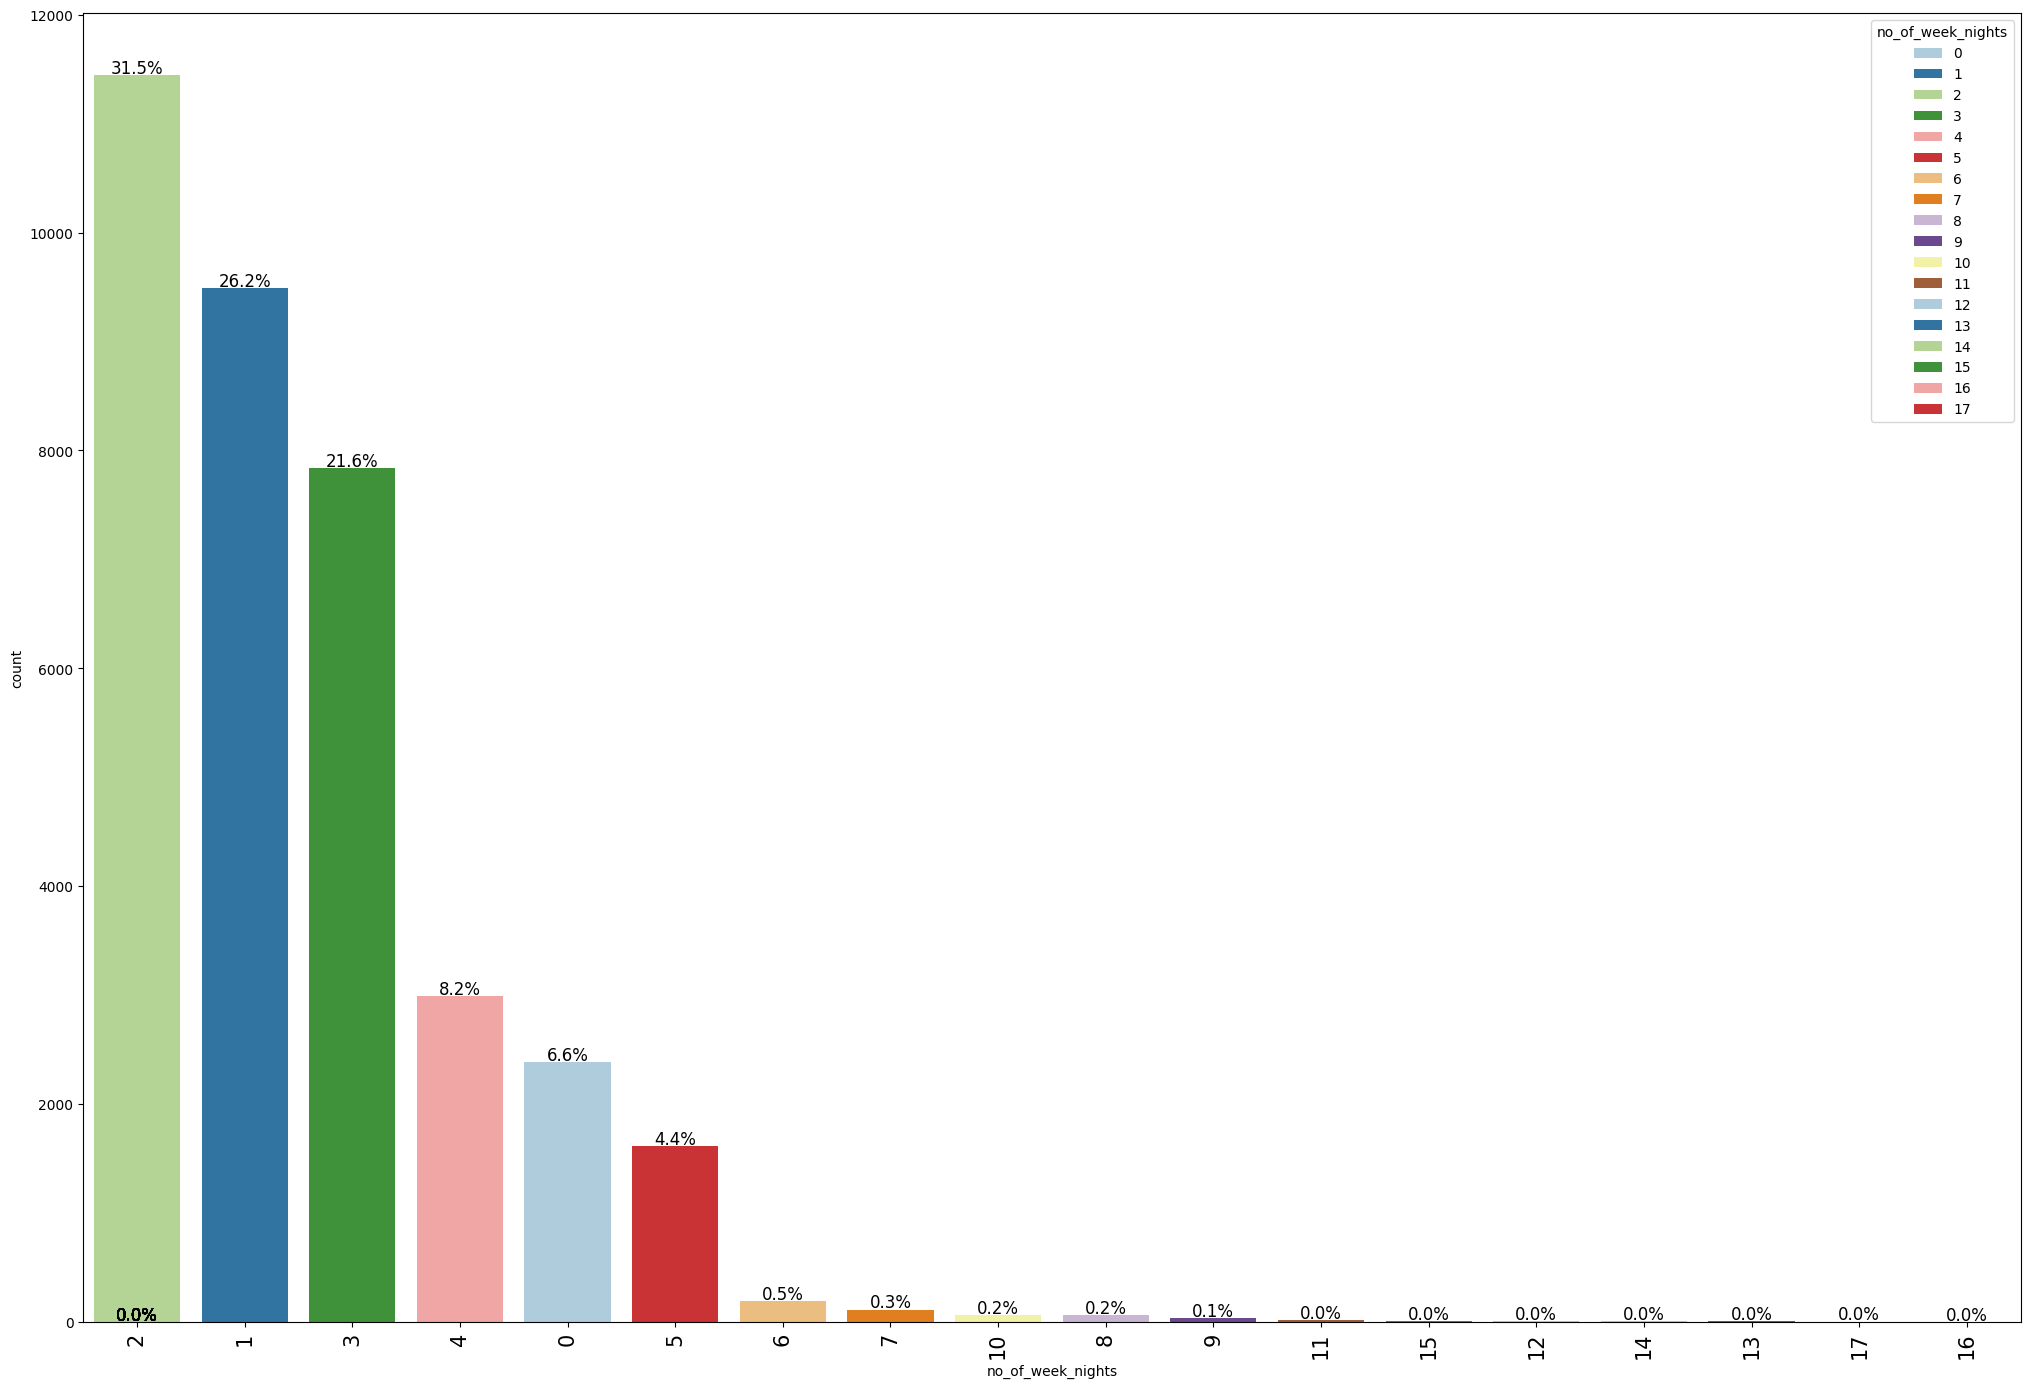

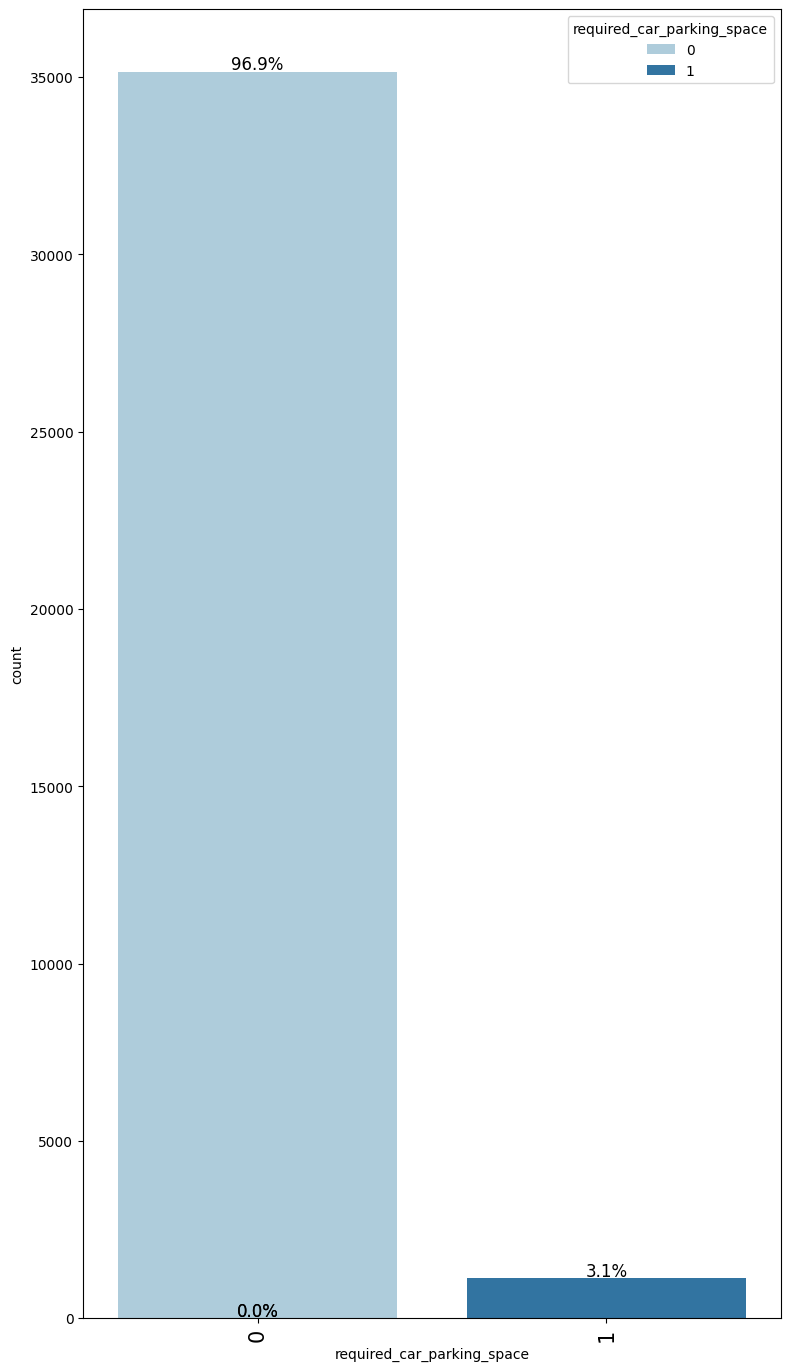

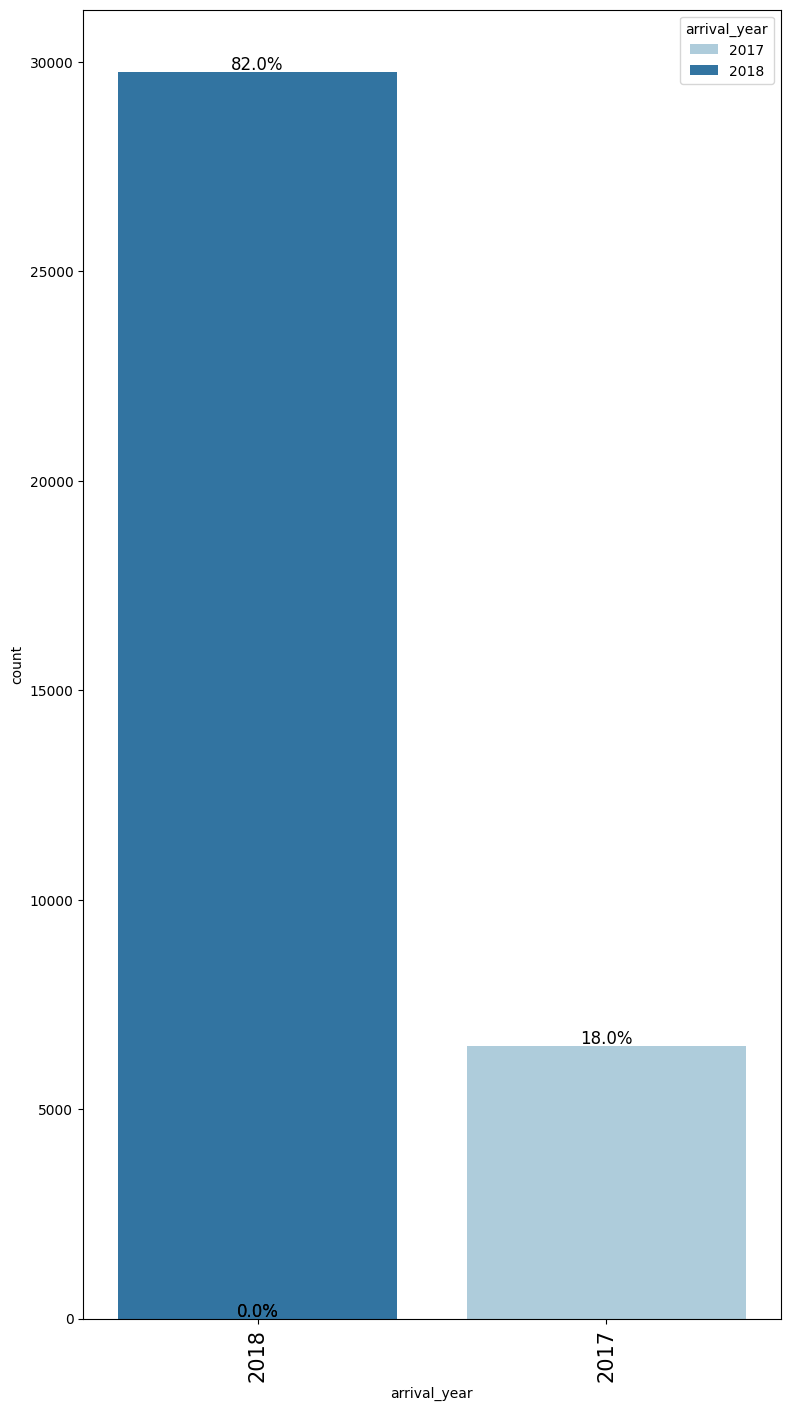

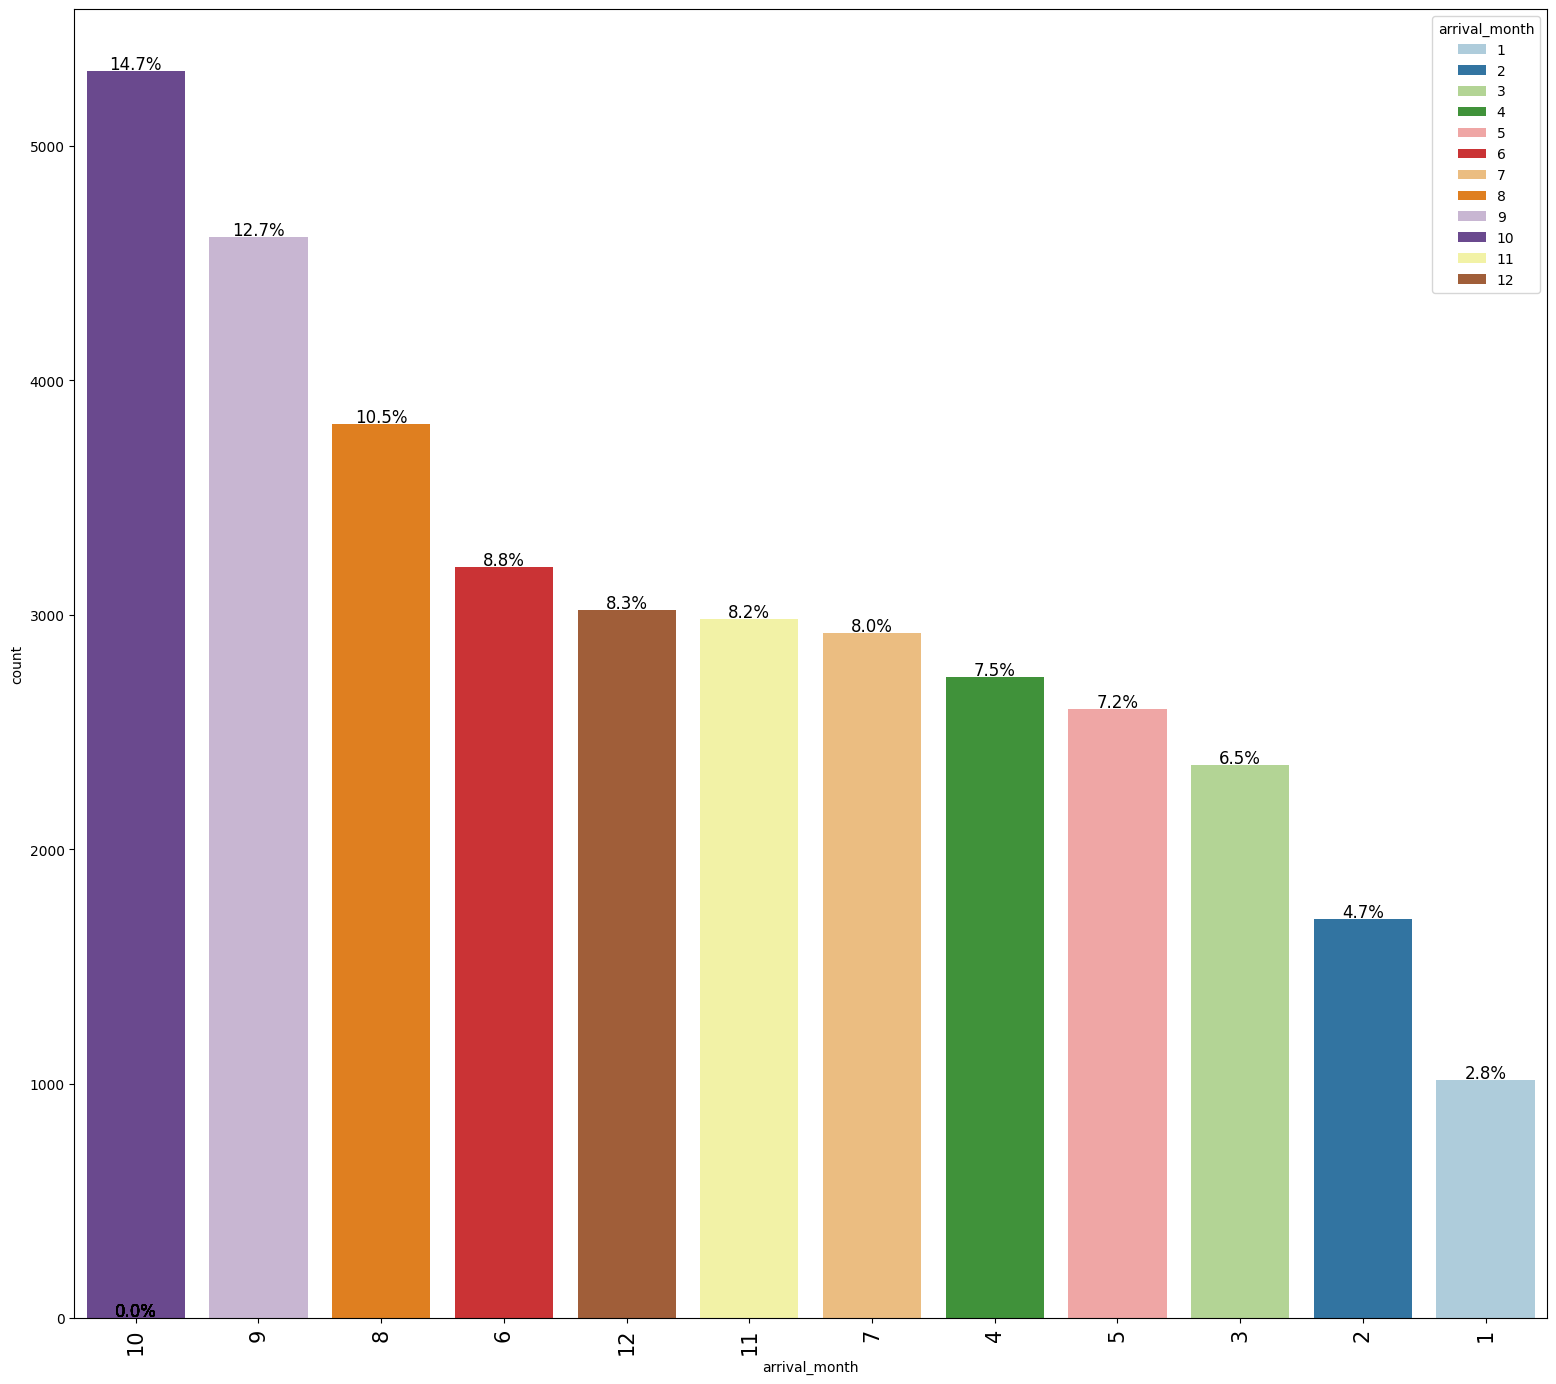

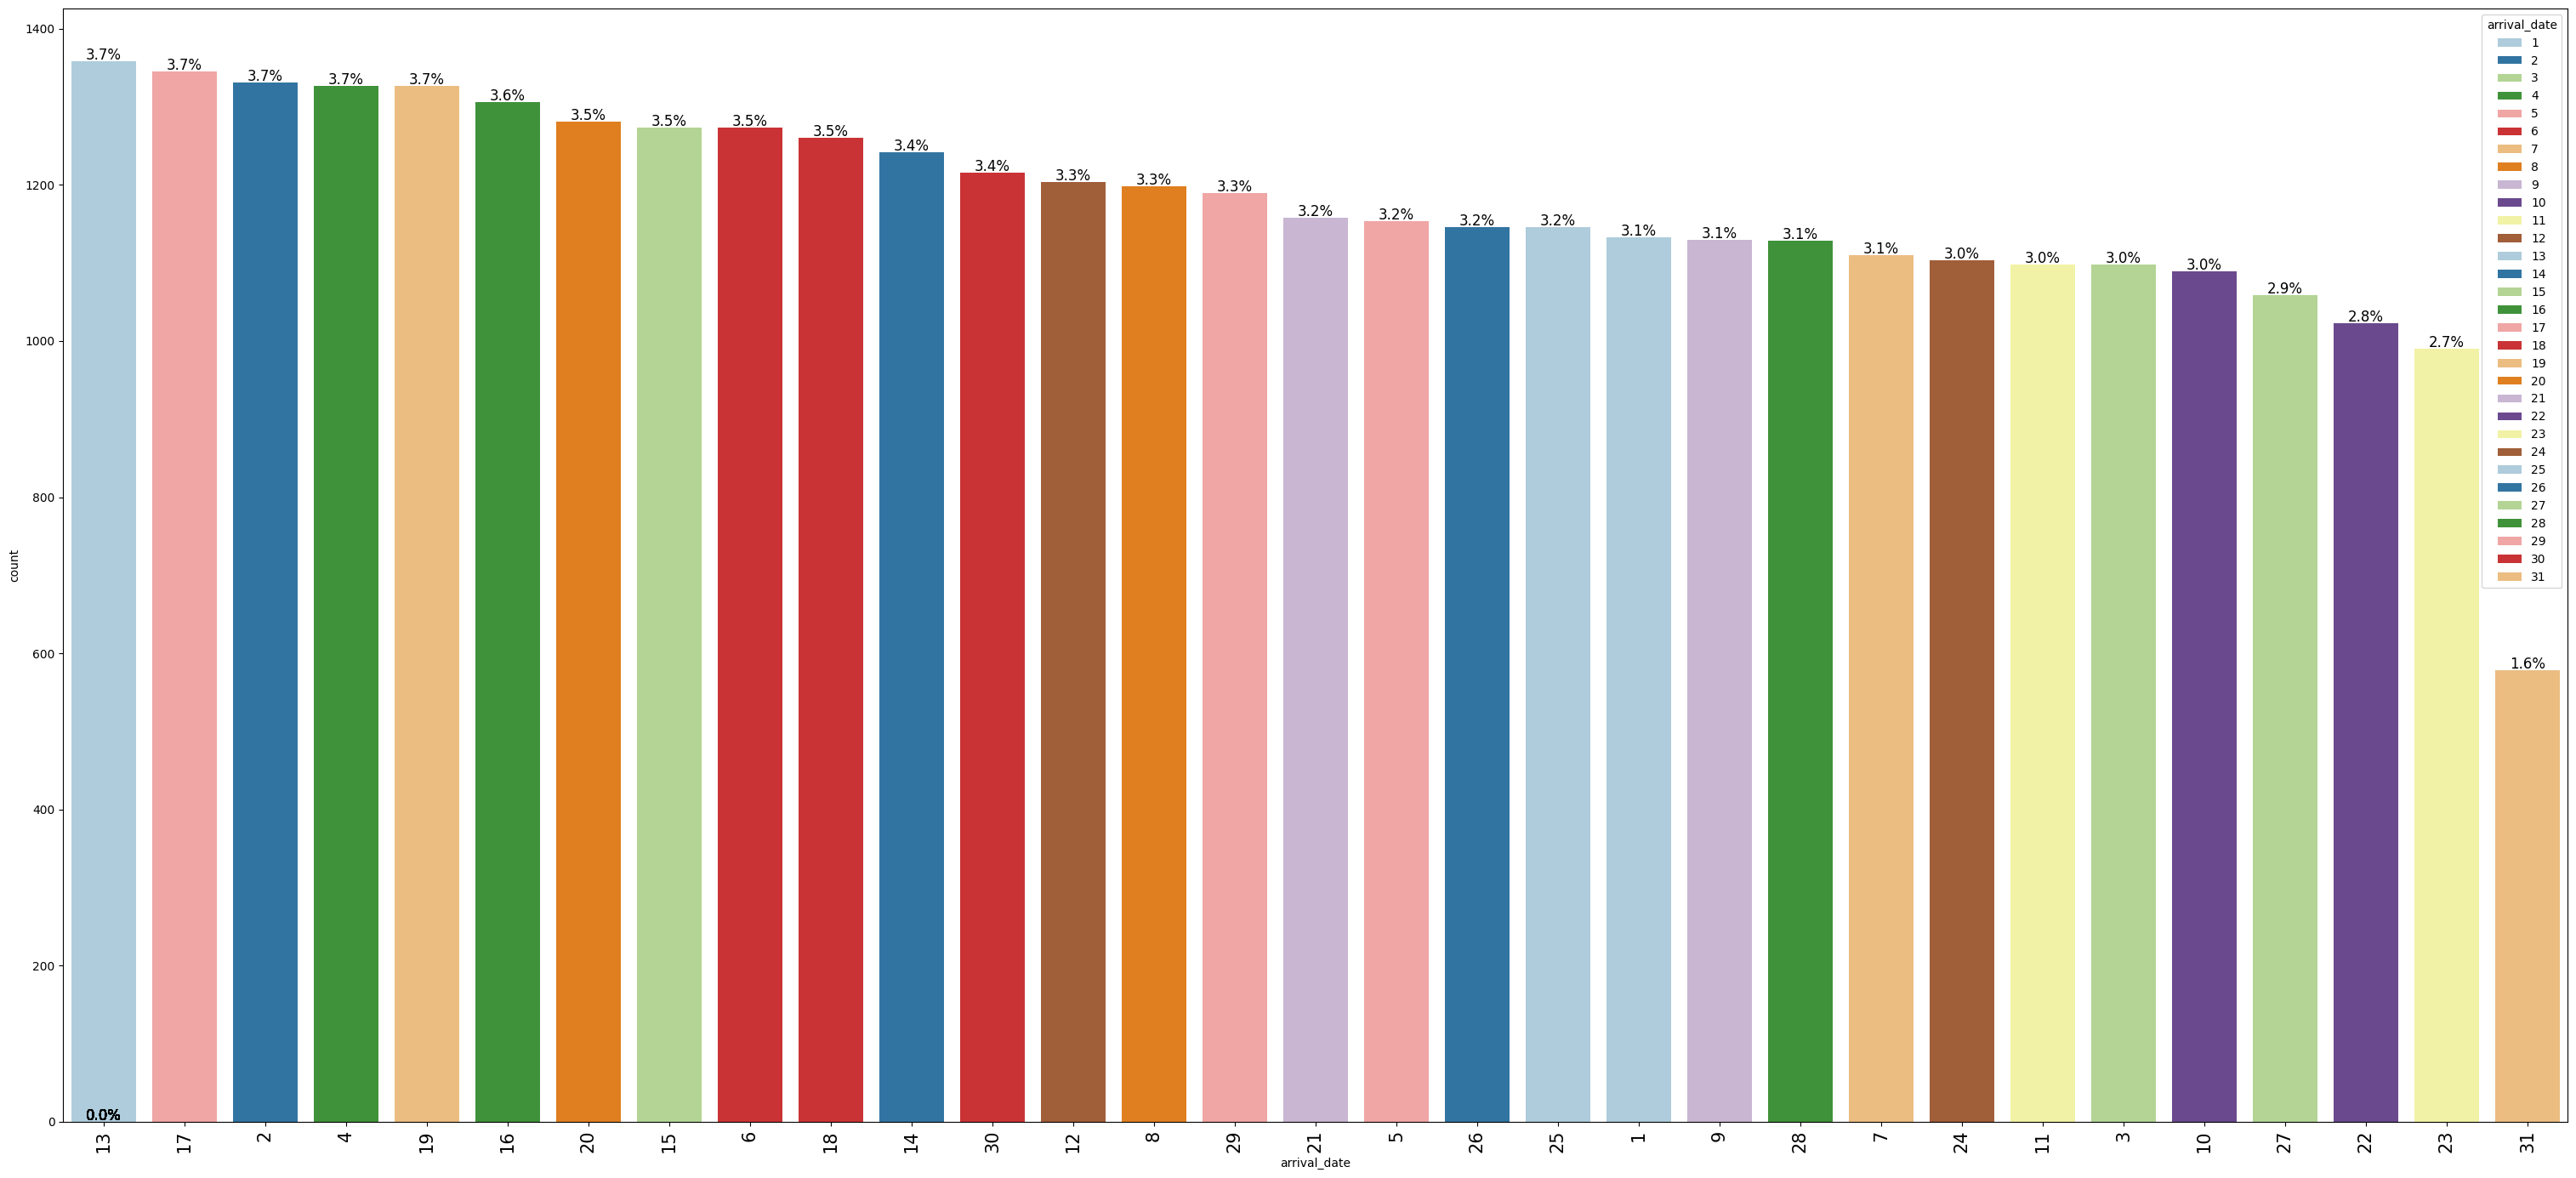

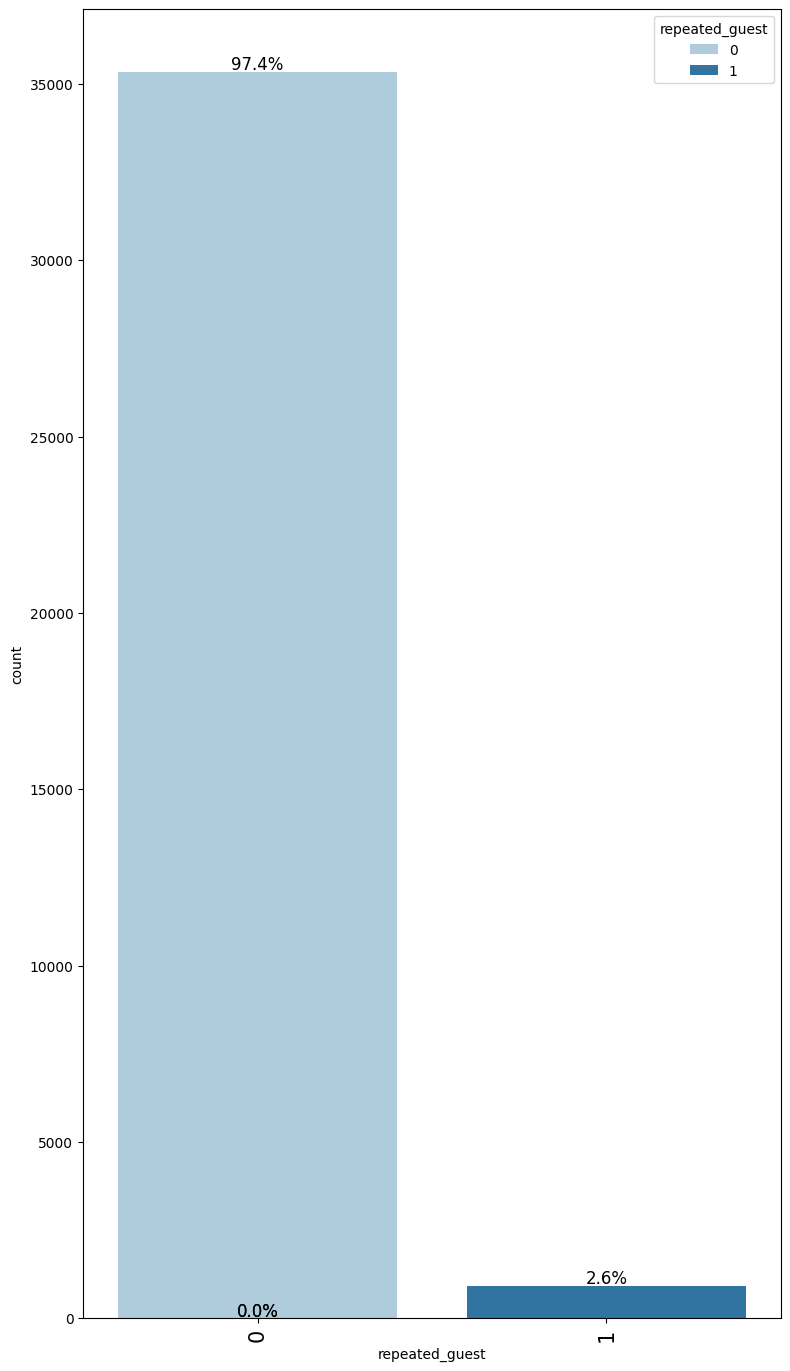

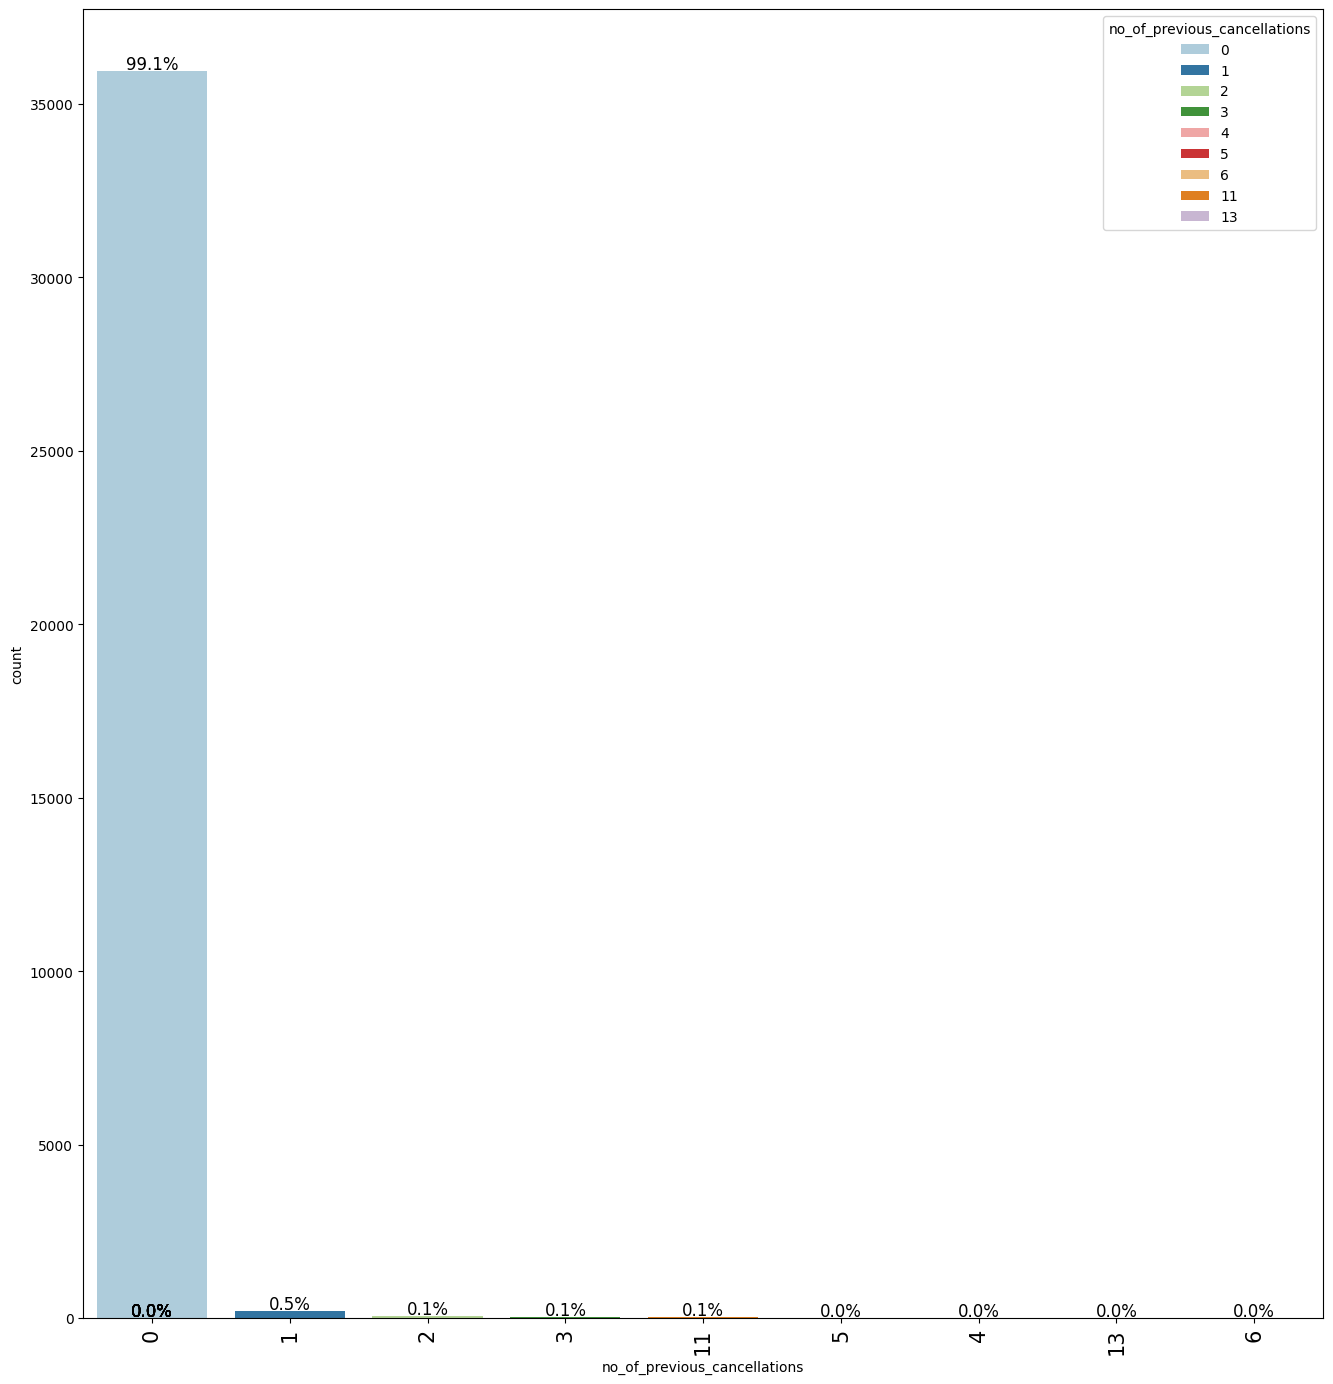

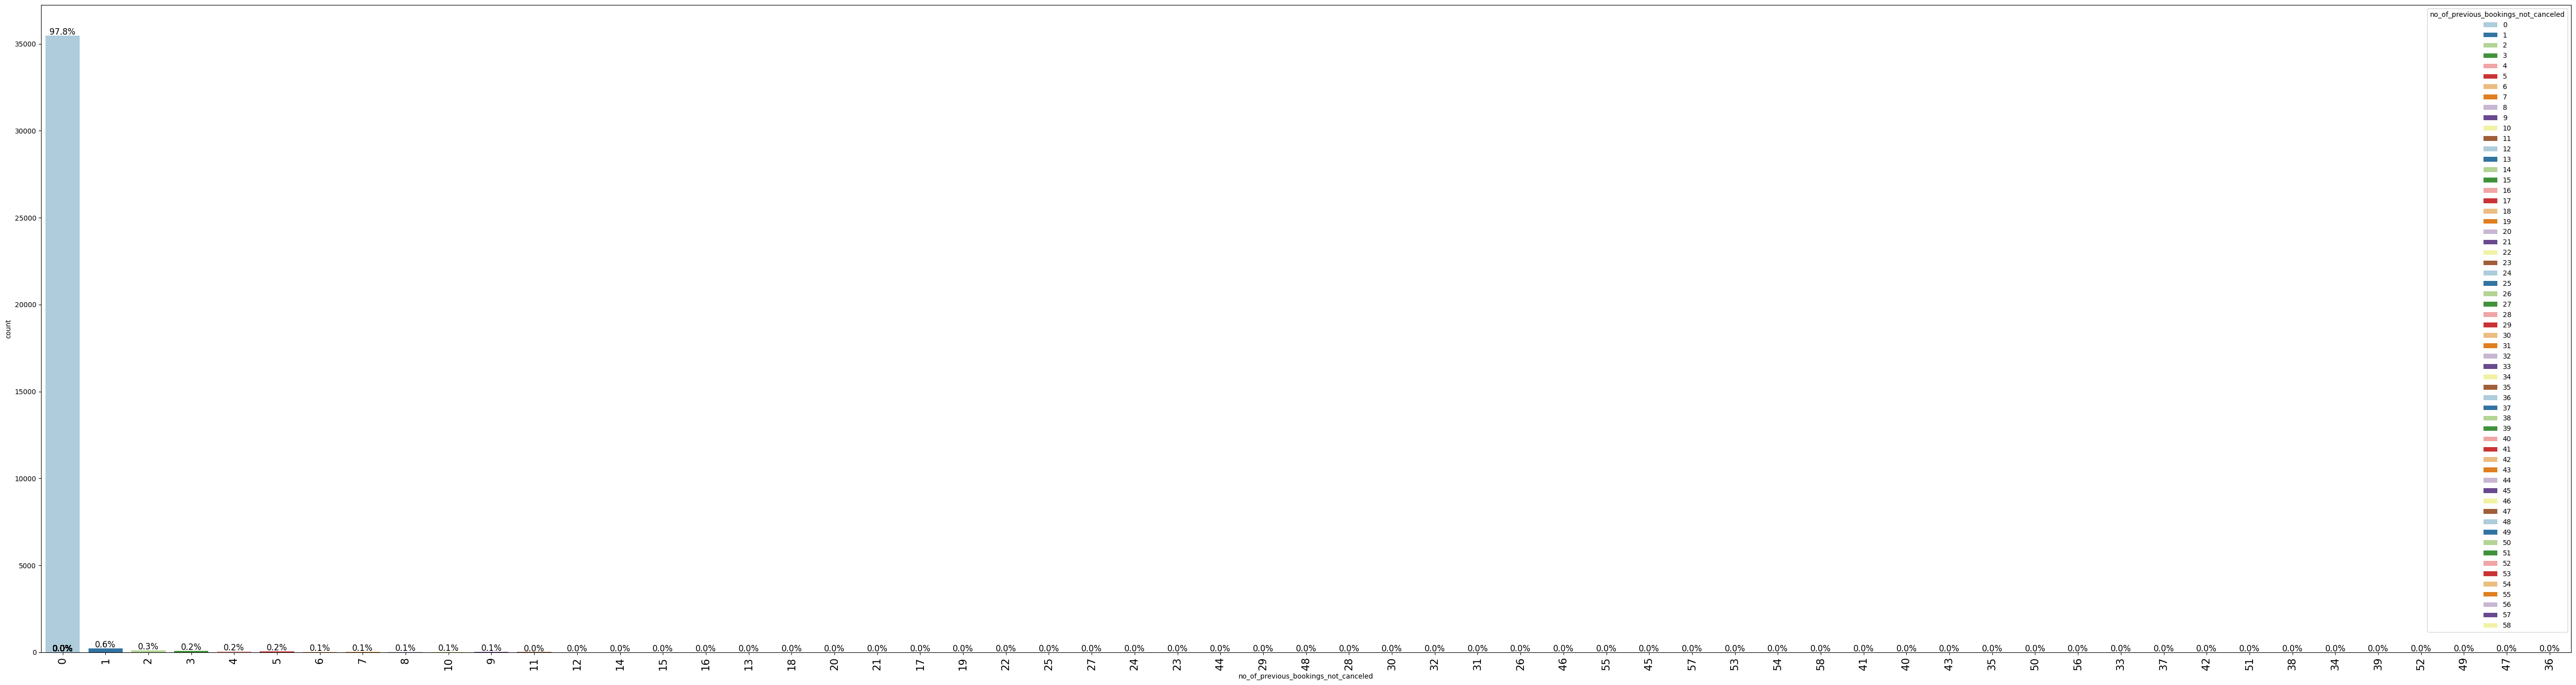

ValueError: Image size of 393700x1700 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 393700x1700 with 1 Axes>

In [ ]:
for col in cat_cols[1:]:
    labeled_barplot(data,col,perc=True)
    plt.savefig(f'/content/drive/My Drive/Python/Project-4-Machine-Learning-1/4{col}.jpg')
for col in num_cols[1:]:
    labeled_barplot(data,col,perc=True)
    plt.savefig(f'/content/drive/My Drive/Python/Project-4-Machine-Learning-1/num{col}.jpg')

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/content/drive/My Drive/Python/Project-4-Machine-Learning-1/12{predictor}_{target}.jpg')

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)

    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 10, 15))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.savefig(f'/content/drive/My Drive/Python/Project-4-Machine-Learning-1/13{predictor}_{target}.jpg')
    # plt.show()


### 2.2 **Bivariate Analysis**

In [ ]:
cor = data[num_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=cor,vmin=-1,vmax=+1, cmap="Spectral",annot=True, mask = np.triu(cor, +1))
plt.tight_layout()

# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/5.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


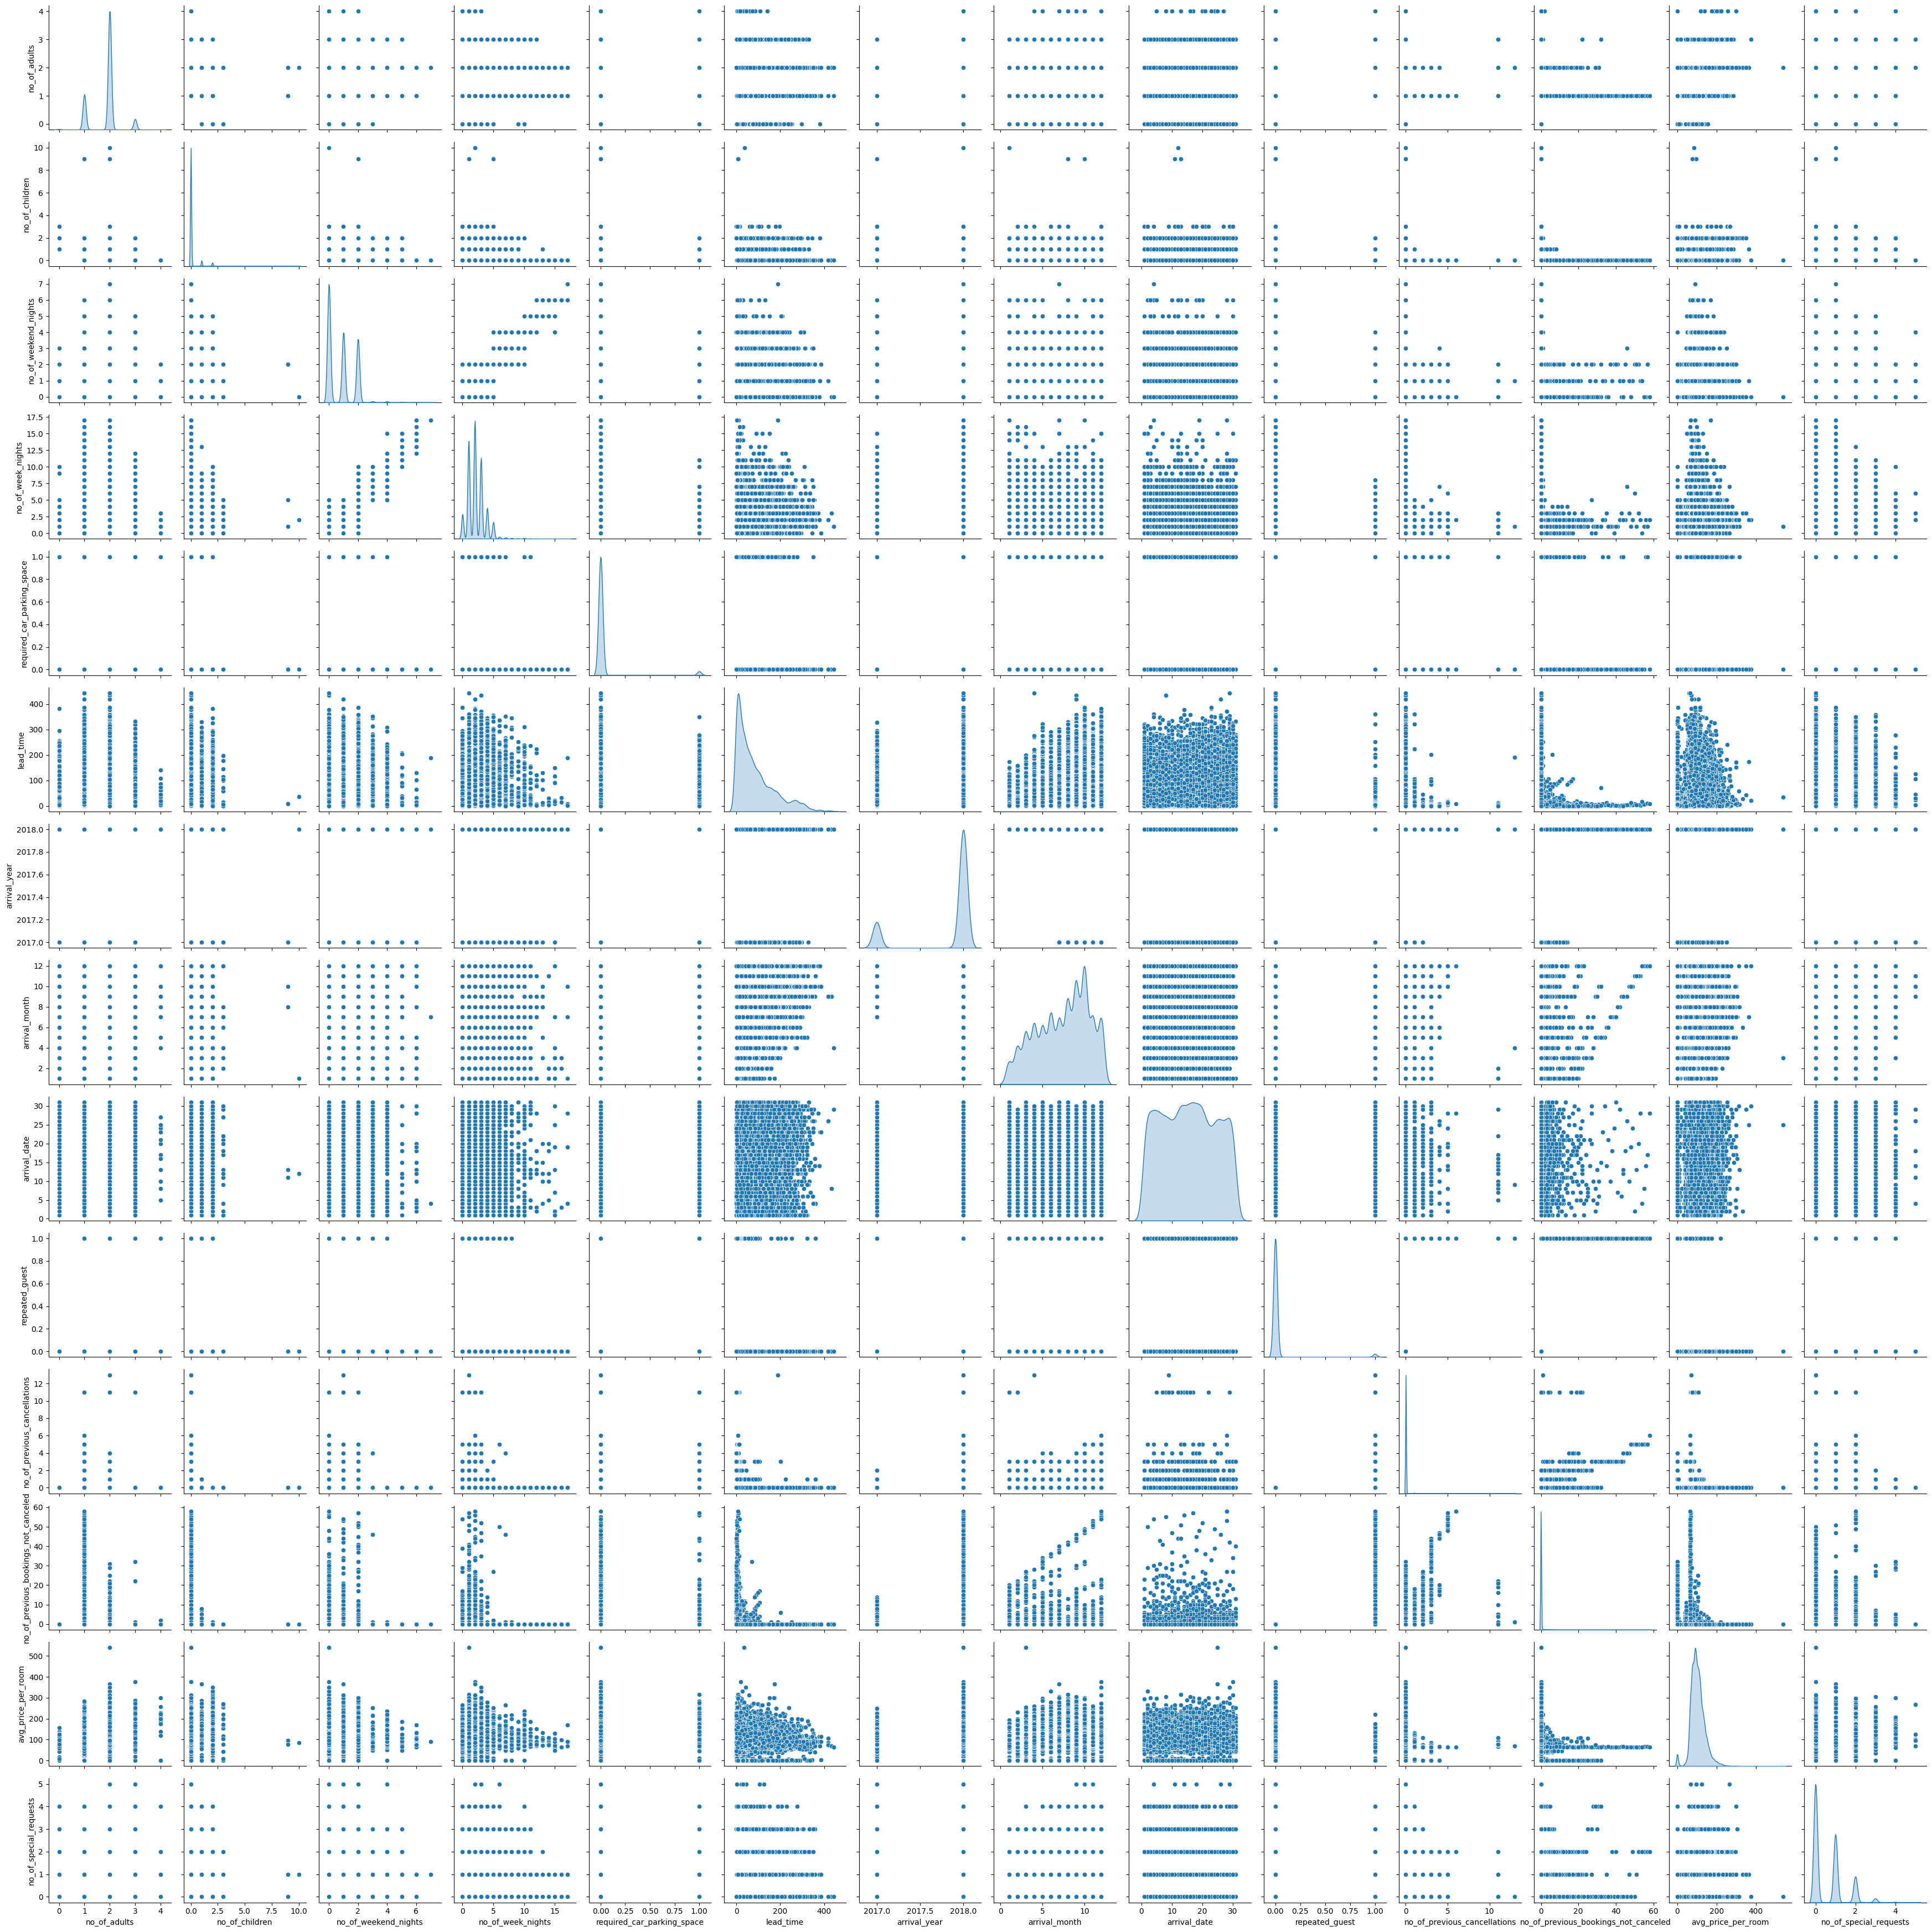

In [ ]:
sns.pairplot(data.drop('Booking_ID',axis=1),diag_kind="kde")
# plt.xticks(rotation=90);
plt.tight_layout()

# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/6.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


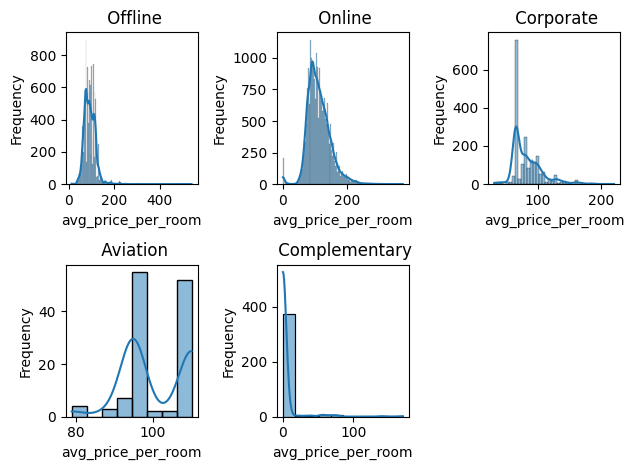

In [ ]:
for i, market_segment_type in enumerate(data['market_segment_type'].unique()):
    plt.subplot(2, 3, i + 1)
    # plt.figure(figsize=(14,8))
    plt.tight_layout()
    sns.histplot(data=data[data['market_segment_type'] == market_segment_type], x='avg_price_per_room', kde=True)
    plt.title(f" {market_segment_type}")

    plt.xlabel("avg_price_per_room")
    plt.ylabel("Frequency")

In [ ]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

How hotel prices change beyond market segments?

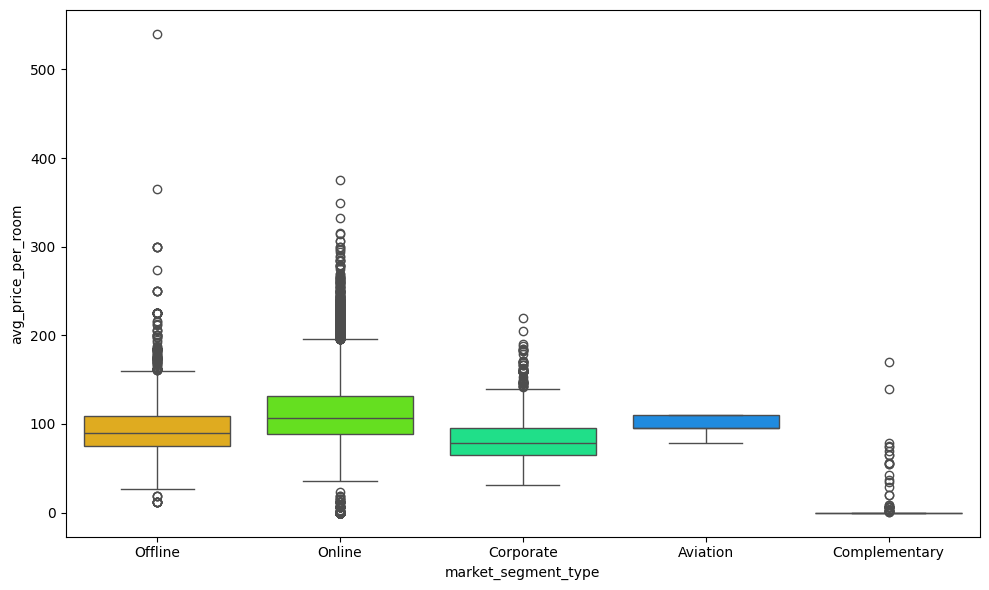

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='market_segment_type',y='avg_price_per_room',palette='gist_rainbow')
plt.tight_layout()

# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/100.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

As hotel prices are very demand heavy, online seems to have the highest median price, since online is where the most booking takes place.

Booking Status variation across different market segments

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


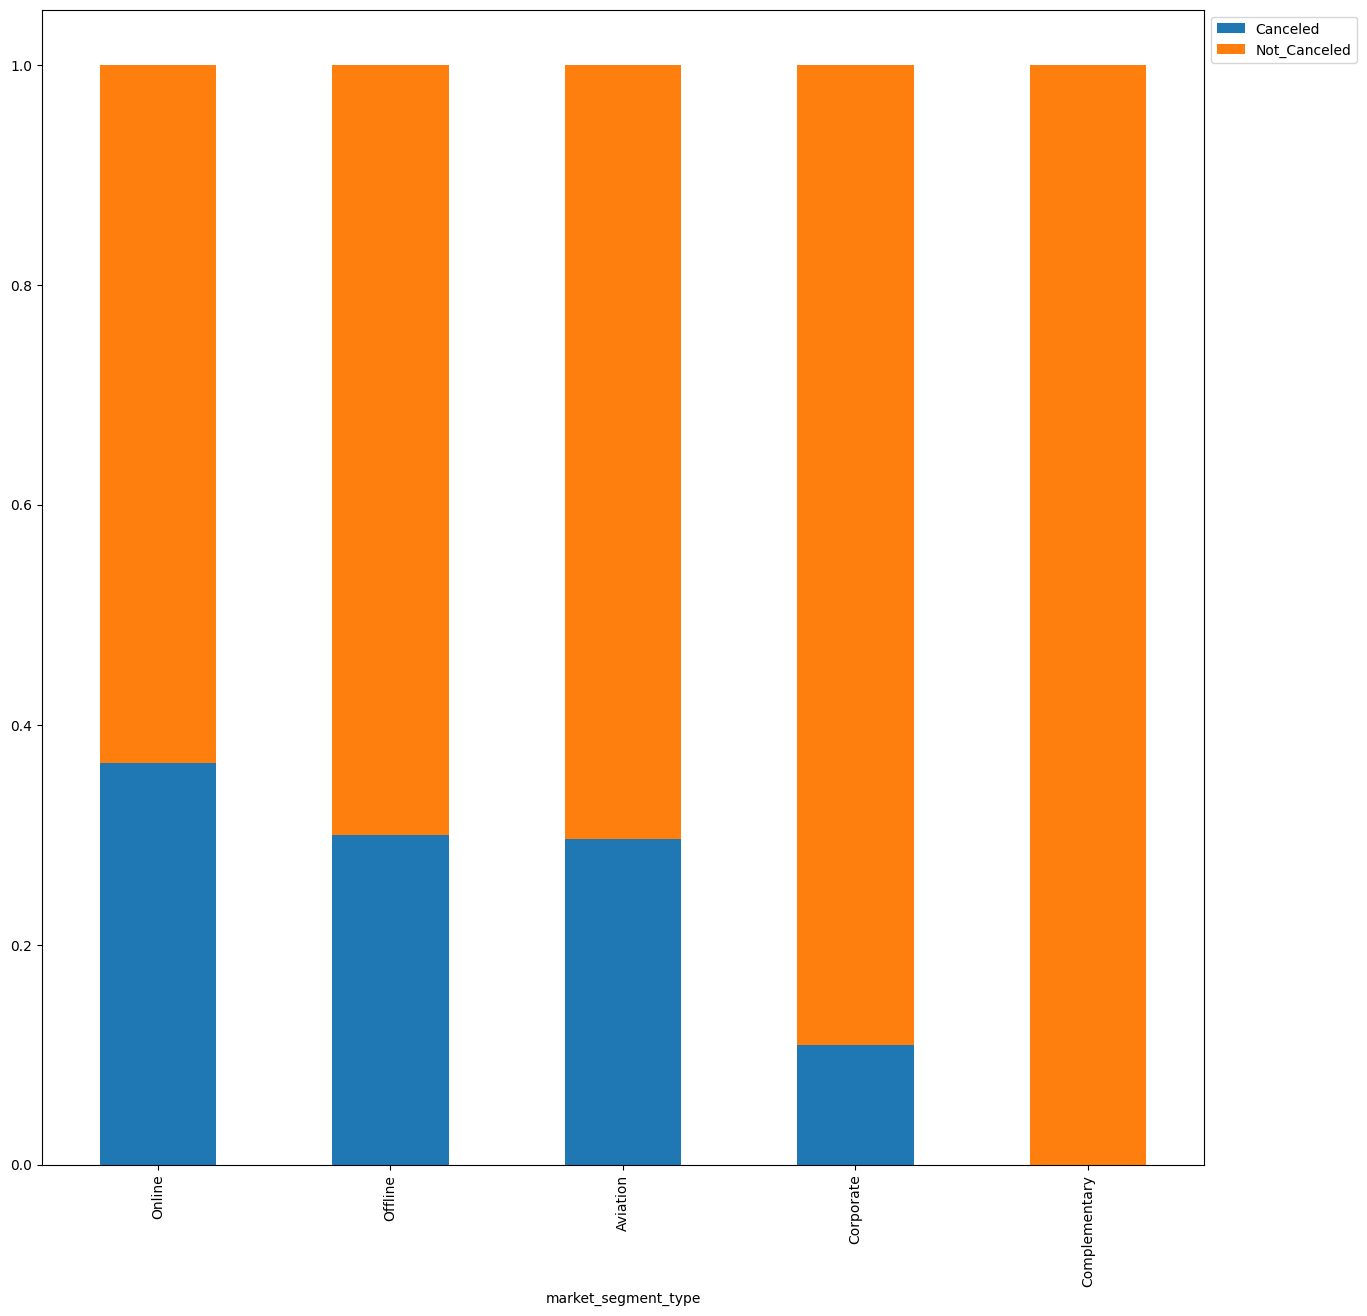

In [ ]:
stacked_barplot(data,'market_segment_type','booking_status')

Most of the cancellations when customers book the hotel online and almost no cancellations happen when it is complementary

How special requirements impact booking status?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


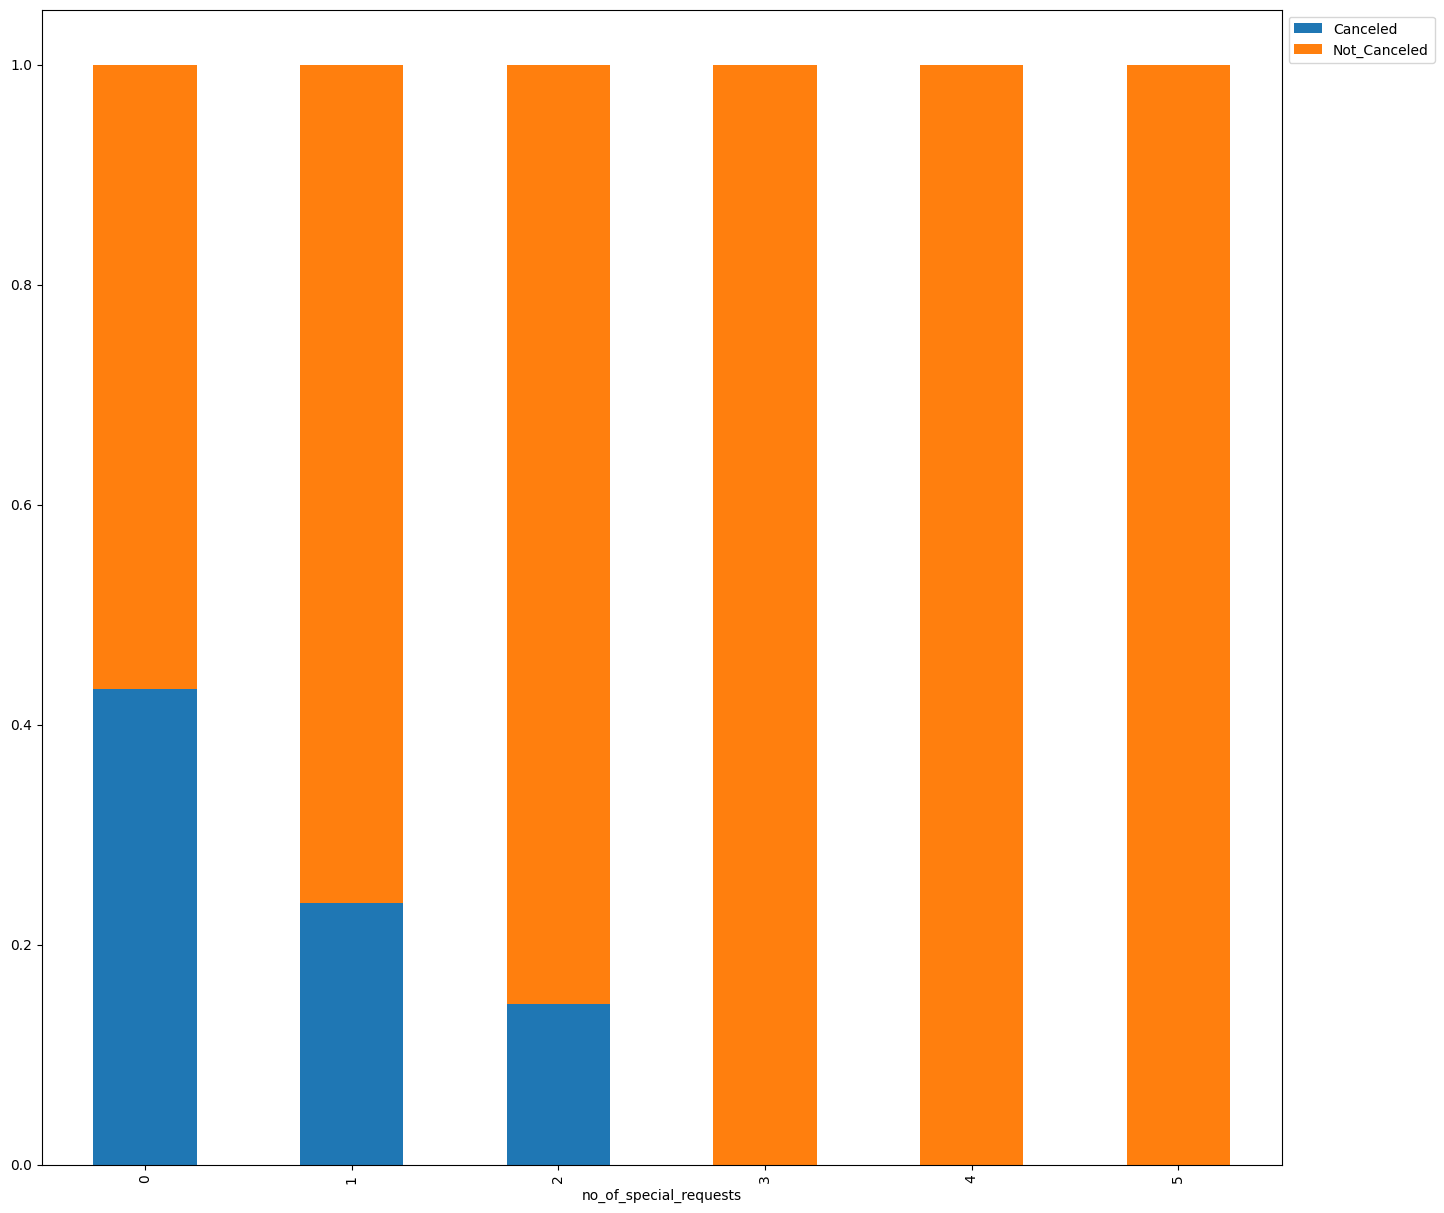

In [ ]:
stacked_barplot(data,'no_of_special_requests','booking_status')

When there is no special requests, you can see that there are more more cancellations. When there is more special requests, there is less likelihood of cancellation

Do special requests impact the prices of the room?

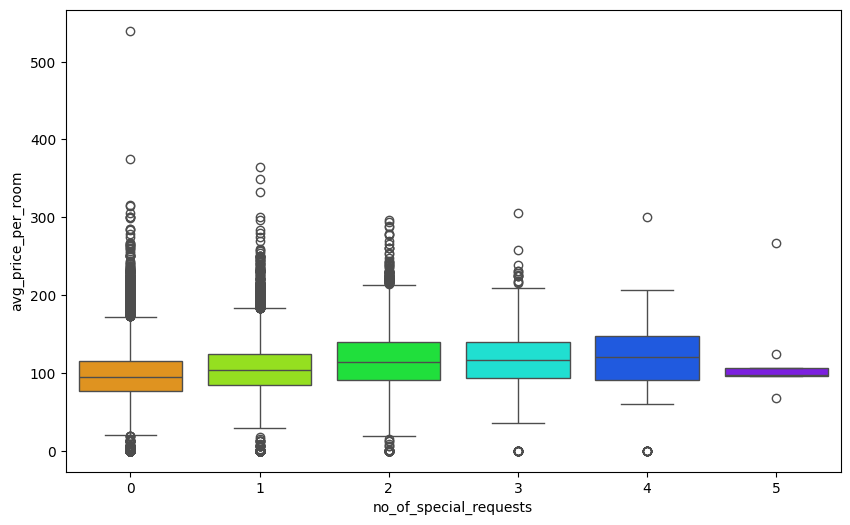

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='no_of_special_requests',y='avg_price_per_room',palette='gist_rainbow')
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/101.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

As the number of special requests increase the average price per room increases.

How does price per room impact booking status?

In [ ]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

NameError: name 'distribution_plot_wrt_target' is not defined

Lead time and booking status

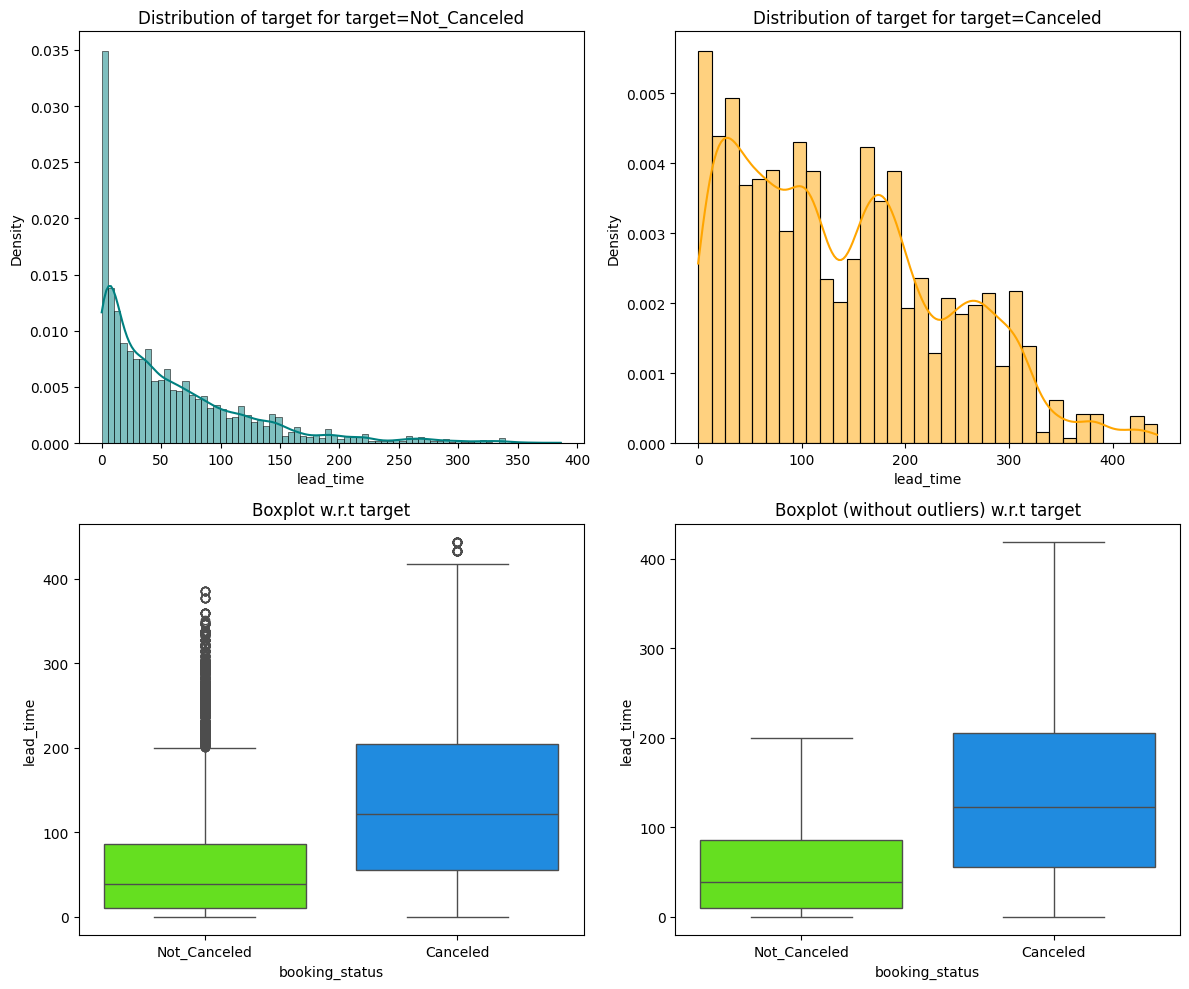

In [ ]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

Now let's study the customers who traveled with their families and analyze the impact on booking status.¶

In [ ]:
family = data[(data['no_of_children']>=0) & (data['no_of_adults']>1)]
family.shape

(28441, 19)

booking_status  Canceled  Not_Canceled    All
Total                                        
All                 9985         18456  28441
2                   8213         15506  23719
3                   1368          2425   3793
4                    398           514    912
5                      5            10     15
11                     1             0      1
12                     0             1      1
------------------------------------------------------------------------------------------------------------------------


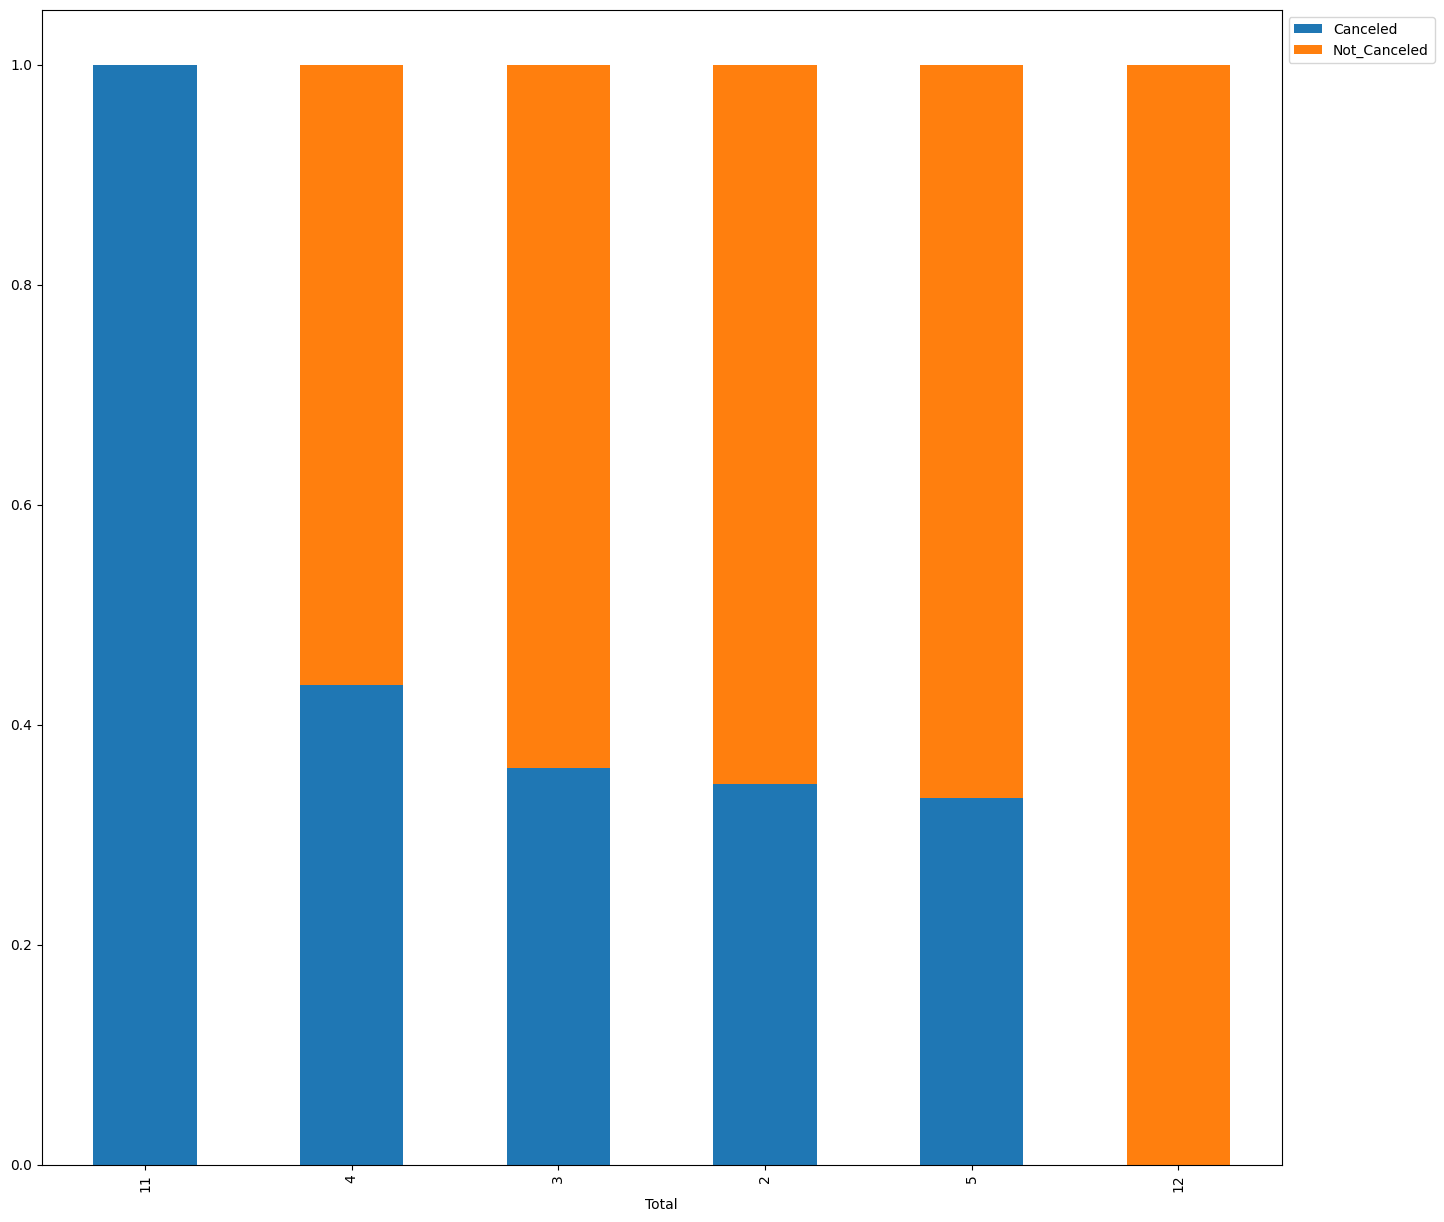

In [ ]:
family['Total'] = family['no_of_adults'] + family['no_of_children']
stacked_barplot(family, 'Total', 'booking_status')

In [ ]:
data[data['no_of_children']>=9]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
6338    INN06339             2              10                     0   
10041   INN10042             1               9                     2   
10061   INN10062             2               9                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
6338                   2       Meal Plan 1                           0   
10041                  1       Meal Plan 1                           0   
10061                  5       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
6338         Room_Type 4         37          2018              1   
10041        Room_Type 1         11          2017             10   
10061        Room_Type 2          8          2017              8   

       arrival_date market_segment_type  repeated_guest  \
6338             12              Online               0   
10041            11           Corporate               0   
10061            13              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
6338                              0                                     0   
10041                             0                                     0   
10061                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
6338                84.45                       1   Not_Canceled  
10041               95.00                       0   Not_Canceled  
10061               76.50                       1       Canceled

Except these 3 extreme values we can observe that the likelihood of cancellation is equal regardless of how many children they have

Percentage of bookings cancelled each month

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


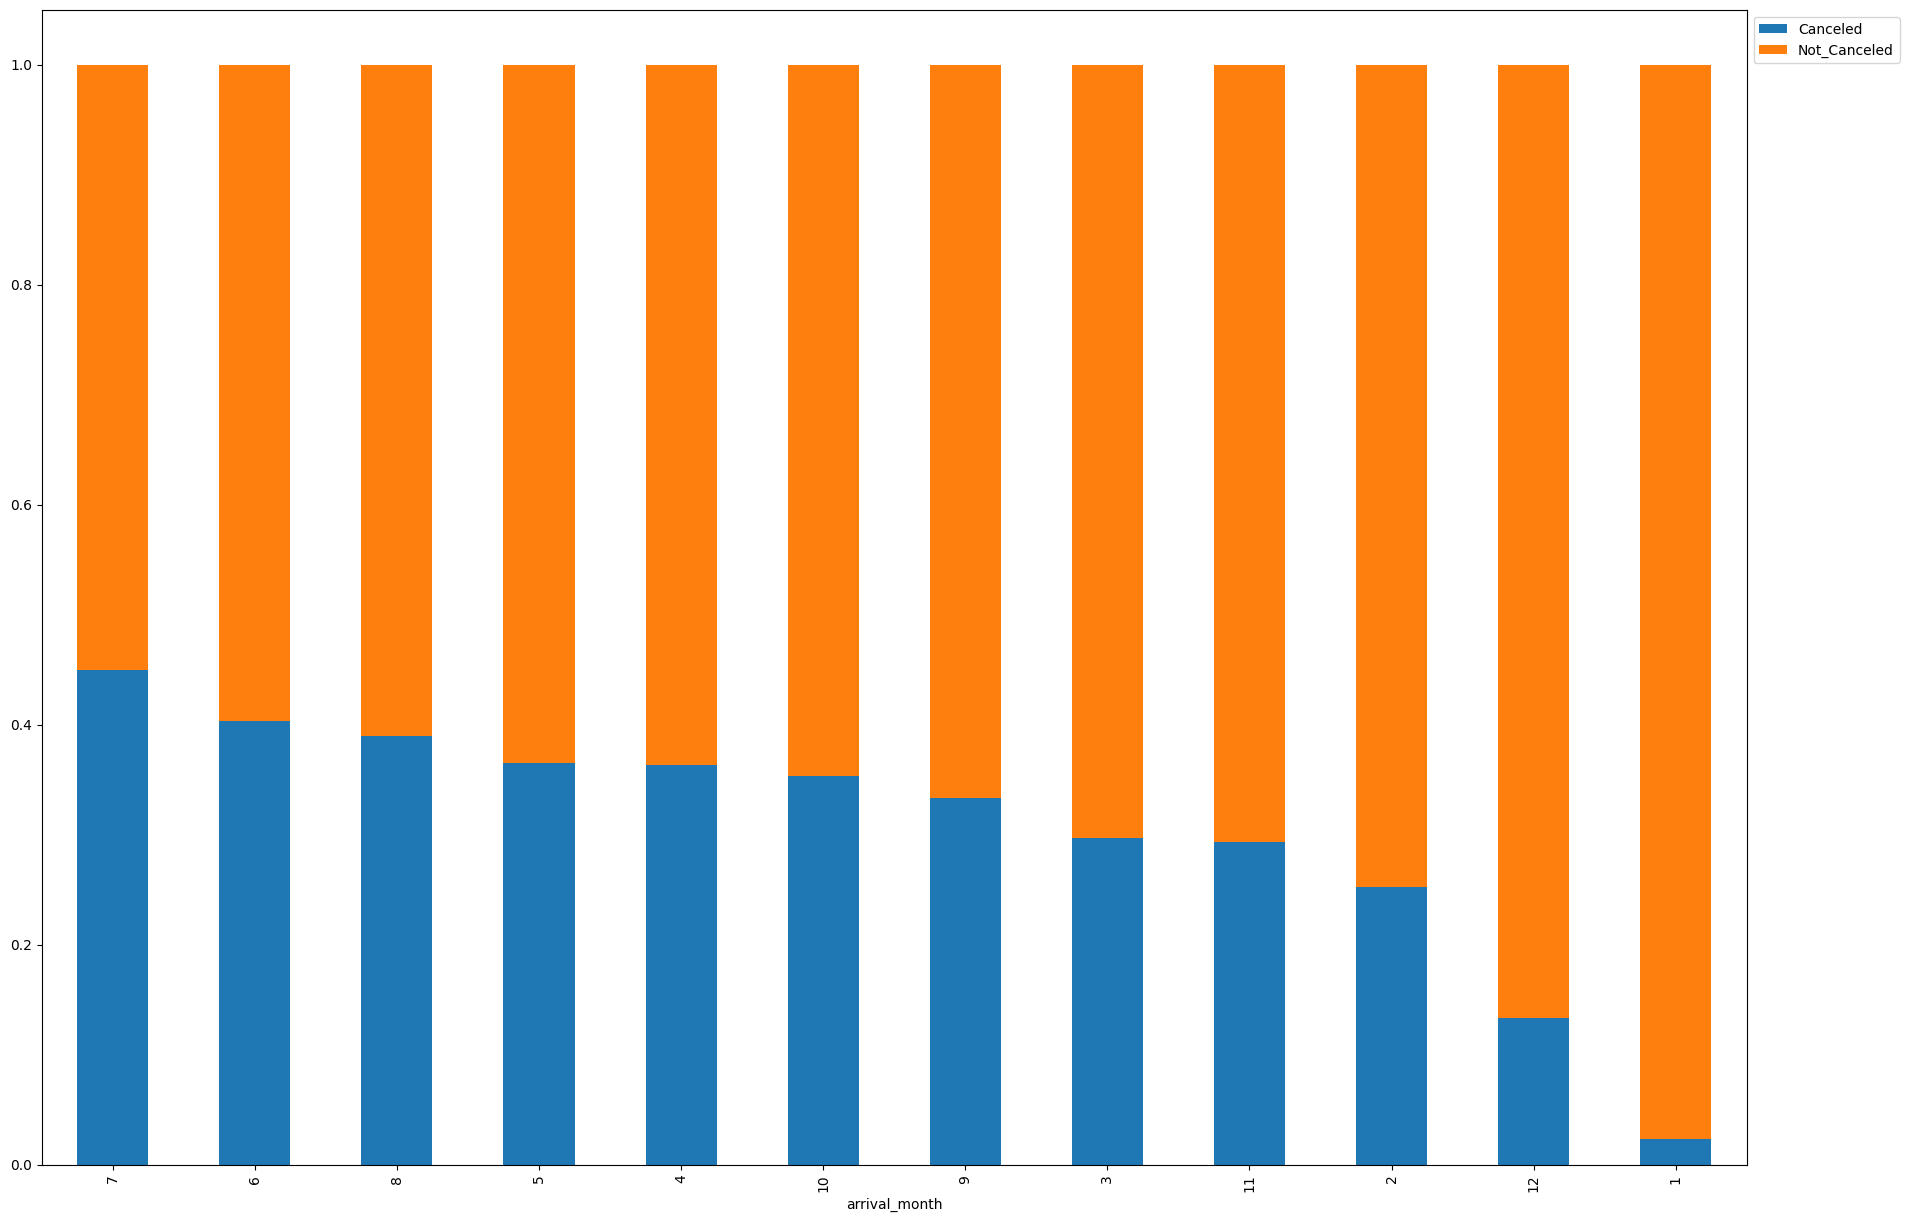

In [ ]:
stacked_barplot(data,'arrival_month','booking_status')

Percentage of repeating guests that cancel

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


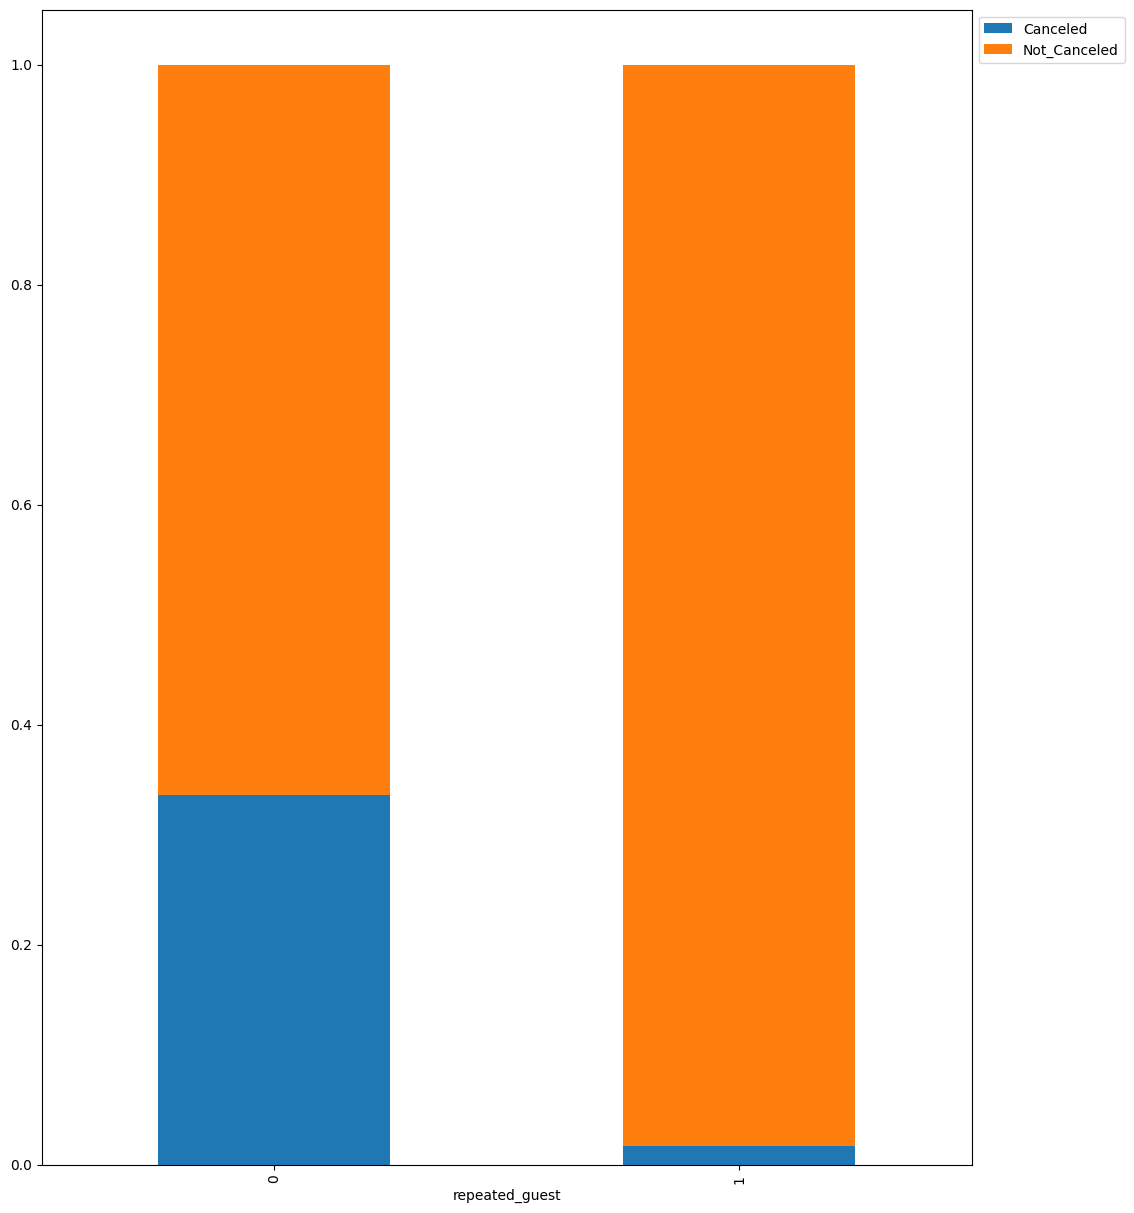

In [ ]:
stacked_barplot(data,'repeated_guest','booking_status')

Repeated customers rarely cancel their booking denoting loyality to the brand.

How much prices vary across different months?

<Axes: xlabel='Month', ylabel='Guests'>

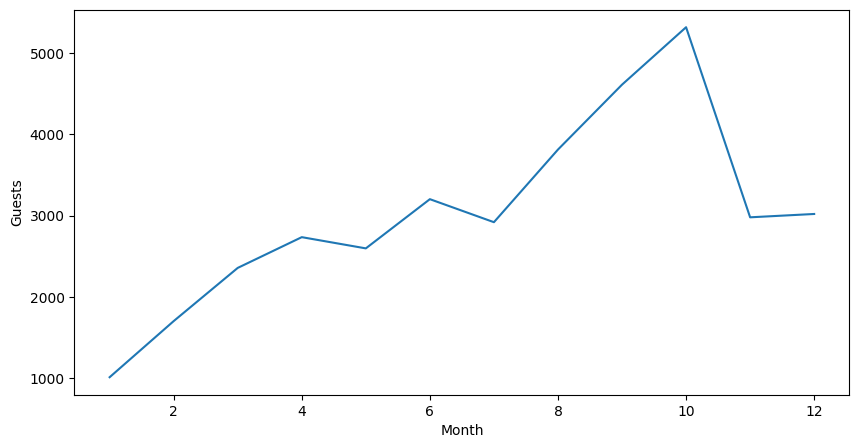

In [ ]:
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")


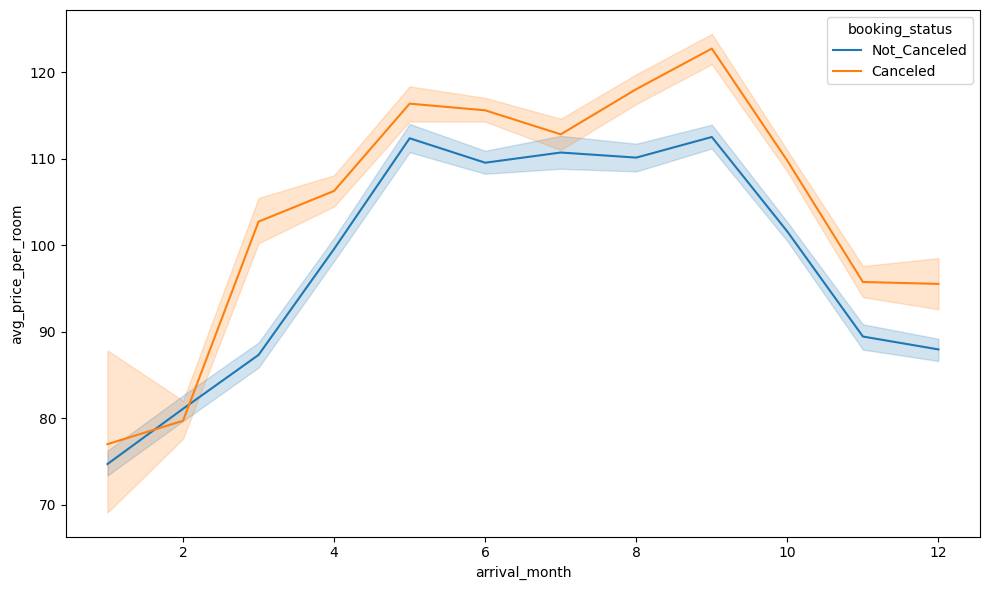

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='arrival_month',y='avg_price_per_room',hue='booking_status')
plt.tight_layout()
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/line_plot.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

# Save the figure with adjusted layout

The prices are highest in august and september but it gradually falls and only to move up during december. In almost all months canceled number are more than not canceled except around february  

# Data preprocessing

## Duplicate value check and Missing value treatment

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

## Treating outliers

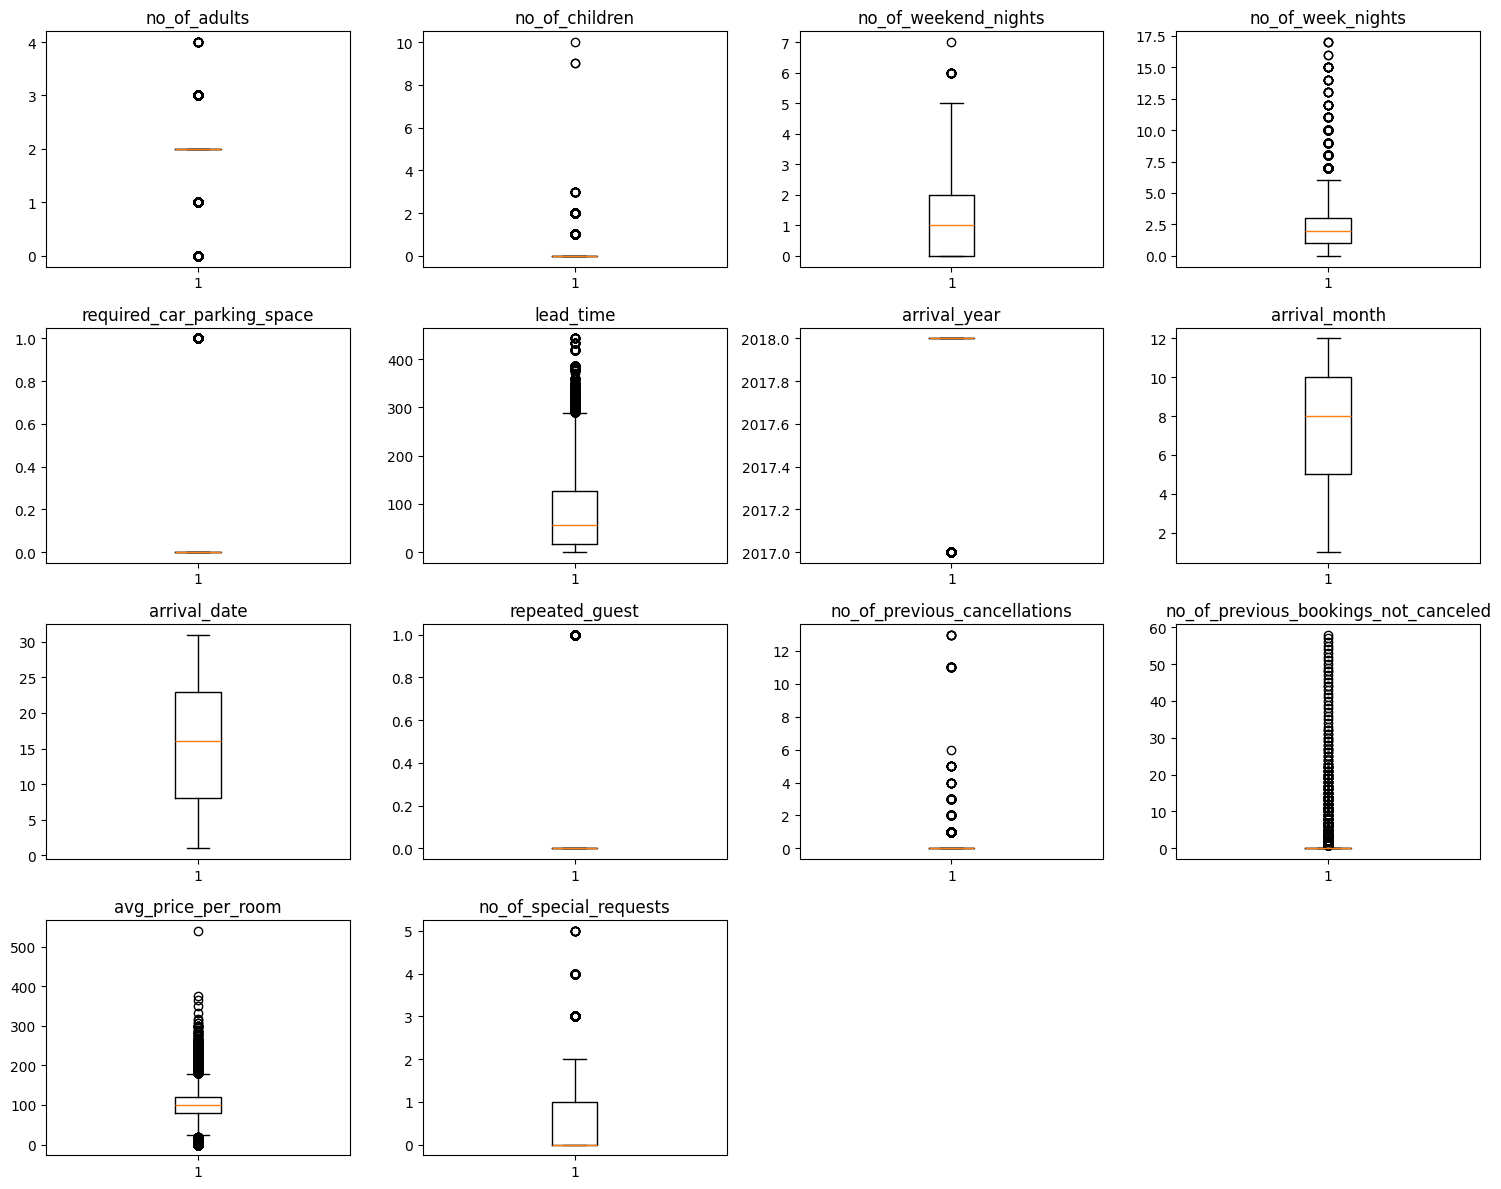

In [ ]:

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observations

There are quite a few outliers in the data.
However, we will not treat them as they are proper values.

## Data Preparation for modeling

In [ ]:



X=data.drop(['booking_status','Booking_ID'],axis=1)
y=data['booking_status']

X=pd.get_dummies(X,columns=[
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 ],drop_first=True)
X.astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
y_train.reset_index(inplace=True,drop=True)

# adding a contstant to X variable
X_train = sm.add_constant(X_train)
# adding a contstant to X variable
X_test = sm.add_constant(X_test)

# Convert 'booking_status' in y_train and y_test to 0 and 1
y_train = y_train.map({'Not_Canceled': 0, 'Canceled': 1})
y_test = y_test.map({'Not_Canceled': 0, 'Canceled': 1})
X_train.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

**The Stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [ ]:
X_train.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     0   
2    1.0             2               0                     1   
3    1.0             1               0                     0   
4    1.0             2               0                     0   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  3                           0        178          2018   
1                  3                           0        209          2018   
2                  2                           0        121          2018   
3                  1                           0          0          2018   
4                  2                           0        245          2018   

   arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
0             10            24  ...                           False   
1             10             5  ...                           False   
2              6            24  ...                           False   
3             12            14  ...                           False   
4              6            17  ...                           False   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                               True   
4                           False                              False   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                         True   
3                          False                        False   
4                          False                         True   

   market_segment_type_Online  
0                       False  
1                        True  
2                       False  
3                       False  
4                       False  

[5 rows x 28 columns]

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
booking_status
0    0.672377
1    0.327623
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.672333
1    0.327667
Name: proportion, dtype: float64


## Scaling the Data

In [ ]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)


# **Logistic Regression Model Building**


## Model evaluation criterion

### Terms and Examples

- **True Positive (TP):**
  - **Prediction:** The ticket is predicted to be canceled (1).
  - **Reality:** The ticket is actually canceled (1).
  - **Example:** The model predicts a ticket will be canceled, and the customer indeed cancels it.

- **False Positive (FP):**
  - **Prediction:** The ticket is predicted to be canceled (1).
  - **Reality:** The ticket is actually not canceled (0).
  - **Example:** The model predicts a ticket will be canceled, but the customer does not cancel it.

- **False Negative (FN):**
  - **Prediction:** The ticket is predicted to not be canceled (0).
  - **Reality:** The ticket is actually canceled (1).
  - **Example:** The model predicts a ticket will not be canceled, but the customer cancels it.

- **True Negative (TN):**
  - **Prediction:** The ticket is predicted to not be canceled (0).
  - **Reality:** The ticket is actually not canceled (0).
  - **Example:** The model predicts a ticket will not be canceled, and the customer does not cancel it.

---

### Implications

- **False Positive (FP):**
  - You mistakenly predict a ticket will be canceled, but it isn’t.
  - **Impact:** Could lead to unnecessary notifications or actions (e.g., offering cancellation options or reallocating resources).

- **False Negative (FN):**
  - You fail to predict that a ticket will be canceled when it actually is.
  - **Impact:** Missed opportunity to take proactive steps (e.g., sending reminders or managing resources).

---

### Conclusion

- If minimizing **missed cancellations** is critical (e.g., reallocating seats or managing resources), focus on **reducing False Negatives (FN)** and maximizing **Recall**.
- If avoiding **unnecessary actions** is important (e.g., sending false cancellation alerts), focus on **reducing False Positives (FP)** and increasing **Precision**.


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


#-----------------------------------------------------------------------------------------


def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

  #-----------------------------------------------------------------------------------------

Without removing the multicollinearity if you try building the model then singular matrix error might come

# **Model Performance Improvement for Logistic Regression**

In [ ]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled.values.astype(float), i) for i in range(X_train_scaled.shape[1])],
    index=X_train_scaled.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))


VIF values: 

const                                         NaN
no_of_adults                             1.338514
no_of_children                           2.020921
no_of_weekend_nights                     1.066945
no_of_week_nights                        1.095423
required_car_parking_space               1.035690
lead_time                                1.387228
arrival_year                             1.428618
arrival_month                            1.276298
arrival_date                             1.006743
repeated_guest                           1.784037
no_of_previous_cancellations             1.367466
no_of_previous_bookings_not_canceled     1.637137
avg_price_per_room                       2.030696
no_of_special_requests                   1.250267
type_of_meal_plan_Meal Plan 2            1.263369
type_of_meal_plan_Meal Plan 3            1.025579
type_of_meal_plan_Not Selected           1.273438
room_type_reserved_Room_Type 2           1.096867
room_type_reserved_Room_Type 3      

* The coefficients of the logistic regression model are in terms of log(odd).
* `P>|z|`: The interpretation of p-values is similar to that in Linear Regression.

In [ ]:


# Build a Logistic Regression model using selected features only (with VIF <5)
selected_features = np.array((vif_series[vif_series < 5]).index)

# Exclude the constant term ('const') when selecting features
x_train_selected = X_train_scaled[selected_features[selected_features != 'const']]
x_test_selected = X_test_scaled[selected_features[selected_features != 'const']]

# Fit the Logistic Regression model
LR_model = sm.Logit(y_train, x_train_selected.astype(float)).fit()

# Display the model summary
print(LR_model.summary())

# Remove features with p-values > 0.05
significant_features = LR_model.pvalues[LR_model.pvalues <= 0.05].index
x_train_significant = x_train_selected[significant_features]
x_test_significant = x_test_selected[significant_features]

# Refit the model with significant features
LR_model_significant = sm.Logit(y_train, x_train_significant.astype(float)).fit()
print(LR_model_significant.summary())



Optimization terminated successfully.
         Current function value: 0.534037
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                  0.1556
Time:                        15:05:00   Log-Likelihood:                -13560.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.0477      0.0

### Coefficient interpretations

* Coefficient of some of the variables are positive. An increase in these will lead to increase in chances of cancelled bookings.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

Understanding Logistic Regression Coefficients

In logistic regression, the coefficients represent the change in the log-odds of the outcome (in this case, booking cancellation) for a one-unit change in the predictor variable, holding all other variables constant.

Interpreting Positive Coefficients

A positive coefficient indicates that an increase in the predictor variable is associated with an increase in the likelihood of the outcome (booking cancellation).

Example: lead_time has a positive coefficient of 1.1526. This means that for each additional day of lead time, the log-odds of a booking being canceled increase by 1.1526. In simpler terms, longer lead times are associated with a higher probability of cancellation.
Interpreting Negative Coefficients

A negative coefficient indicates that an increase in the predictor variable is associated with a decrease in the likelihood of the outcome (booking cancellation).

Example: required_car_parking_space has a negative coefficient of -0.1469. This means that if a customer requires a car parking space (predictor value changes from 0 to 1), the log-odds of the booking being canceled decrease by 0.1469. In other words, bookings with car parking space requests are less likely to be canceled.

Checking coefficients to odds

In [ ]:
odds = np.exp(LR_model_significant.params)
perc_change_odds = (np.exp(LR_model_significant.params) - 1) * 100
#Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

pd.DataFrame({'Odds': odds, 'Percentage Change Odds': perc_change_odds}, index=x_train_significant.columns)

Odds  Percentage Change Odds
no_of_adults                       1.052573                5.257251
no_of_children                     1.086423                8.642343
no_of_weekend_nights               1.133065               13.306539
no_of_week_nights                  1.079338                7.933843
required_car_parking_space         0.863393              -13.660700
lead_time                          3.166356              216.635619
arrival_year                       1.162161               16.216146
arrival_month                      0.923617               -7.638297
avg_price_per_room                 1.858240               85.824019
no_of_special_requests             0.496373              -50.362691
type_of_meal_plan_Meal Plan 2      0.911413               -8.858697
type_of_meal_plan_Not Selected     1.231359               23.135948
room_type_reserved_Room_Type 5     0.947663               -5.233731
room_type_reserved_Room_Type 6     0.893507              -10.649330
room_type_reserved_Room_Type 7     0.928917               -7.108343
market_segment_type_Complementary  1.156072               15.607187

### Checking Logistic Regression model performance on training and testing set

#### Actionable Insights from Logistic Regression Model

Guest Demographics and Booking Patterns:

Number of Adults: An increase in the number of adults increases the odds of cancelling a booking by approximately 5.26%.
Number of Children: Bookings with children are more likely to be cancelled. The odds increase by about 8.64% with each additional child.
Weekend Stays: Bookings that include weekend nights have a higher chance of cancellation. The odds of cancellation increase by around 13.31% for each additional weekend night.
Weekday Stays: While not as impactful as weekends, longer weekday stays also slightly increase the odds of cancellation by approximately 7.93%.
Booking Characteristics:

Car Parking: Bookings where guests request car parking spaces are significantly less likely to be cancelled. The odds of cancellation decrease by about 80%. This could indicate that guests with car parking needs tend to have more concrete travel plans.
Lead Time: Longer lead times dramatically increase the odds of a booking being cancelled, with a 216.64% percentage change in odds.
Arrival Year: A later arrival year increases the likelihood of cancellations by 16.22%.
Arrival Month: As the arrival month gets later in the year, the likelihood of cancellation decreases. It decreases by 4.2%
Average Room Price: Higher average room prices are associated with increased odds of cancellation, approximately 85.82%. This could suggest price sensitivity among some guests.
Special Requests: Bookings with special requests are much less likely to be cancelled. Each special request decreases the odds of cancellation by approximately 77%. This indicates that guests with specific needs are more committed to their reservations.
Meal Plans:

Meal Plan 2 (Half Board): Selecting Meal Plan 2 decreases the odds of cancellation by roughly 8.86%
No Meal Plan: Not selecting any meal plan increases the odds of cancellation, percentage change in odds by about 23.14%
Room Types:

Room Type 5: Choosing Room Type 5 slightly decreases the likelihood of cancellation, about 5.23% decrease in odds compared to other rooms.
Room Type 6: Opting for Room Type 6 also reduces the chances of cancellation by roughly 10.65%.
Room Type 7: Room Type 7 shows a similar pattern with a slight decrease in odds of cancellation, by about 7.11%.
Market Segment:

Complementary: Bookings coming from the 'Complementary' market segment increase the likelihood of cancellation by about 15.61%.

Confusion Matrix

Model Performance (Significant Features):
   Accuracy    Recall  Precision        F1
0   0.74488  0.805505   0.579621  0.674145
Model Performance (Significant Features - Test Set):
   Accuracy    Recall  Precision        F1
0  0.748231  0.810712   0.583333  0.678479


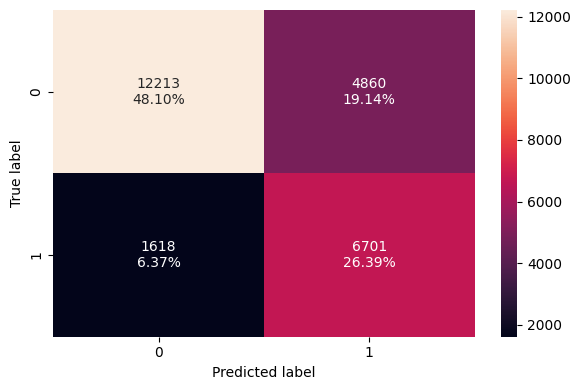

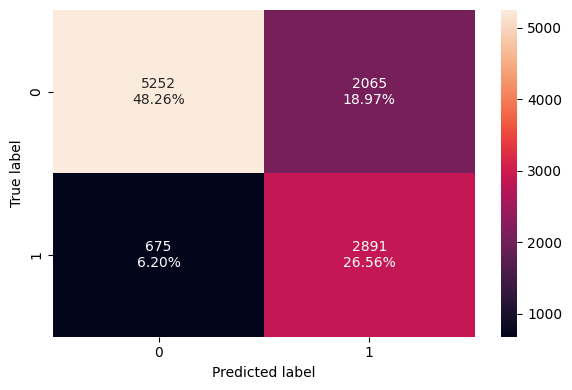

In [ ]:

# Evaluate and plot confusion matrix for the refined model
print("Model Performance (Significant Features):")
model_1 = model_performance_classification(LR_model_significant, x_train_significant, y_train)
print(model_1)
plot_confusion_matrix(LR_model_significant, x_train_significant, y_train)
plt.tight_layout()

# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/matrix1.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


print("Model Performance (Significant Features - Test Set):")
model_1_test = model_performance_classification(LR_model_significant, x_test_significant, y_test)
print(model_1_test)
plot_confusion_matrix(LR_model_significant, x_test_significant, y_test)
plt.tight_layout()

# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/matrix2.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


**Determine optimal threshold using ROC curve.**

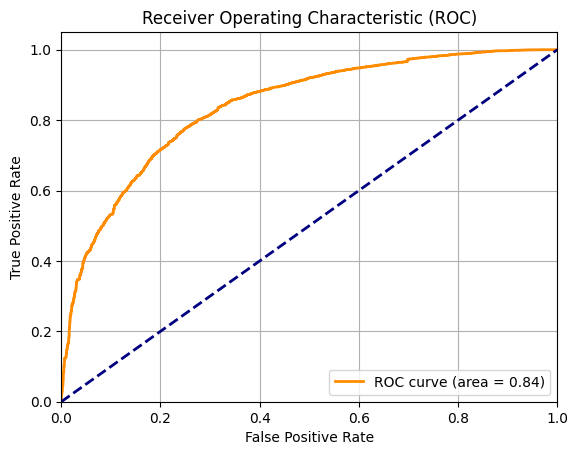

In [ ]:
y_pred = LR_model_significant.predict(x_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
# plt.show()
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Roc_curve_LR.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.5351470185002022


Confusion matrix using the threshold given

   Accuracy    Recall  Precision        F1
0  0.759255  0.776896   0.602892  0.678922


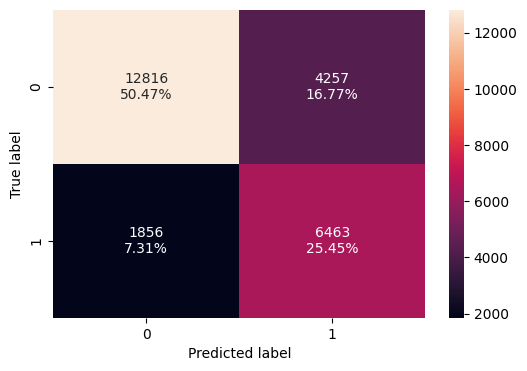

In [ ]:
model_2 = model_performance_classification(LR_model_significant,x_train_significant,y_train,threshold=optimal_threshold_auc_roc)
plot_confusion_matrix(LR_model_significant,x_train_significant,y_train,threshold=optimal_threshold_auc_roc)
print(model_2)
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/matrix3.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

   Accuracy    Recall  Precision        F1
0  0.761095  0.779024   0.605229  0.681216


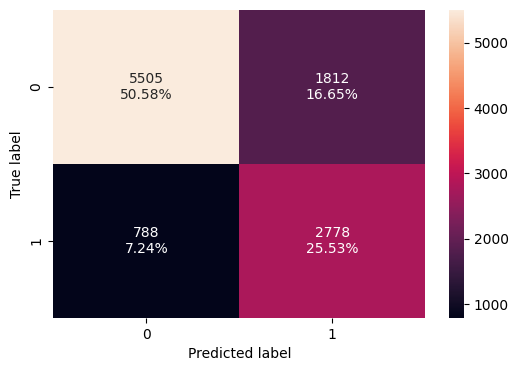

In [ ]:
model_2_test = model_performance_classification(LR_model_significant,x_test_significant,y_test,threshold=optimal_threshold_auc_roc)
plot_confusion_matrix(LR_model_significant,x_test_significant,y_test,threshold=optimal_threshold_auc_roc)
print(model_2_test)
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/matrix4.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

Finding a better threshold using the Precision-Recall Curve

(array([13546]),)
0.625373909633533


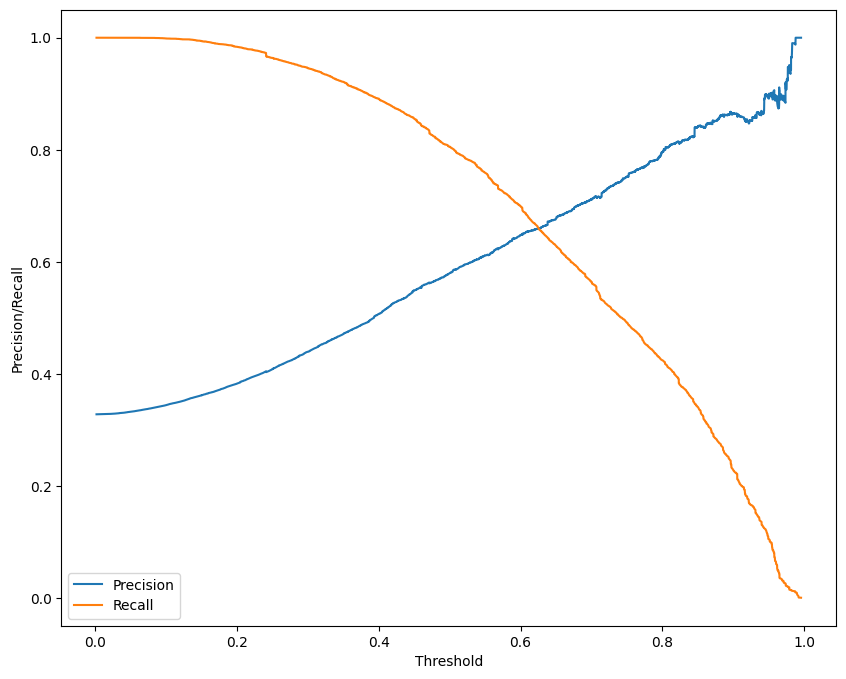

In [ ]:
y_pred = LR_model_significant.predict(x_train_significant)
precision, recall, thresholds = precision_recall_curve(y_train, y_pred)

def plot_precision_recall_curve(precision, recall, thresholds):
    plt.figure(figsize=(10,8))
    plt.plot(thresholds, precision[:-1], label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    plt.legend()


# Plot Precision-Recall curve
plot_precision_recall_curve(precision, recall, thresholds)
print(np.where(precision == recall))
len(thresholds)
optimal_threshold_pr_re = thresholds[np.where(precision == recall)[0][0]]
print(optimal_threshold_pr_re)
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Precision_recall_curve.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

   Accuracy    Recall  Precision        F1
0  0.776544  0.658973   0.658973  0.658973


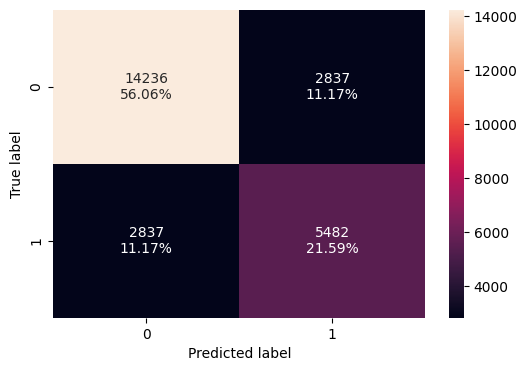

In [ ]:
plot_confusion_matrix(LR_model_significant,x_train_significant,y_train,threshold=optimal_threshold_pr_re)
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/matrix5.jpg', dpi=300, bbox_inches='tight')
# dpi increases resolution
model_3 = model_performance_classification(LR_model_significant,x_train_significant,y_train,threshold=optimal_threshold_pr_re)
print(model_3)

   Accuracy    Recall  Precision        F1
0  0.778462  0.662928   0.661629  0.662278


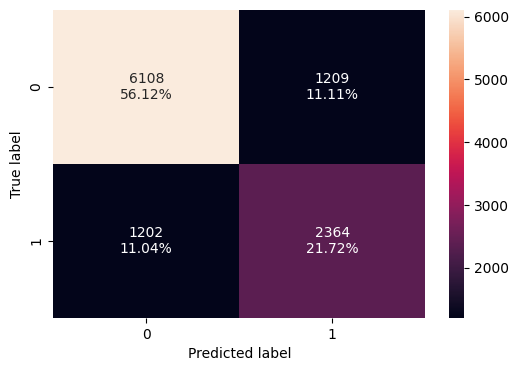

In [ ]:
plot_confusion_matrix(LR_model_significant,x_test_significant,y_test,threshold=optimal_threshold_pr_re)
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/matrix6.jpg', dpi=300, bbox_inches='tight')
# dpi increases resolution
model_3_test = model_performance_classification(LR_model_significant,x_test_significant,y_test,threshold=optimal_threshold_pr_re)
print(model_3_test)

Model Performance Summary

In [ ]:
#Model Comparison Training Set
models_train_comp_df = pd.concat(
    [
        model_1.T,
        model_2.T,
        model_3.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    f"Logistic Regression-{optimal_threshold_auc_roc} Threshold",
    f"Logistic Regression-{optimal_threshold_pr_re} Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                0.744880   
Recall                                  0.805505   
Precision                               0.579621   
F1                                      0.674145   

           Logistic Regression-0.5351470185002022 Threshold  \
Accuracy                                           0.761095   
Recall                                             0.779024   
Precision                                          0.605229   
F1                                                 0.681216   

           Logistic Regression-0.625373909633533 Threshold  
Accuracy                                          0.776544  
Recall                                            0.658973  
Precision                                         0.658973  
F1                                                0.658973

In [ ]:
#Model Comparison Testing Set
models_test_comp_df = pd.concat(
    [
        model_1_test.T,
        model_2_test.T,
        model_3_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    f"Logistic Regression-{optimal_threshold_auc_roc} Threshold",
    f"Logistic Regression-{optimal_threshold_pr_re} Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                0.748231   
Recall                                  0.810712   
Precision                               0.583333   
F1                                      0.678479   

           Logistic Regression-0.5351470185002022 Threshold  \
Accuracy                                           0.761095   
Recall                                             0.779024   
Precision                                          0.605229   
F1                                                 0.681216   

           Logistic Regression-0.625373909633533 Threshold  
Accuracy                                          0.778462  
Recall                                            0.662928  
Precision                                         0.661629  
F1                                                0.662278

All models are not overfitting nor are underfitting with both the training data and test data.
As avoiding **unnecessary actions** is important (e.g., sending false cancellation alerts) we focus on **reducing False Positives (FP)** and increasing **Precision**. So we construct the model with high precision and also tha=is model has a high accuracy. Hence we choose Logistic Regression model with threhold being 0.625


## Naive - Bayes Classifier

In [ ]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

### Checking Naive - Bayes Classifier performance on training set

In [ ]:
model_performance_classification(nb_model, X_train_scaled, y_train)

Accuracy    Recall  Precision        F1
0  0.406742  0.968145   0.352426  0.516746

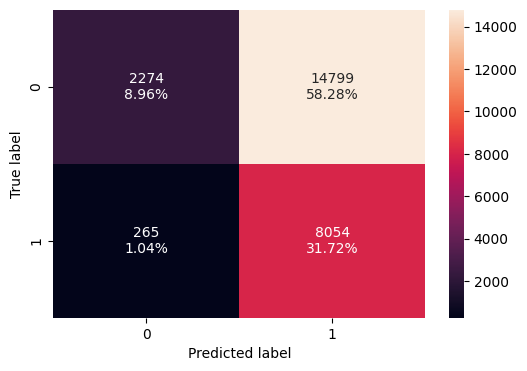

In [ ]:
plot_confusion_matrix(nb_model, X_train_scaled, y_train)

# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/nb_matrix1.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


### Checking Naive - Bayes Classifier performance on test set

In [ ]:
model_performance_classification(nb_model, X_test_scaled, y_test)

Accuracy    Recall  Precision        F1
0   0.40816  0.967751   0.352971  0.517275

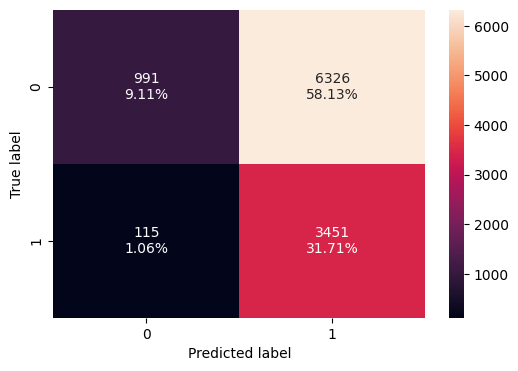

In [ ]:
plot_confusion_matrix(nb_model, X_test_scaled, y_test)
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/nb_matrix2.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


## KNN Classifier (K = 3)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_performance_classification(knn_model, X_train_scaled, y_train)

Accuracy    Recall  Precision        F1
0   0.91391  0.849381    0.88336  0.866038

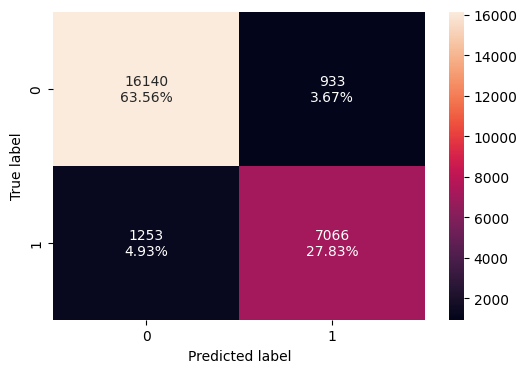

In [ ]:
plot_confusion_matrix(knn_model, X_train_scaled, y_train)

# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/knn_matrix1.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


In [ ]:
model_performance_classification(knn_model, X_test_scaled, y_test)

Accuracy    Recall  Precision       F1
0  0.842047  0.745373   0.766215  0.75565

In [ ]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test)
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/knn_matrix2.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


# **Model Performance Improvement for KNN Classifier**

### KNN Classifier Performance Improvement using different k values

In [ ]:
k_values=range(2,20)

best_recall =0
for k in k_values:
  knn_model=KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train_scaled, y_train)
  y_pred=knn_model.predict(X_test_scaled)

  recall = recall_score(y_test,y_pred)

  if recall>best_recall:
    best_recall=recall
    best_k=k

print("Best Recall: ", best_recall)
print("Best K: ", best_k)



Best Recall:  0.7453729669097028
Best K:  3


In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=best_k)
knn_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_performance_classification(knn_tuned, X_train_scaled, y_train)

Accuracy    Recall  Precision        F1
0   0.91391  0.849381    0.88336  0.866038

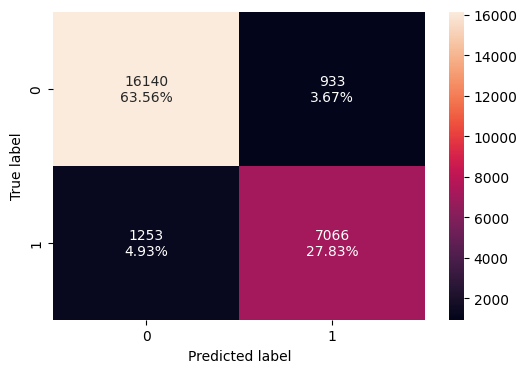

In [ ]:
plot_confusion_matrix(knn_tuned,X_train_scaled,y_train)

In [ ]:
model_performance_classification(knn_tuned, X_test_scaled, y_test)

Accuracy    Recall  Precision       F1
0  0.842047  0.745373   0.766215  0.75565

In [ ]:
plot_confusion_matrix(knn_tuned,X_test_scaled,y_test)

*  The value of k is the same (k = 3) as the base model. So the model performance remains unaltered on both training and test sets.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

k_values = range(2, 20)  # Range of k values to explore
param_grid = {'n_neighbors': k_values} # Create a parameter grid

# Create KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV with F1 scoring
grid_search = GridSearchCV(knn_model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best K value and corresponding F1 score
best_k = grid_search.best_params_['n_neighbors']
best_f1 = grid_search.best_score_

print("Best K:", best_k)
print("Best F1 Score:", best_f1)

KeyboardInterrupt: 

   Accuracy    Recall  Precision        F1
0   0.91391  0.849381    0.88336  0.866038


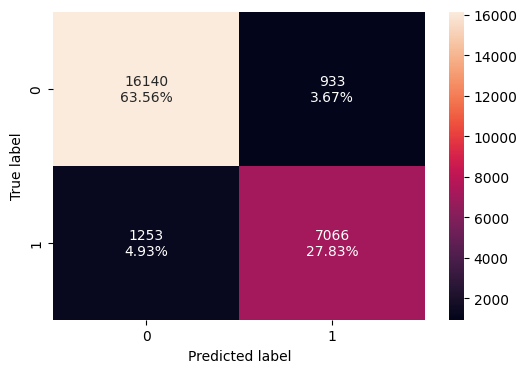

In [ ]:
knn_tuned_2=KNeighborsClassifier(n_neighbors=best_k)
knn_tuned_2.fit(X_train_scaled, y_train)
print(model_performance_classification(knn_tuned_2, X_train_scaled, y_train))
plot_confusion_matrix(knn_tuned_2, X_train_scaled, y_train)

In [ ]:
print(model_performance_classification(knn_tuned_2, X_test_scaled, y_test))
plot_confusion_matrix(knn_tuned_2, X_test_scaled, y_test)

   Accuracy    Recall  Precision       F1
0  0.842047  0.745373   0.766215  0.75565


## Decision Tree Classifier

In [ ]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)
model__1 = model_performance_classification(dt_model, X_train, y_train)
print(model__1)

   Accuracy    Recall  Precision        F1
0  0.994723  0.986777   0.997085  0.991904


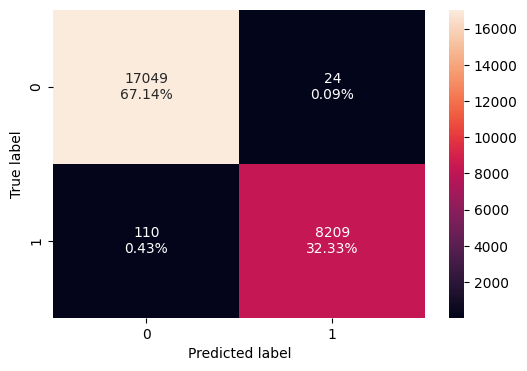

In [ ]:
plot_confusion_matrix(dt_model, X_train, y_train)
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/dtc_matrix1.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


In [ ]:
model__1_test= model_performance_classification(dt_model, X_test, y_test)
print(model__1_test)

   Accuracy    Recall  Precision        F1
0  0.864284  0.801739    0.78782  0.794719


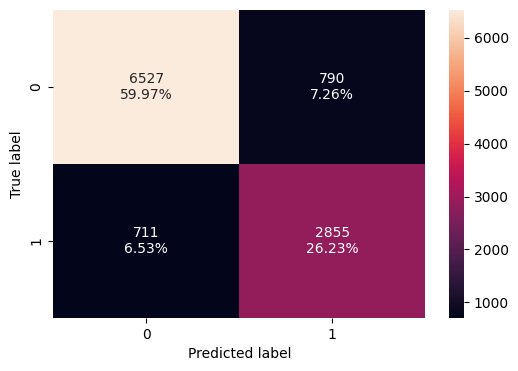

In [ ]:
plot_confusion_matrix(dt_model, X_test, y_test)
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/dtc_matrix2.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


Model hasn't performed very well on test dataset. Recall of both training data and testing data is not similar as expected because of overfitting. We have to prune the decision tree.

## Decision Tree Classifier (pre-pruning and post-pruning)

### Pre - pruning the tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Split the data
X = data.drop(['booking_status', 'Booking_ID'], axis=1)
y = data['booking_status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply Label Encoding
for col in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']:
    X[col] = label_encoder.fit_transform(X[col])

# Now you can convert the entire DataFrame to float
X = X.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
# Convert 'booking_status' in y_train and y_test to 0 and 1
y_train = y_train.map({'Not_Canceled': 0, 'Canceled': 1})
y_test = y_test.map({'Not_Canceled': 0, 'Canceled': 1})
# Resetting index is unnecessary, so we skip it

dt_model_tuned_1 = DecisionTreeClassifier(random_state=21)
# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2,25,2),
    "criterion": ["gini"],
    "splitter": ["best"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_leaf_nodes": [10, 25, 50, 75, 100,150,250],
    "min_samples_split": [2, 5, 10, 20, 30,50,70],
}

grid_obj = GridSearchCV(dt_model_tuned_1, parameters, scoring='recall', cv=5, n_jobs=-1)
grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
dt_model_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned_1.fit(X_train, y_train)

### Checking pre-pruned Decision Tree Classifier performance on training set

In [ ]:
model__2 = model_performance_classification(dt_model_tuned_1, X_train, y_train)
print(model__2)

   Accuracy    Recall  Precision       F1
0  0.897724  0.790359   0.885164  0.83508


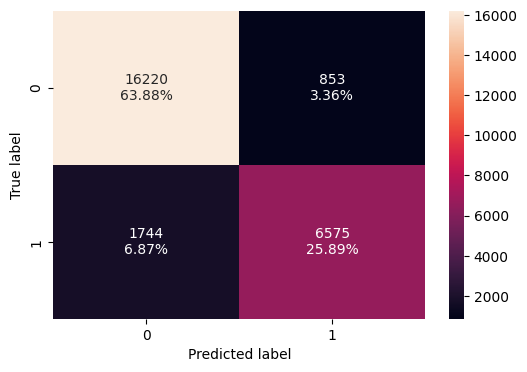

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_train, y_train)
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/dtc_pre_matrix1.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


### Checking pre-pruned Decision Tree Classifier performance on test set

In [56]:
model__2_test= model_performance_classification(dt_model_tuned_1, X_test, y_test)
print(model__2_test)

   Accuracy    Recall  Precision        F1
0   0.87384  0.758553   0.840846  0.797582


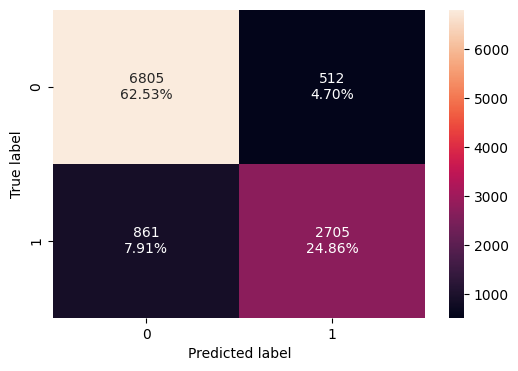

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_test, y_test)
# Save the figure with adjusted layout
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/dtc_pre_matrix2.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


### Visualizing the Decision Tree

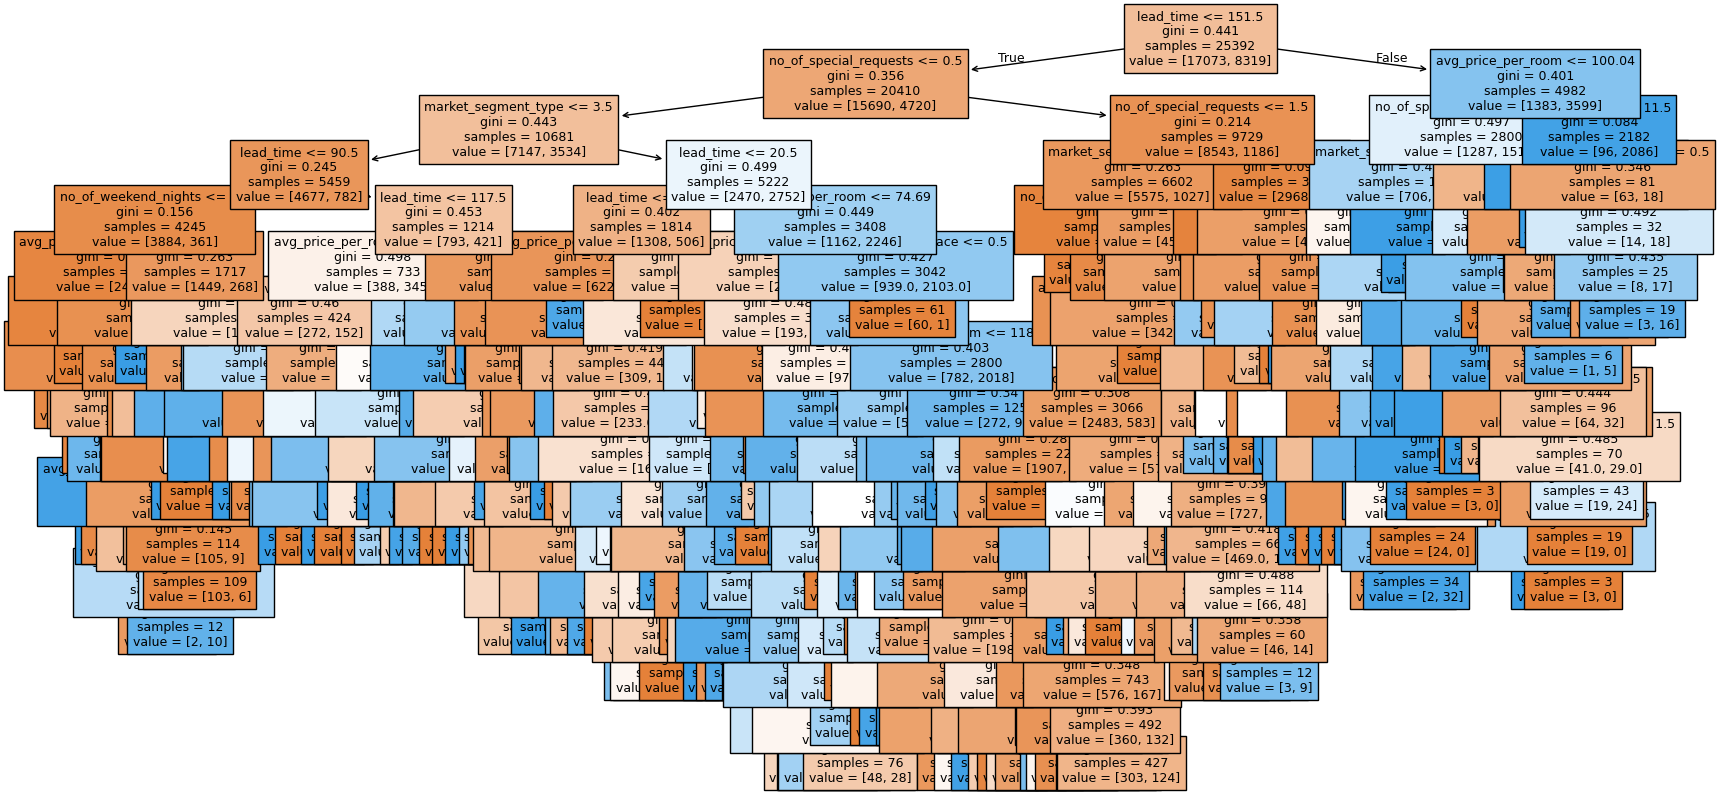

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned_1,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Tree_visualzation.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


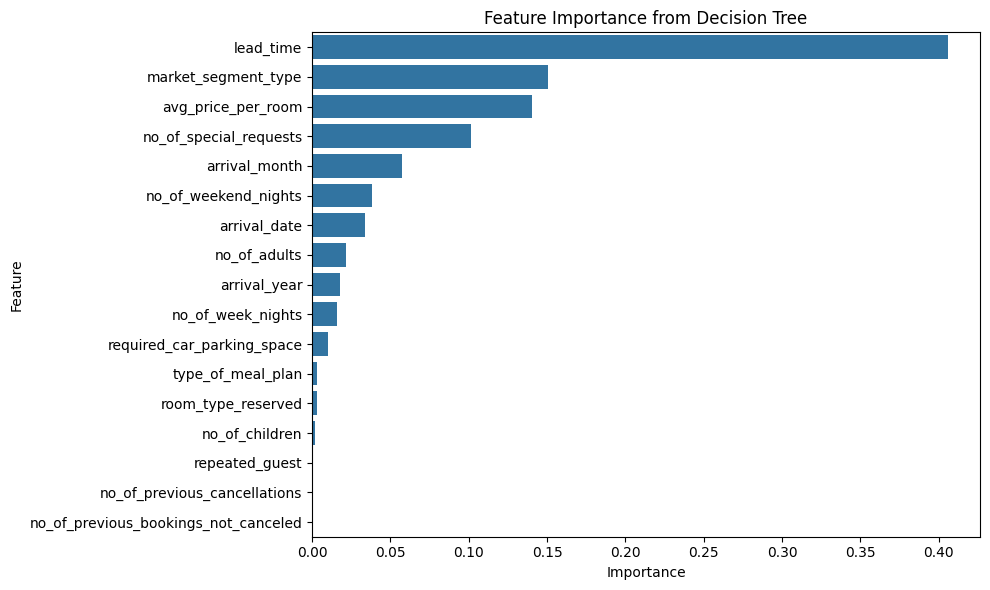

In [ ]:

feature_imp = pd.DataFrame(dt_model_tuned_1.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_imp = feature_imp.sort_values('Importance', ascending=False)  # Sort in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y=feature_imp.index, data=feature_imp) # Use orient='h' for horizontal
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.tight_layout()
# plt.show()
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Feature_importance_1.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


### Post - pruning the tree

In [36]:
dt_model_tuned_2 = DecisionTreeClassifier(random_state=21)
path= dt_model_tuned_2.cost_complexity_pruning_path(X_train, y_train) # CCP stands for Cost-Complexity Pruning. It is a technique used to reduce the size of a decision tree and prevent overfitting.
ccp_alphas,ccp_impurities = path['ccp_alphas'],path['impurities']
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.006842
1     0.000000e+00    0.006842
2     6.352013e-07    0.006843
3     8.078458e-07    0.006843
4     1.125214e-06    0.006844
...            ...         ...
1308  7.158311e-03    0.285860
1309  1.347162e-02    0.299331
1310  1.668747e-02    0.316019
1311  2.423451e-02    0.364488
1312  7.608448e-02    0.440572

[1313 rows x 2 columns]

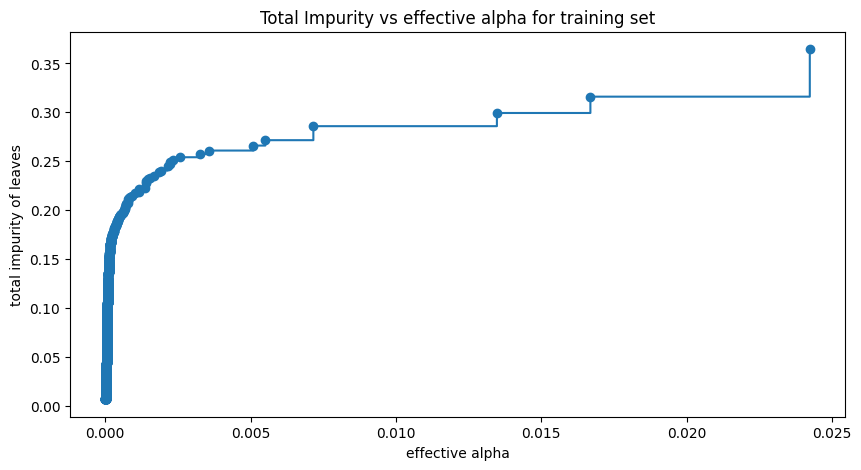

In [38]:
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1],ccp_impurities[:-1],marker='o',drawstyle='steps-post')
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Impurity_vs_alpha.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [39]:
dt_models = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=21,ccp_alpha=ccp_alpha)
    dt_model.fit(X_train, y_train)
    dt_models.append(dt_model)
print(f"Number of nodes in the last tree is: {dt_models[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07608448246807803


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases. As alpha increases depth of the tree and number of nodes decreases.

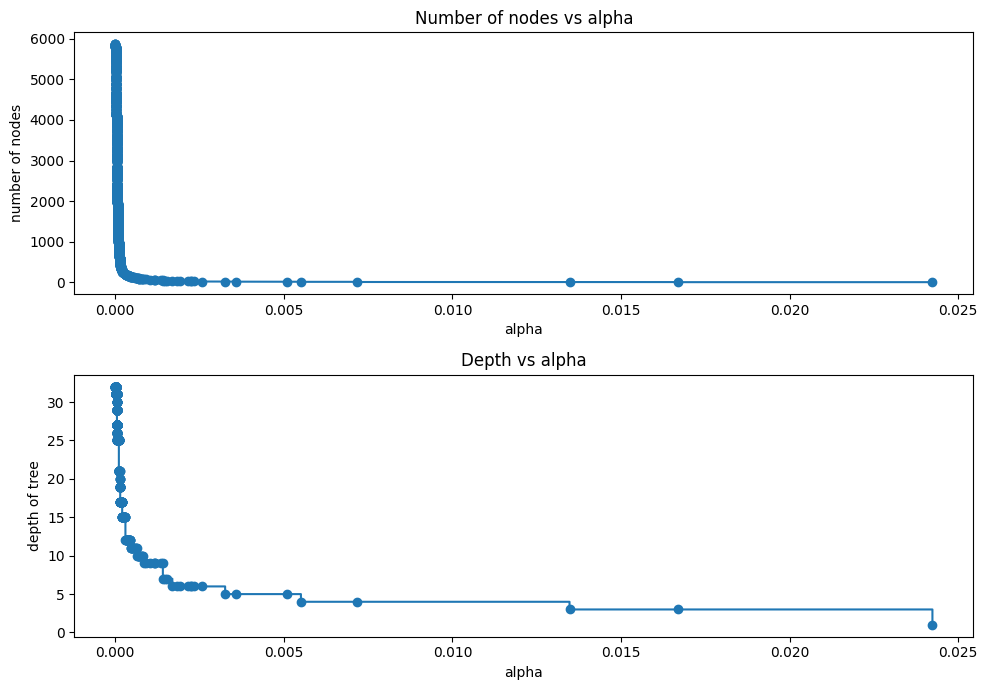

In [40]:
dt_models = dt_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_model.tree_.node_count for dt_model in dt_models]
depth = [dt_model.tree_.max_depth for dt_model in dt_models]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Number_of_nodes_vs_alpha.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

### Recall vs alpha for training and test sets

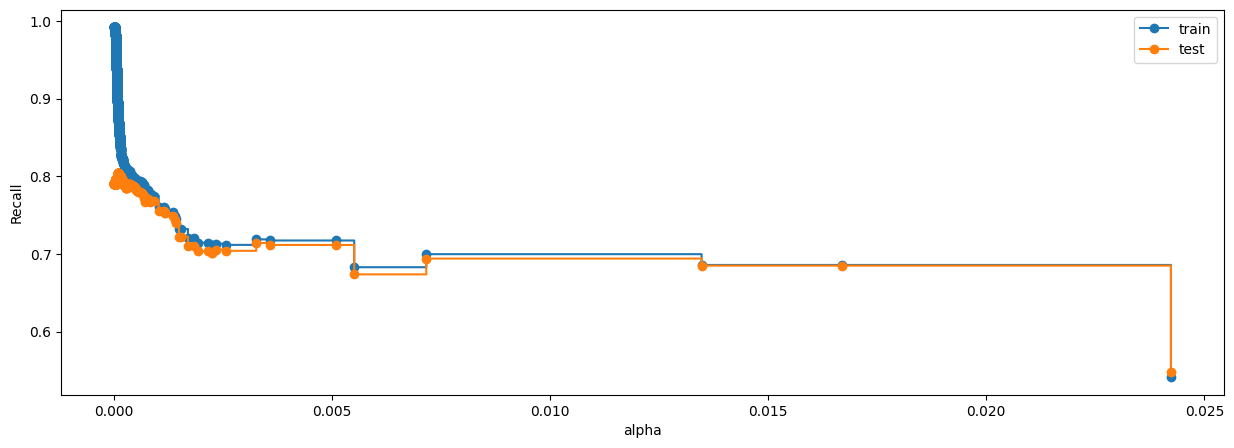

In [43]:
f1_train = []
for dt_model in dt_models:
    pred_train = dt_model.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for dt_model in dt_models:
    pred_test = dt_model.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/f1_vs_alpha.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

In [44]:
index_best_model = np.argmax(f1_test)
best_model = dt_models[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=9.763119814899205e-05, random_state=21)


### Checking model performance on training set

   Accuracy   Recall  Precision        F1
0  0.919069  0.84902   0.898372  0.872999


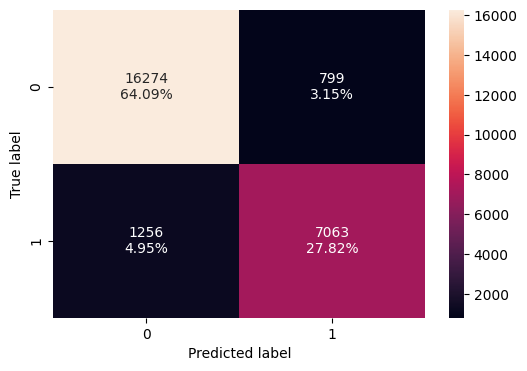

In [52]:
model__3 = model_performance_classification(best_model, X_train, y_train)
plot_confusion_matrix(best_model, X_train, y_train)
print(model__3)

### Checking model performance on test set

   Accuracy    Recall  Precision        F1
0  0.875861  0.780146   0.830696  0.804628


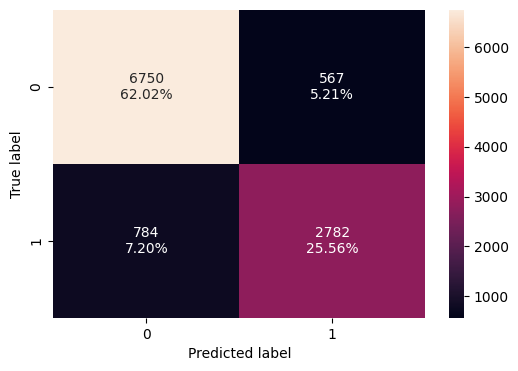

In [53]:
model__3_test= model_performance_classification(best_model, X_test, y_test)
plot_confusion_matrix(best_model, X_test, y_test )
print(model__3_test)

### Visualizing the Decision Tree

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


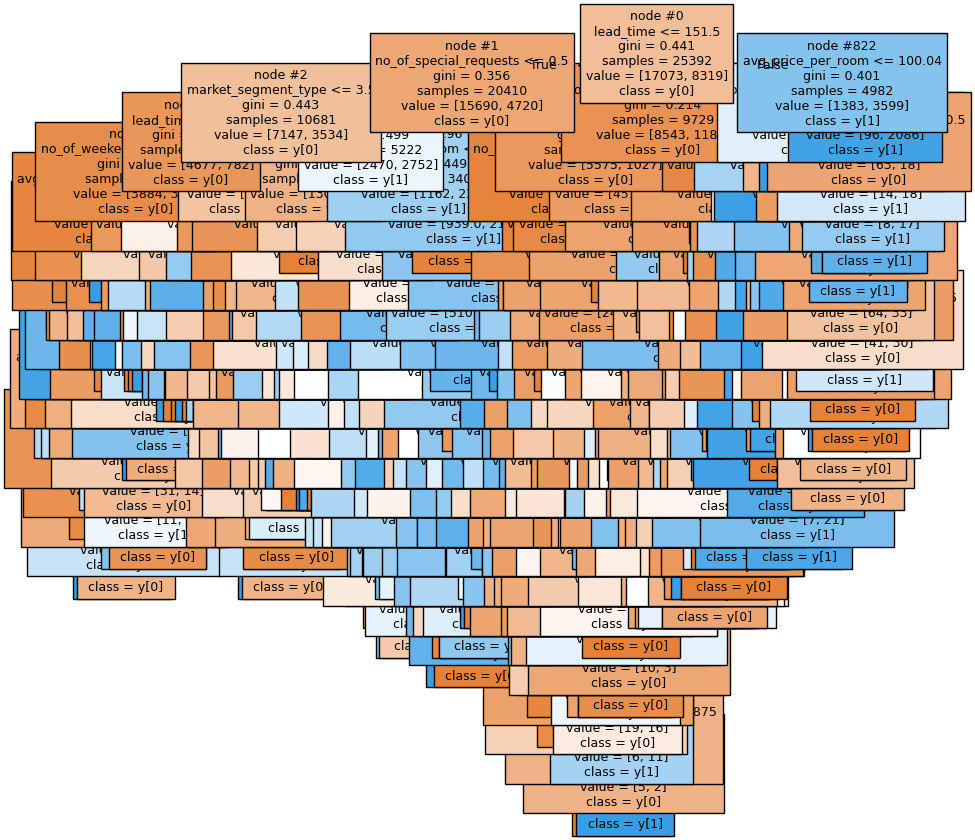

In [54]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Tree_visualzation_2.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

In [48]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type <= 2.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 89.50
|   |   |   |   |   |   |   |   |--- weights: [532.00, 32.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  89.50
|   |   |   |   |   |   |   |   |--- lead_time <= 86.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [141.00, 18.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |   |   |   |   | 

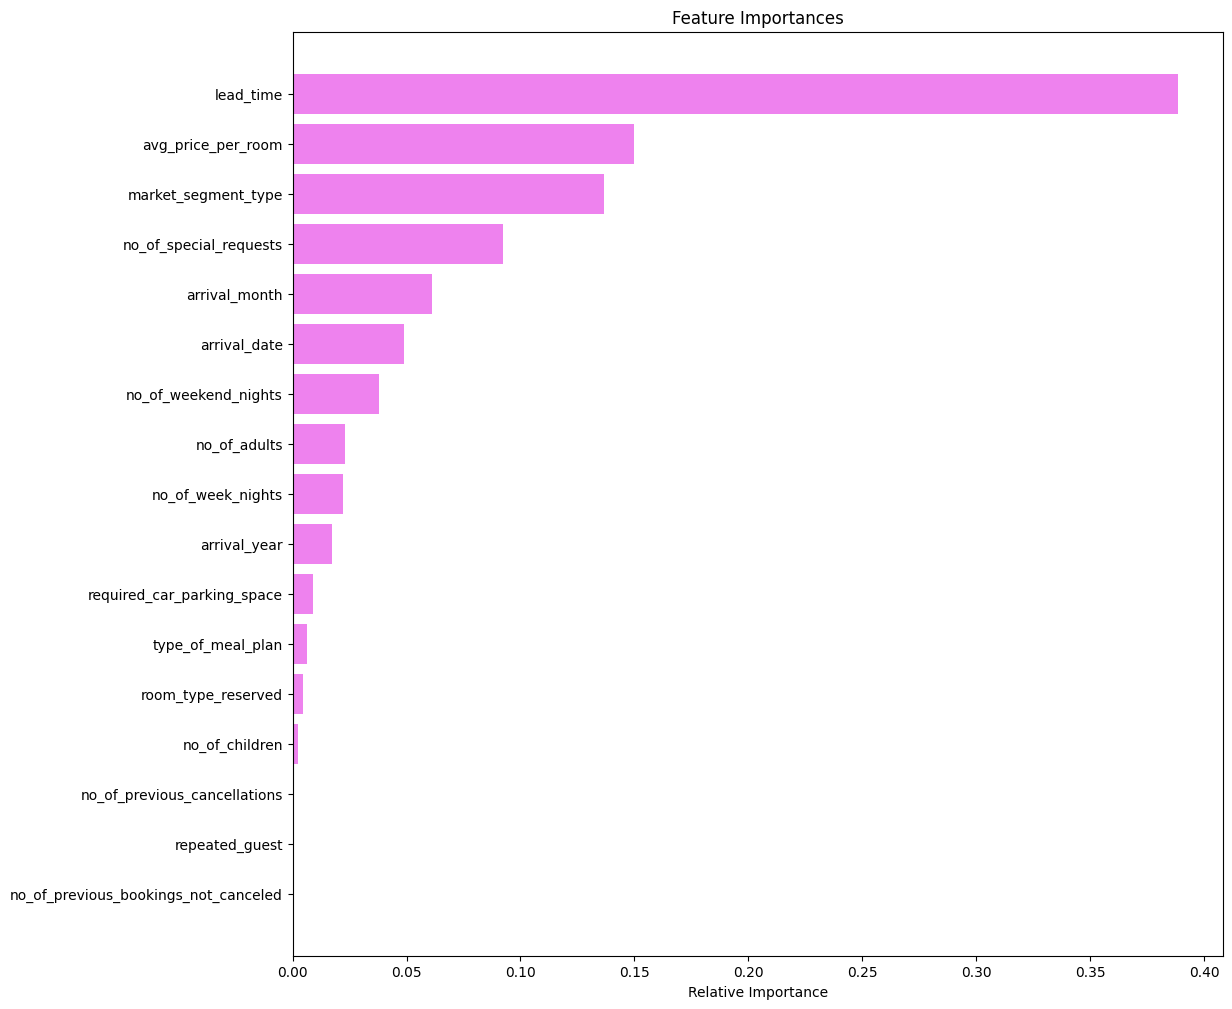

In [55]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig('/content/drive/My Drive/Python/Project-4-Machine-Learning-1/Feature_importance_2.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

## Comparison of Models and Final Model Selection

In [50]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model__1.T,
        model__2.T,
        model__3.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994723                     0.897724   
Recall                  0.986777                     0.790359   
Precision               0.997085                     0.885164   
F1                      0.991904                     0.835080   

           Decision Tree (Post-Pruning)  
Accuracy                       0.919069  
Recall                         0.849020  
Precision                      0.898372  
F1                             0.872999

In [51]:
# test performance comparison

models_train_comp_df = pd.concat(

    [
        model__1_test.T,
        model__2_test.T,
        model__3_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.864284                     0.873840   
Recall                  0.801739                     0.758553   
Precision               0.787820                     0.840846   
F1                      0.794719                     0.797582   

           Decision Tree (Post-Pruning)  
Accuracy                       0.875861  
Recall                         0.780146  
Precision                      0.830696  
F1                             0.804628

# **Actionable Insights and Recommendations**

## Actionable Insights

## Recommendations